<a href="https://www.kaggle.com/code/mesutssmn/cern-electron-collision-prediction?scriptVersionId=173063146" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius:40px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:150%; text-align:left">

    
<h3 align="center"><font color='#9999' size=150%>ELECTRON COLLISION</font></h3>

    
<h4 align="left"><font color='#9999' size=5%>To Do :</font></h4>
    
<li> Cleaning dataset for regression</li>
    
<li> Some analysis and statistics</li>
    
<li> ML, ANN
    
    
<h3 align="left"><font color='#9999' size=5%>ABOUT DATASET :</font></h3> 
    
    
This dataset contains 100k dielectron events in the invariant mass range 2-110 GeV for use in outreach and education. These data were selected for use in education and outreach and contain a subset of the total event information. The selection criteria may be different from that used in CMS physics results.
    
You can go Cern [here](https://home.cern/).
    
You can find more information about Electron Collision [here](https://en.wikipedia.org/wiki/Electron%E2%80%93positron_annihilation).
    
    
<div style="border-radius: 10px; overflow: hidden; text-align: left;">
    <img src="https://cds.cern.ch/images/CMS-PHO-EVENTS-2020-026-3/file?size=large" alt="Cern" width="1000">
</div>

<div style="border-radius: 10px; overflow: hidden; text-align: right;">
    <img src="https://astroengine.files.wordpress.com/2012/07/intro.jpg?w=840" alt="Cern" width="1000">
</div>

<div style="border-radius: 10px; overflow: hidden; text-align: left;">
    <img src="https://www.researchgate.net/publication/282710834/figure/fig4/AS:614292609040401@1523470179353/
    Color-online-Illustration-of-laser-induced-electron-collision-in-sequential-double.png" alt="Cern" width="1000">
</div>

<div style="border-radius: 10px; overflow: hidden; text-align: right;">
    <img src="https://pub.mdpi-res.com/applsci/applsci-10-01418/article_deploy/html/images/applsci-10-01418-g001.png?1583504613" alt="Cern" width="1000">
</div>

</div>
    

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#199"> LINKS </div>

#### **Name :** Mesut Suhan Şişman

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Mesutssmn"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/mesut-suhan-sisman/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
    </table>

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#199"> IMPORTS </div>

In [1]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, classification_report,confusion_matrix
import scipy.stats as stats

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

2024-04-20 19:01:00.536704: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 19:01:00.536820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 19:01:00.658371: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#199"> LOADING DATA </div>

In [3]:
df = pd.read_csv("/kaggle/input/cern-electron-collision-data/dielectron.csv")
df.head()


Run      Event     E1    px1      py1     pz1    pt1   eta1   phi1  Q1  \
0  147115  366639895 58.714  -7.311  10.531 -57.297 12.820 -2.203  2.178   1   
1  147115  366704169  6.612  -4.152  -0.580  -5.113  4.192 -1.028 -3.003  -1   
2  147115  367112316 25.542 -11.481   2.042  22.725 11.661  1.420  2.966   1   
3  147115  366952149 65.396   7.512  11.887  63.866 14.062  2.218  1.007   1   
4  147115  366523212 61.450   2.953 -14.623 -59.612 14.918 -2.094 -1.372  -1   

      E2     px2    py2     pz2    pt2   eta2   phi2  Q2      M  
0 11.284  -1.032 -1.881 -11.078  2.145 -2.344 -2.073  -1  8.948  
1 17.149 -11.713  5.045  11.465 12.754  0.808  2.735   1 15.893  
2 15.820  -1.473  2.259 -15.589  2.697 -2.455  2.149   1 38.388  
3 25.127   4.088  2.596  24.656  4.843  2.330  0.566  -1  3.729  
4 13.887  -0.278 -2.426 -13.671  2.441 -2.424 -1.685  -1  2.747

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#199"> FEATURES </div>

1) ***Run*** : The run number of the event.
    
2) ***Event*** : The event number.
    
3) ***E1, E2*** : The total energy of the electron (GeV) for electrons 1 and 2.
    
4) ***px1, py1, pz1, px2, py2, pz2***: The components of the momemtum of the electron 1 and 2 (GeV).
    
5) ***pt1, pt2***: The transverse momentum of the electron 1 and 2 (GeV).
    
6) ***eta1, eta2***: The pseudorapidity of the electron 1 and 2.
    
7) ***phi1, phi2***: The phi angle of the electron 1 and 2 (rad).
    
8) ***Q1, Q2***: The charge of the electron 1 and 2.
    
9) ***M***: The invariant mass of two electrons (GeV).

Cite as: McCauley, Thomas; (2014). https://opendata.cern.ch/record/304
    
Dataset: https://www.kaggle.com/datasets/fedesoriano/cern-electron-collision-data

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#199"> DATA INFORMATION </div>

In [4]:
df.Event.value_counts()

Event
439950319    3
440012942    3
407103633    2
407076179    2
406690266    2
            ..
533379552    1
532994296    1
533628462    1
527669805    1
533715677    1
Name: count, Length: 99976, dtype: int64

In [5]:
df.Run.value_counts()

Run
149181    18109
146644    12629
149011     9259
148031     8195
147926     7559
147929     6893
147754     6838
148029     6763
147114     6150
147115     5844
146944     5824
146511     3016
149182     2921
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [7]:
df.describe().T

count          mean           std        min           25%  \
Run   100000.000    147935.327       920.306 146511.000    147114.000   
Event 100000.000 495721181.098 403770324.843   6414.000 202396962.750   
E1    100000.000        36.436        41.216      0.378         8.459   
px1   100000.000         0.136        13.405   -250.587        -5.234   
py1   100000.000         0.182        13.470   -126.079        -5.276   
pz1   100000.000        -1.508        51.604   -840.987       -15.860   
pt1   100000.000        14.412        12.389      0.220         3.771   
eta1  100000.000        -0.064         1.462     -4.165        -1.284   
phi1  100000.000         0.022         1.800     -3.142        -1.527   
Q1    100000.000        -0.005         1.000     -1.000        -1.000   
E2    100000.000        44.003        46.751      0.472        11.056   
px2   100000.000        -0.004        13.127   -233.730        -4.795   
py2   100000.000         0.125        13.169   -145.651        -4.606   
pz2   100000.000        -1.591        61.430   -655.396       -22.037   
pt2   100000.000        13.802        12.461      0.027         3.738   
eta2  100000.000        -0.073         1.738     -7.065        -1.892   
phi2  100000.000         0.021         1.817     -3.142        -1.557   
Q2    100000.000        -0.004         1.000     -1.000        -1.000   
M      99915.000        30.020        25.256      2.000        12.445   

                50%           75%            max  
Run      147929.000    149011.000     149182.000  
Event 390275920.500 633889097.500 1791247487.000  
E1           21.717        50.003        850.602  
px1           0.141         5.715        134.539  
py1           0.099         5.648        147.467  
pz1          -0.313        13.213        760.096  
pt1          12.968        20.019        265.578  
eta1         -0.061         1.144          2.623  
phi1          0.034         1.562          3.141  
Q1           -1.000         1.000          1.000  
E2           25.265        66.926        948.375  
px2          -0.036         4.820        227.330  
py2           0.084         5.062        166.283  
pz2          -0.690        19.006        935.558  
pt2          11.691        19.596        281.654  
eta2         -0.136         1.768          3.061  
phi2          0.027         1.597          3.141  
Q2           -1.000         1.000          1.000  
M            21.283        39.025        109.999

In [8]:
def grab_col_names(dataframe, cat_th=15, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 100000
Variables: 19
cat_cols: 3
num_cols: 16
cat_but_car: 0
num_but_cat: 3


In [9]:
cat_cols, num_cols, cat_but_car

(['Run', 'Q1', 'Q2'],
 ['Event',
  'E1',
  'px1 ',
  'py1',
  'pz1',
  'pt1',
  'eta1',
  'phi1',
  'E2',
  'px2',
  'py2',
  'pz2',
  'pt2',
  'eta2',
  'phi2',
  'M'],
 [])

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#199"> EDA </div>

          Run  Ratio
Run                 
149181  18109 18.109
146644  12629 12.629
149011   9259  9.259
148031   8195  8.195
147926   7559  7.559
147929   6893  6.893
147754   6838  6.838
148029   6763  6.763
147114   6150  6.150
147115   5844  5.844
146944   5824  5.824
146511   3016  3.016
149182   2921  2.921


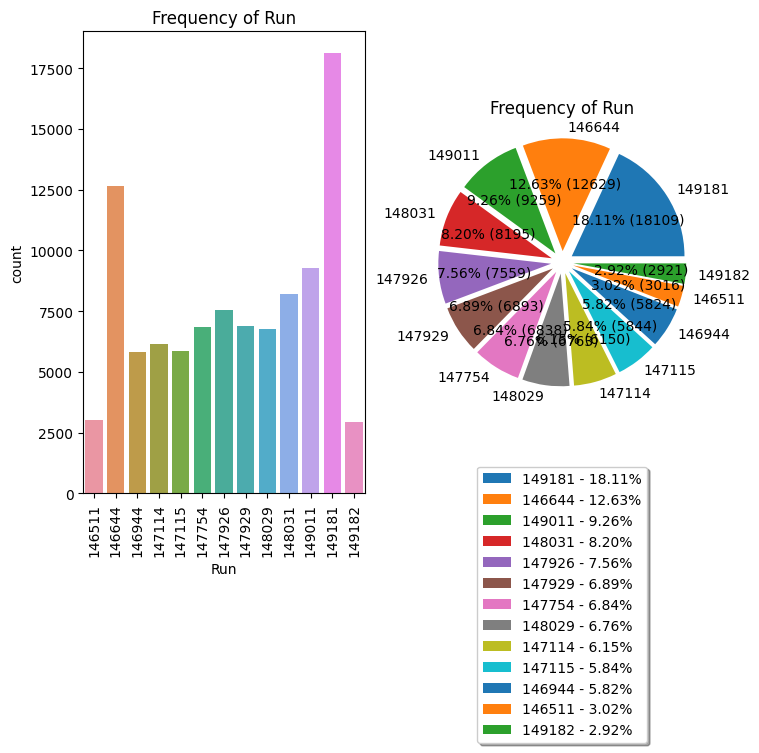

       Q1  Ratio
Q1              
-1  50274 50.274
 1  49726 49.726


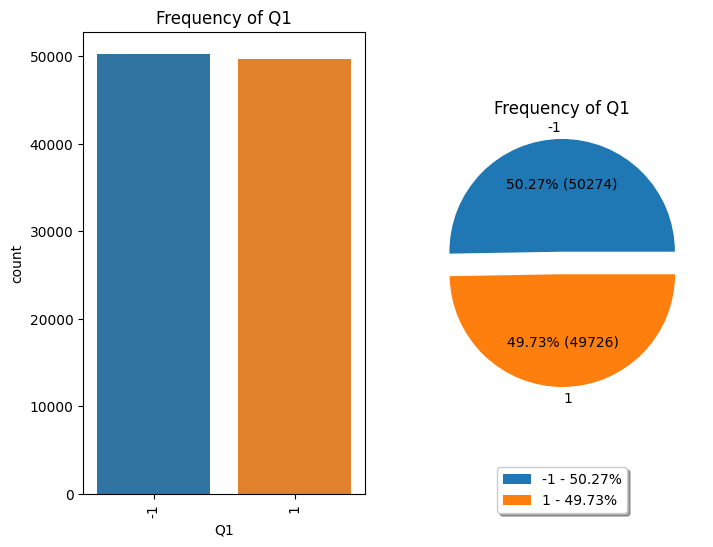

       Q2  Ratio
Q2              
-1  50211 50.211
 1  49789 49.789


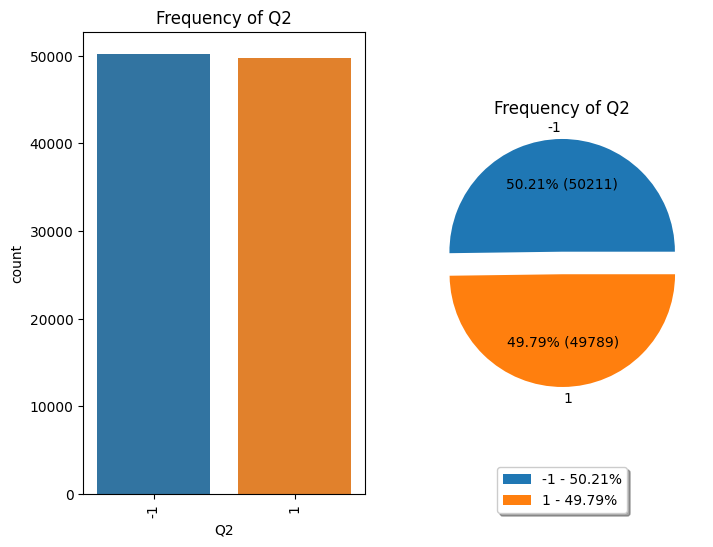

In [10]:
def cat_summary(dataframe, col_name, plot=False, explode=None):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    # Countplot
    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)
    # Pieplot
        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)), explode=explode)
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True, explode=[0.1] * df[col].nunique())

count       100000.000
mean     495721181.098
std      403770324.843
min           6414.000
5%        50161196.500
10%       91267134.100
20%      165677795.600
30%      239255955.400
40%      313976453.600
50%      390275920.500
60%      474330025.800
70%      569715033.300
80%      734324035.000
90%     1148190998.000
95%     1422870003.200
99%     1695328995.100
max     1791247487.000
Name: Event, dtype: float64
Skewness: 1.27
Kurtosis: 1.04


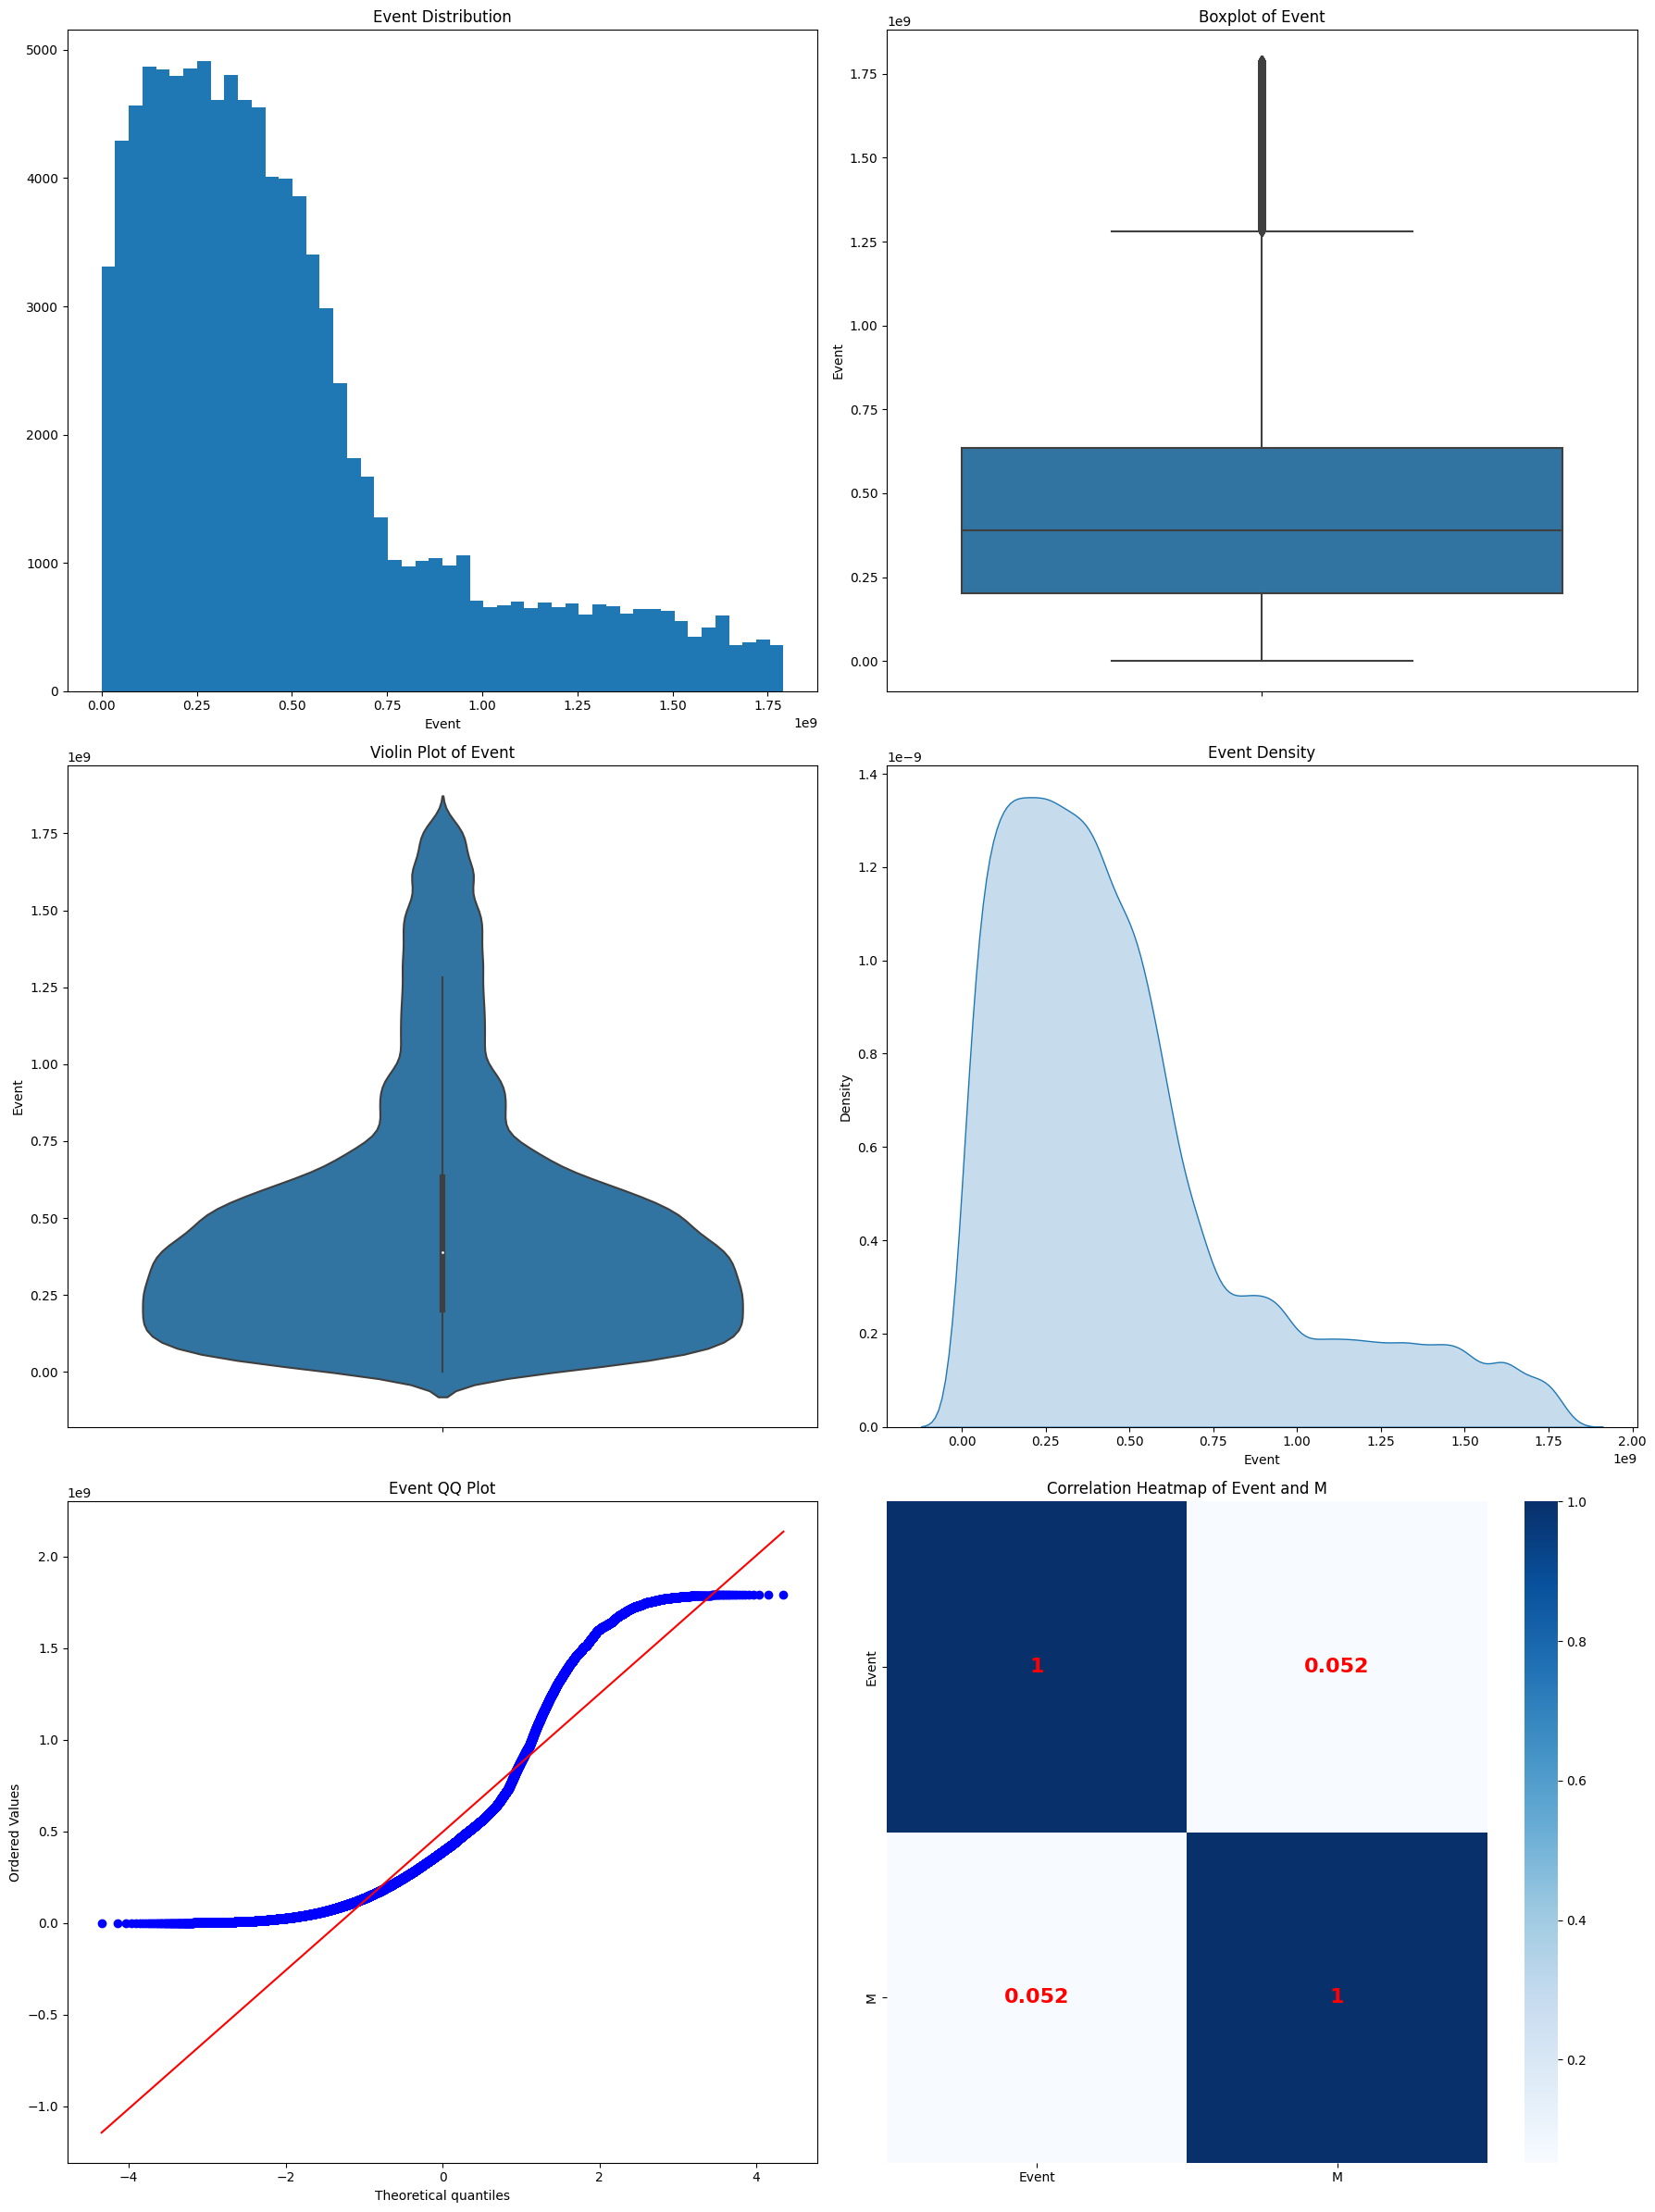

#####################################
count   100000.000
mean        36.436
std         41.216
min          0.378
5%           2.623
10%          3.394
20%          6.180
30%         10.985
40%         16.111
50%         21.717
60%         28.691
70%         40.757
80%         61.118
90%         90.167
95%        117.644
99%        189.574
max        850.602
Name: E1, dtype: float64
Skewness: 2.51
Kurtosis: 12.35


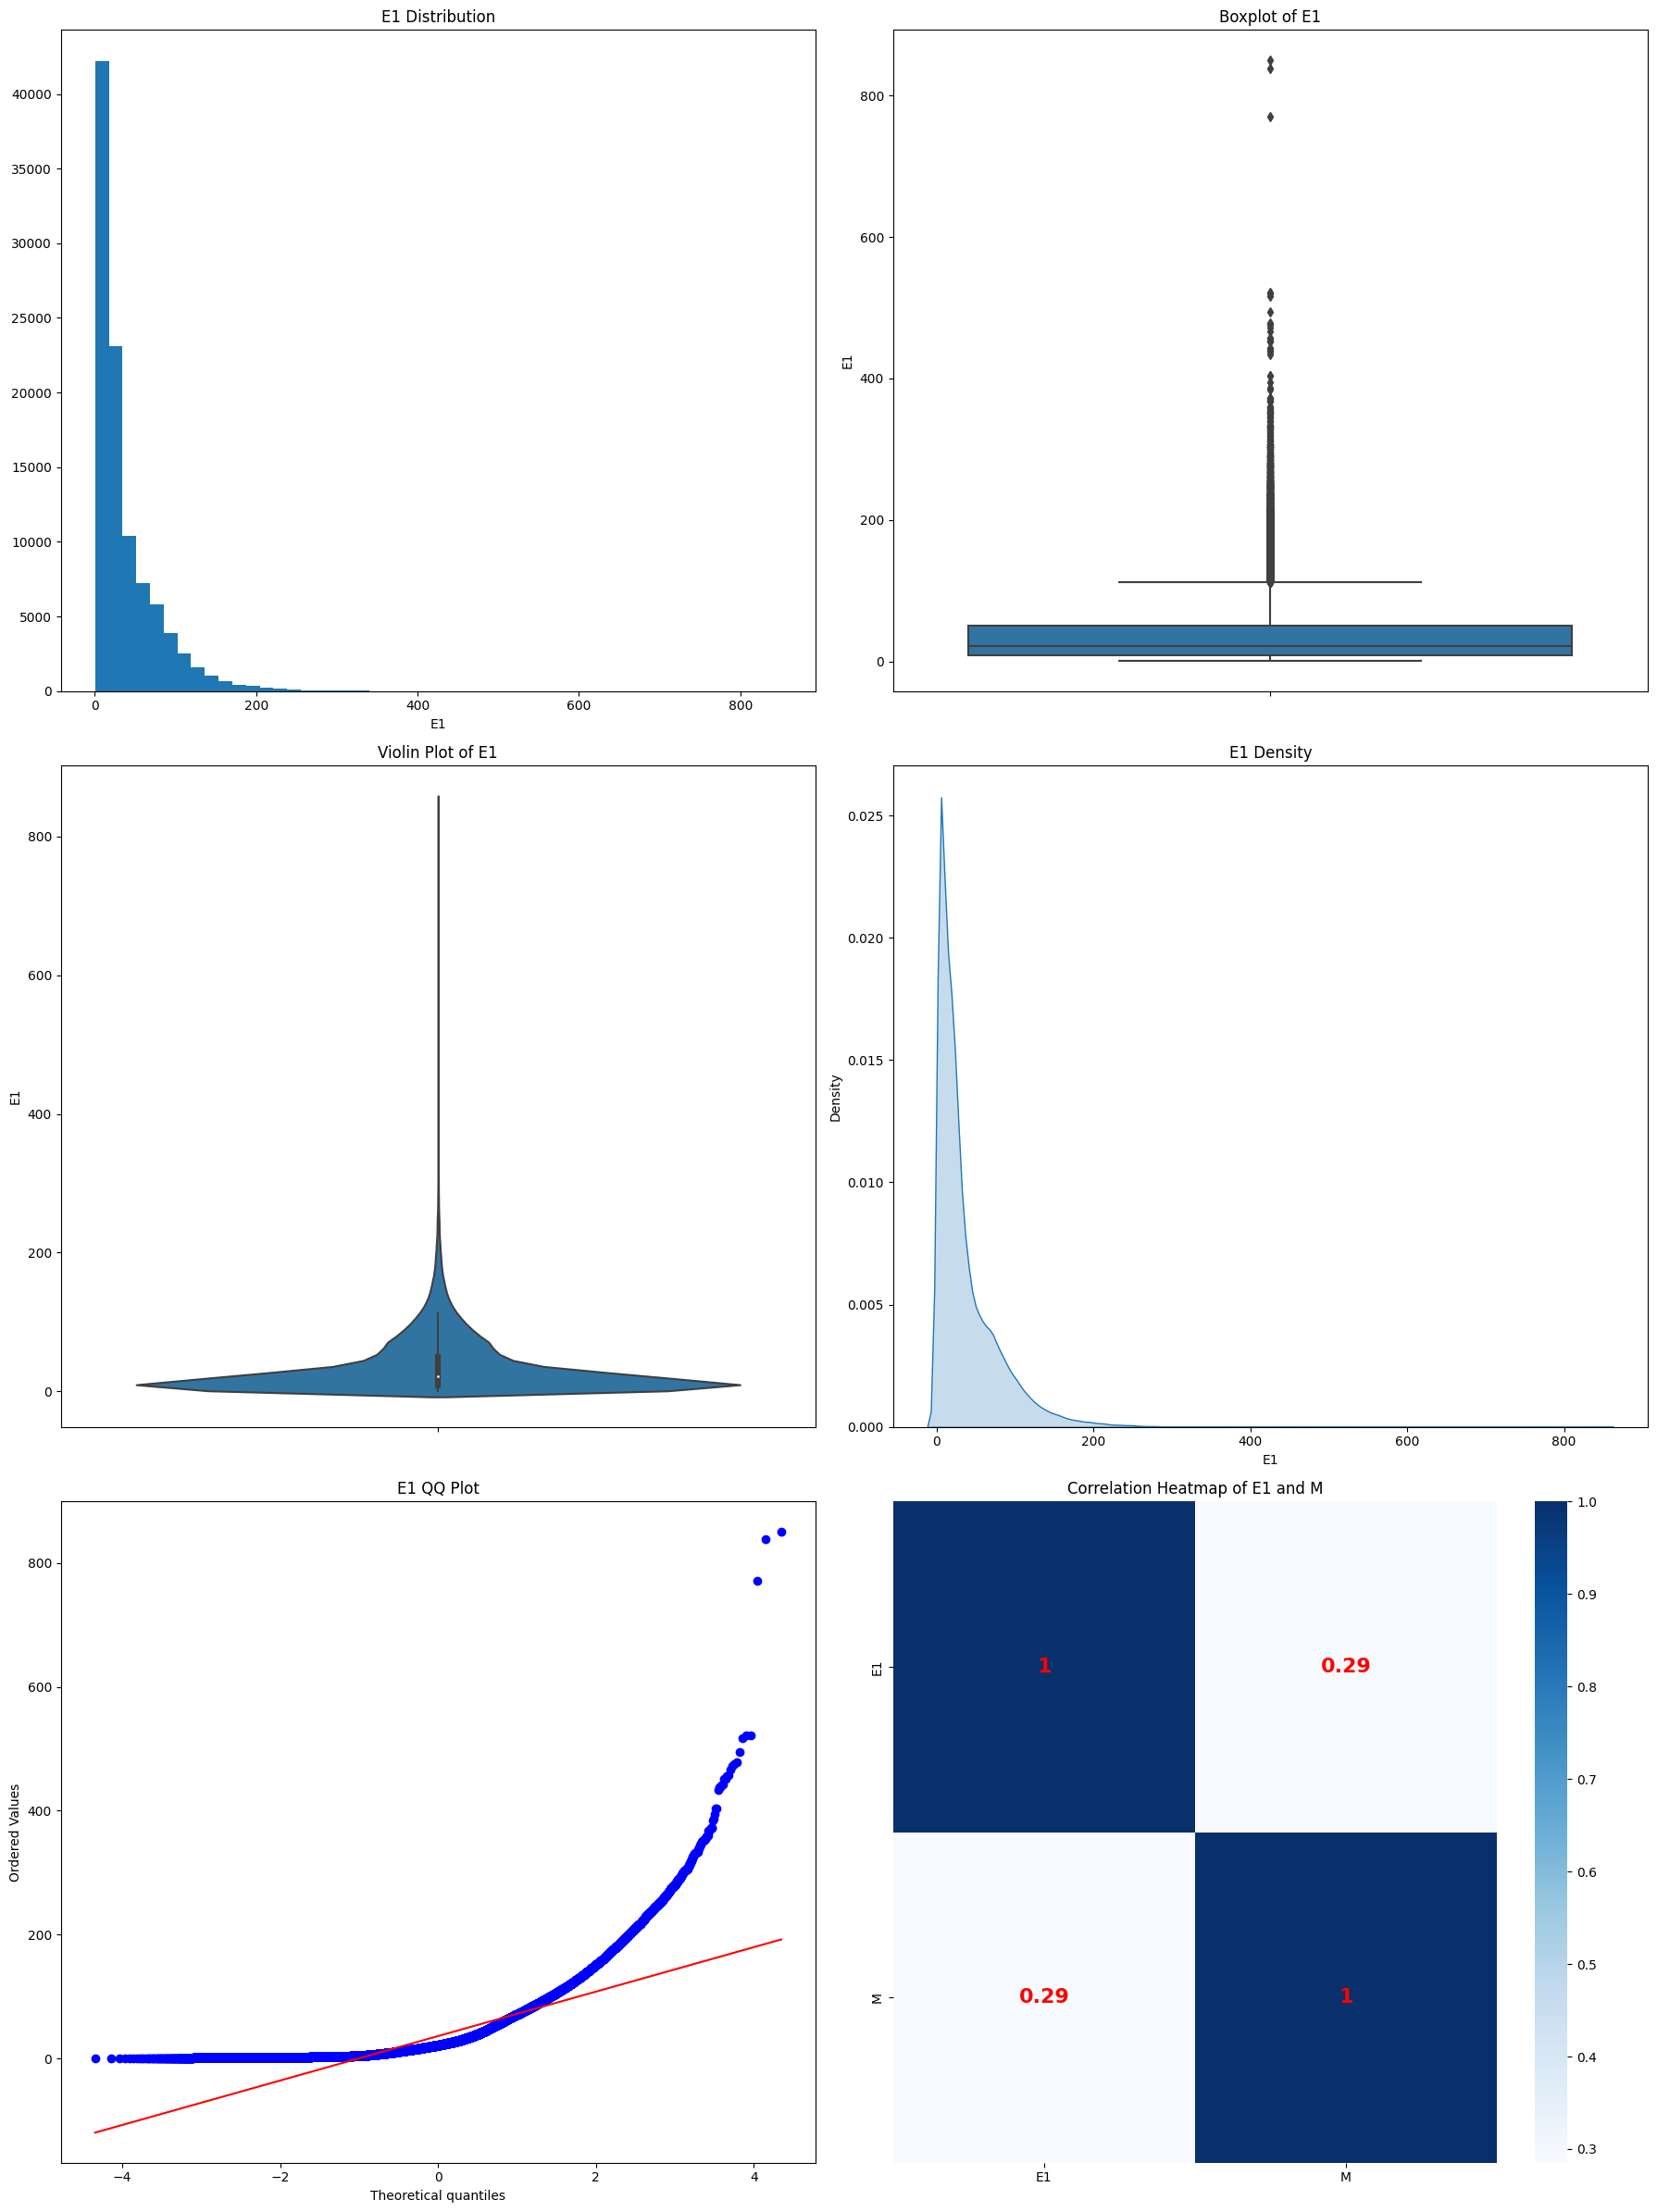

#####################################
count   100000.000
mean         0.136
std         13.405
min       -250.587
5%         -21.259
10%        -15.350
20%         -8.342
30%         -3.423
40%         -1.634
50%          0.141
60%          1.820
70%          3.706
80%          8.949
90%         15.626
95%         21.401
99%         37.914
max        134.539
Name: px1 , dtype: float64
Skewness: -0.12
Kurtosis: 5.34


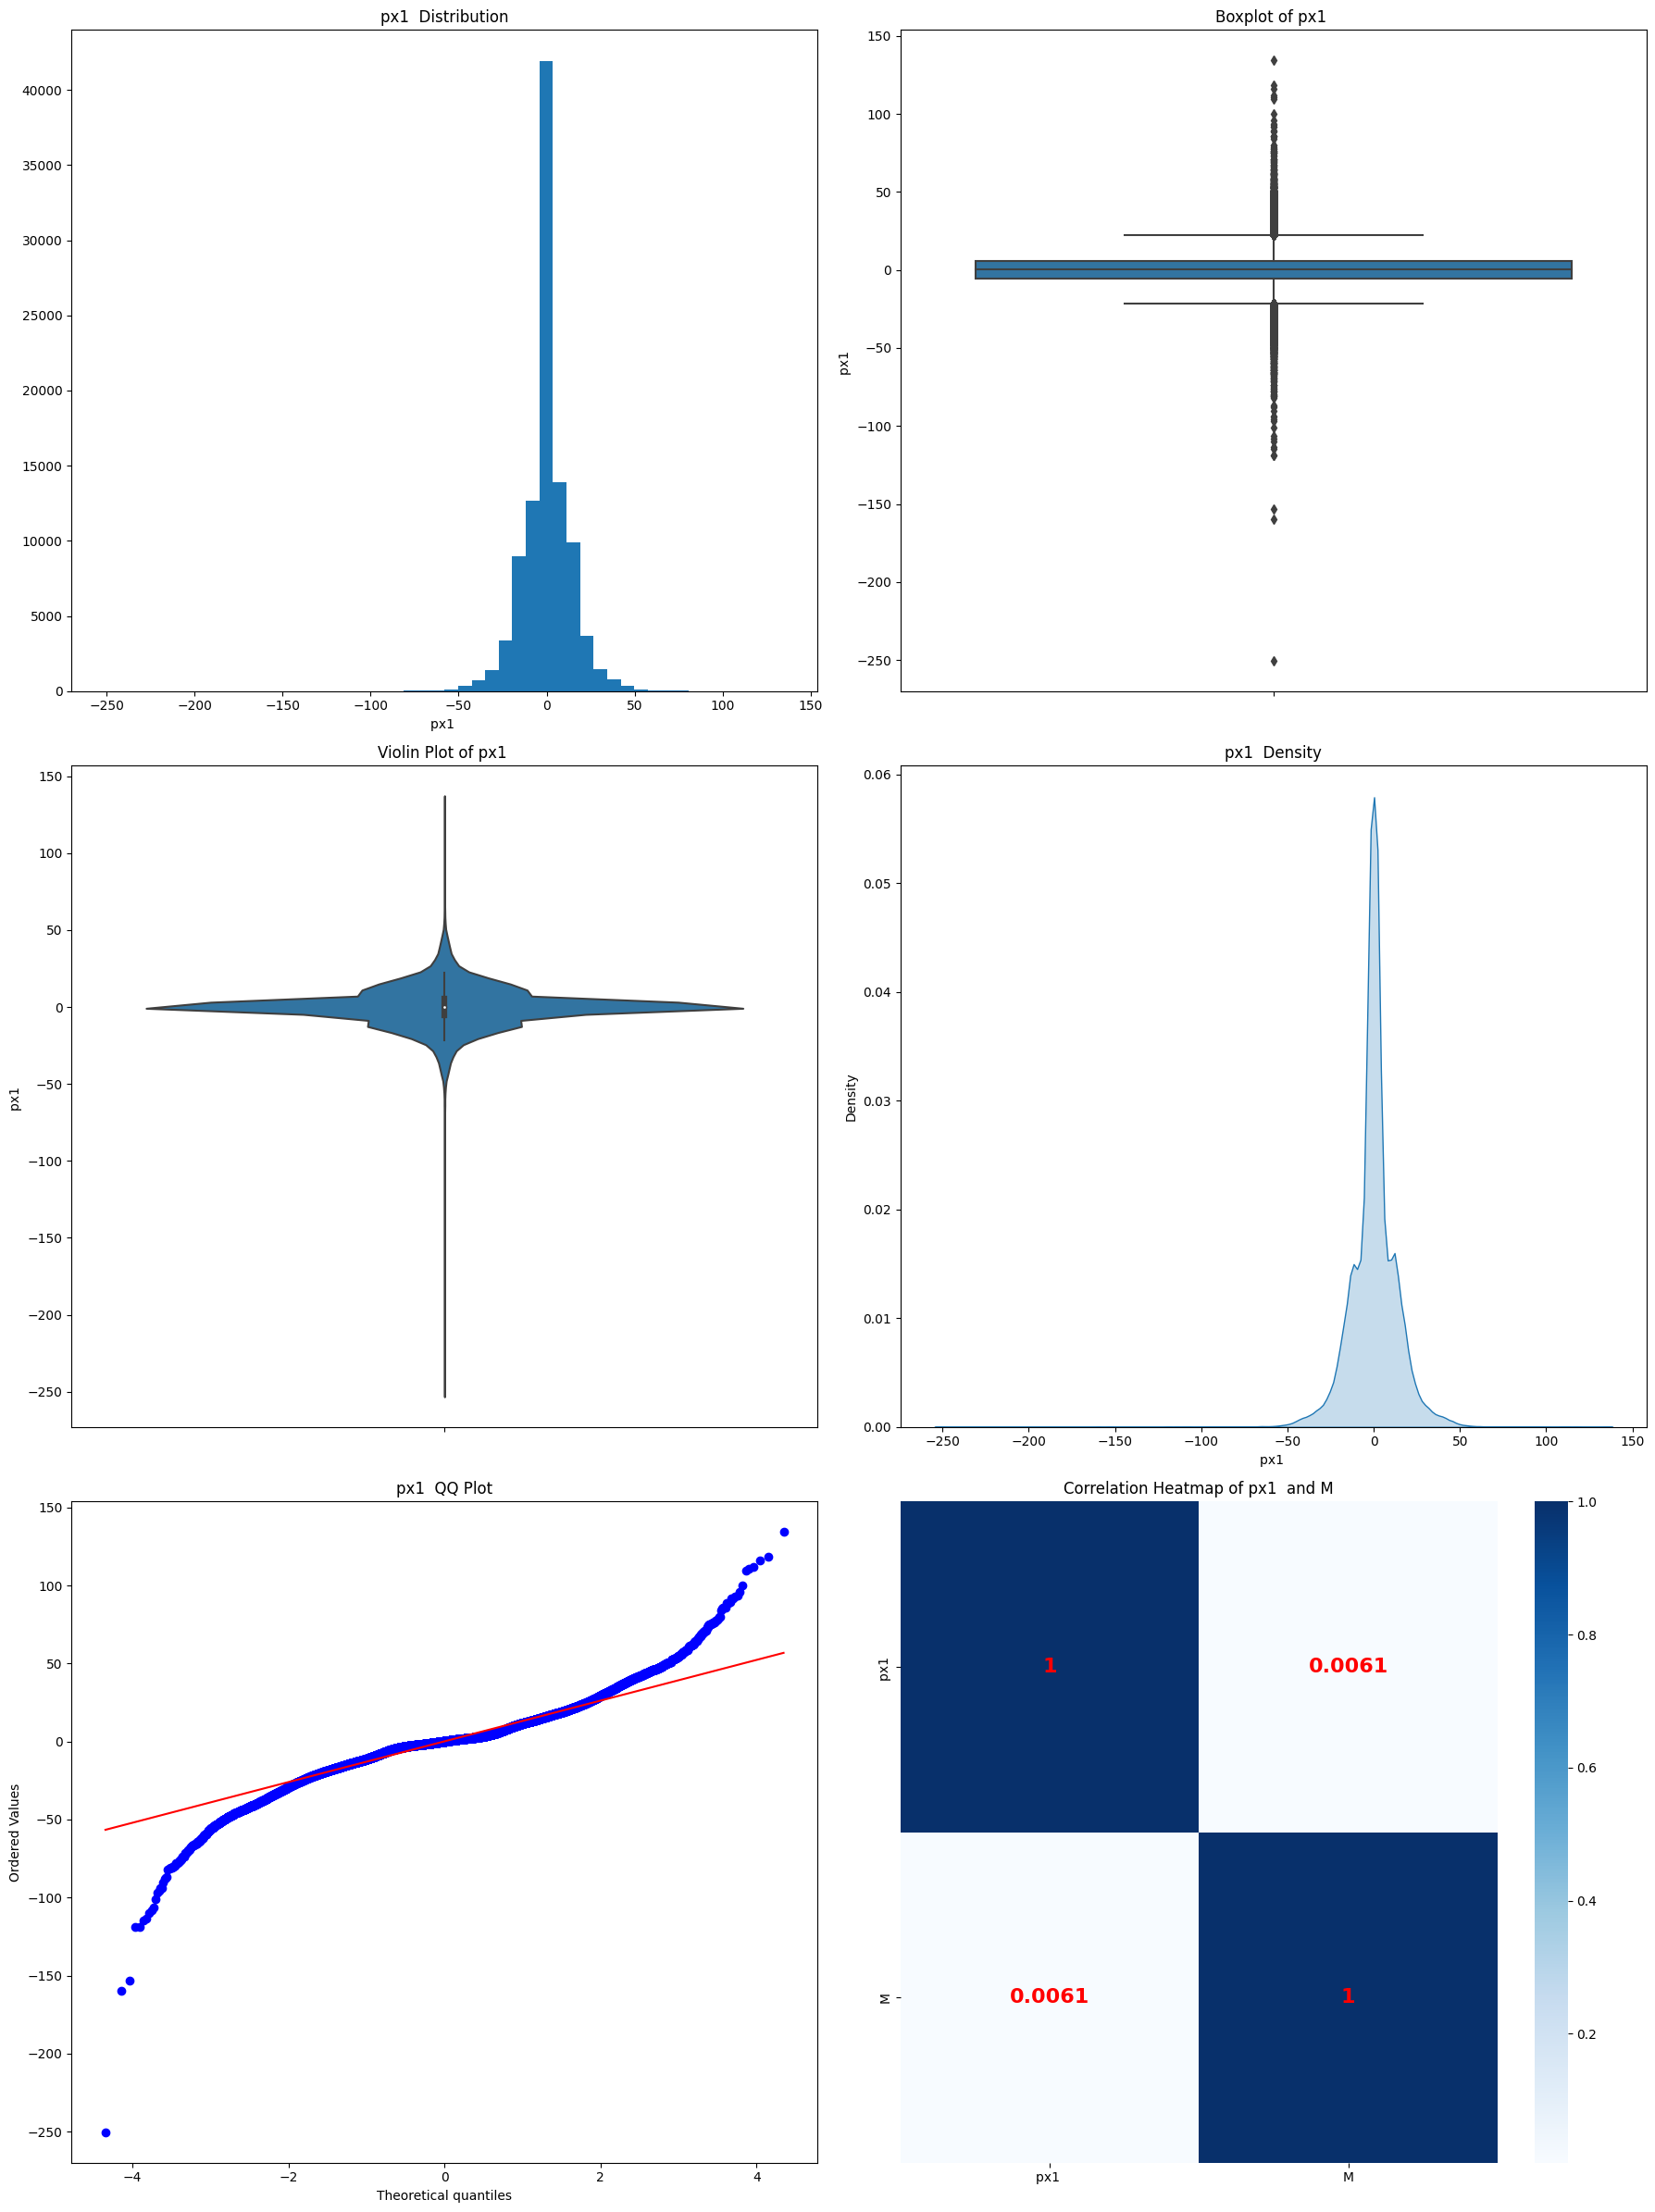

#####################################
count   100000.000
mean         0.182
std         13.470
min       -126.079
5%         -21.327
10%        -15.349
20%         -8.389
30%         -3.413
40%         -1.647
50%          0.099
60%          1.811
70%          3.670
80%          8.895
90%         15.860
95%         21.655
99%         38.088
max        147.467
Name: py1, dtype: float64
Skewness: 0.03
Kurtosis: 4.06


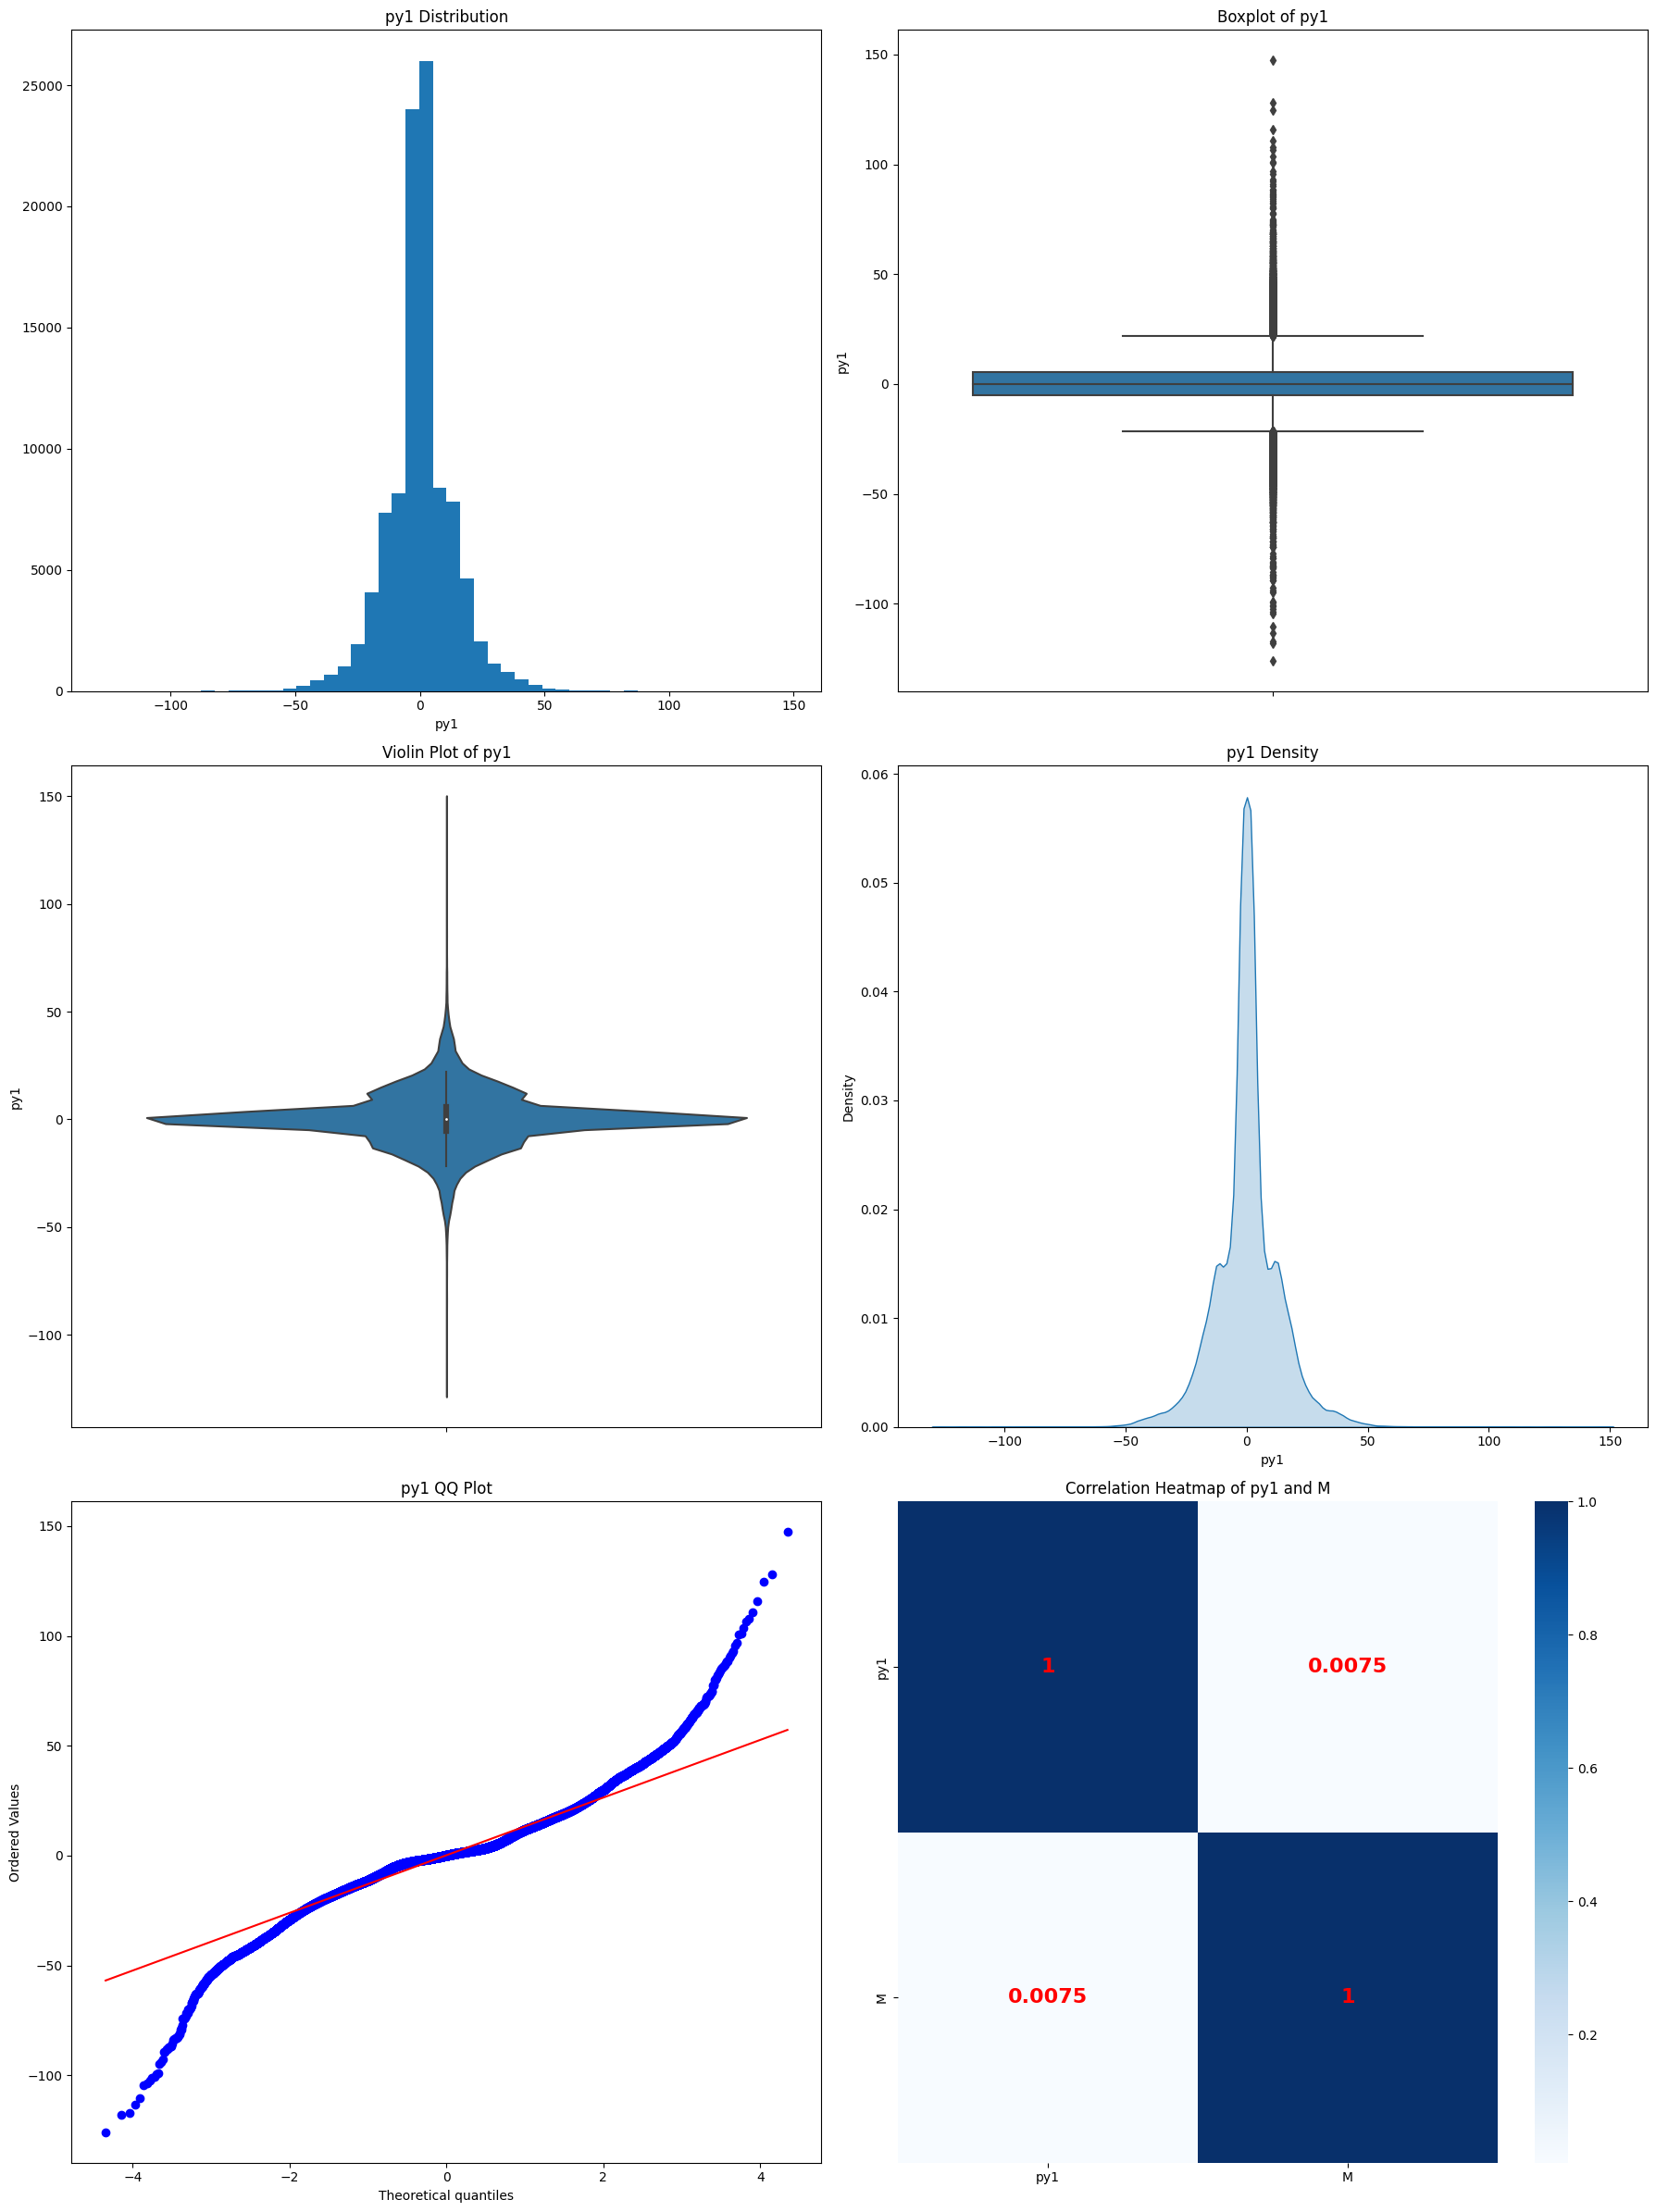

#####################################
count   100000.000
mean        -1.508
std         51.604
min       -840.987
5%         -89.306
10%        -58.802
20%        -22.849
30%        -10.822
40%         -3.749
50%         -0.313
60%          2.516
70%          8.757
80%         19.959
90%         52.746
95%         83.342
99%        150.126
max        760.096
Name: pz1, dtype: float64
Skewness: -0.05
Kurtosis: 7.74


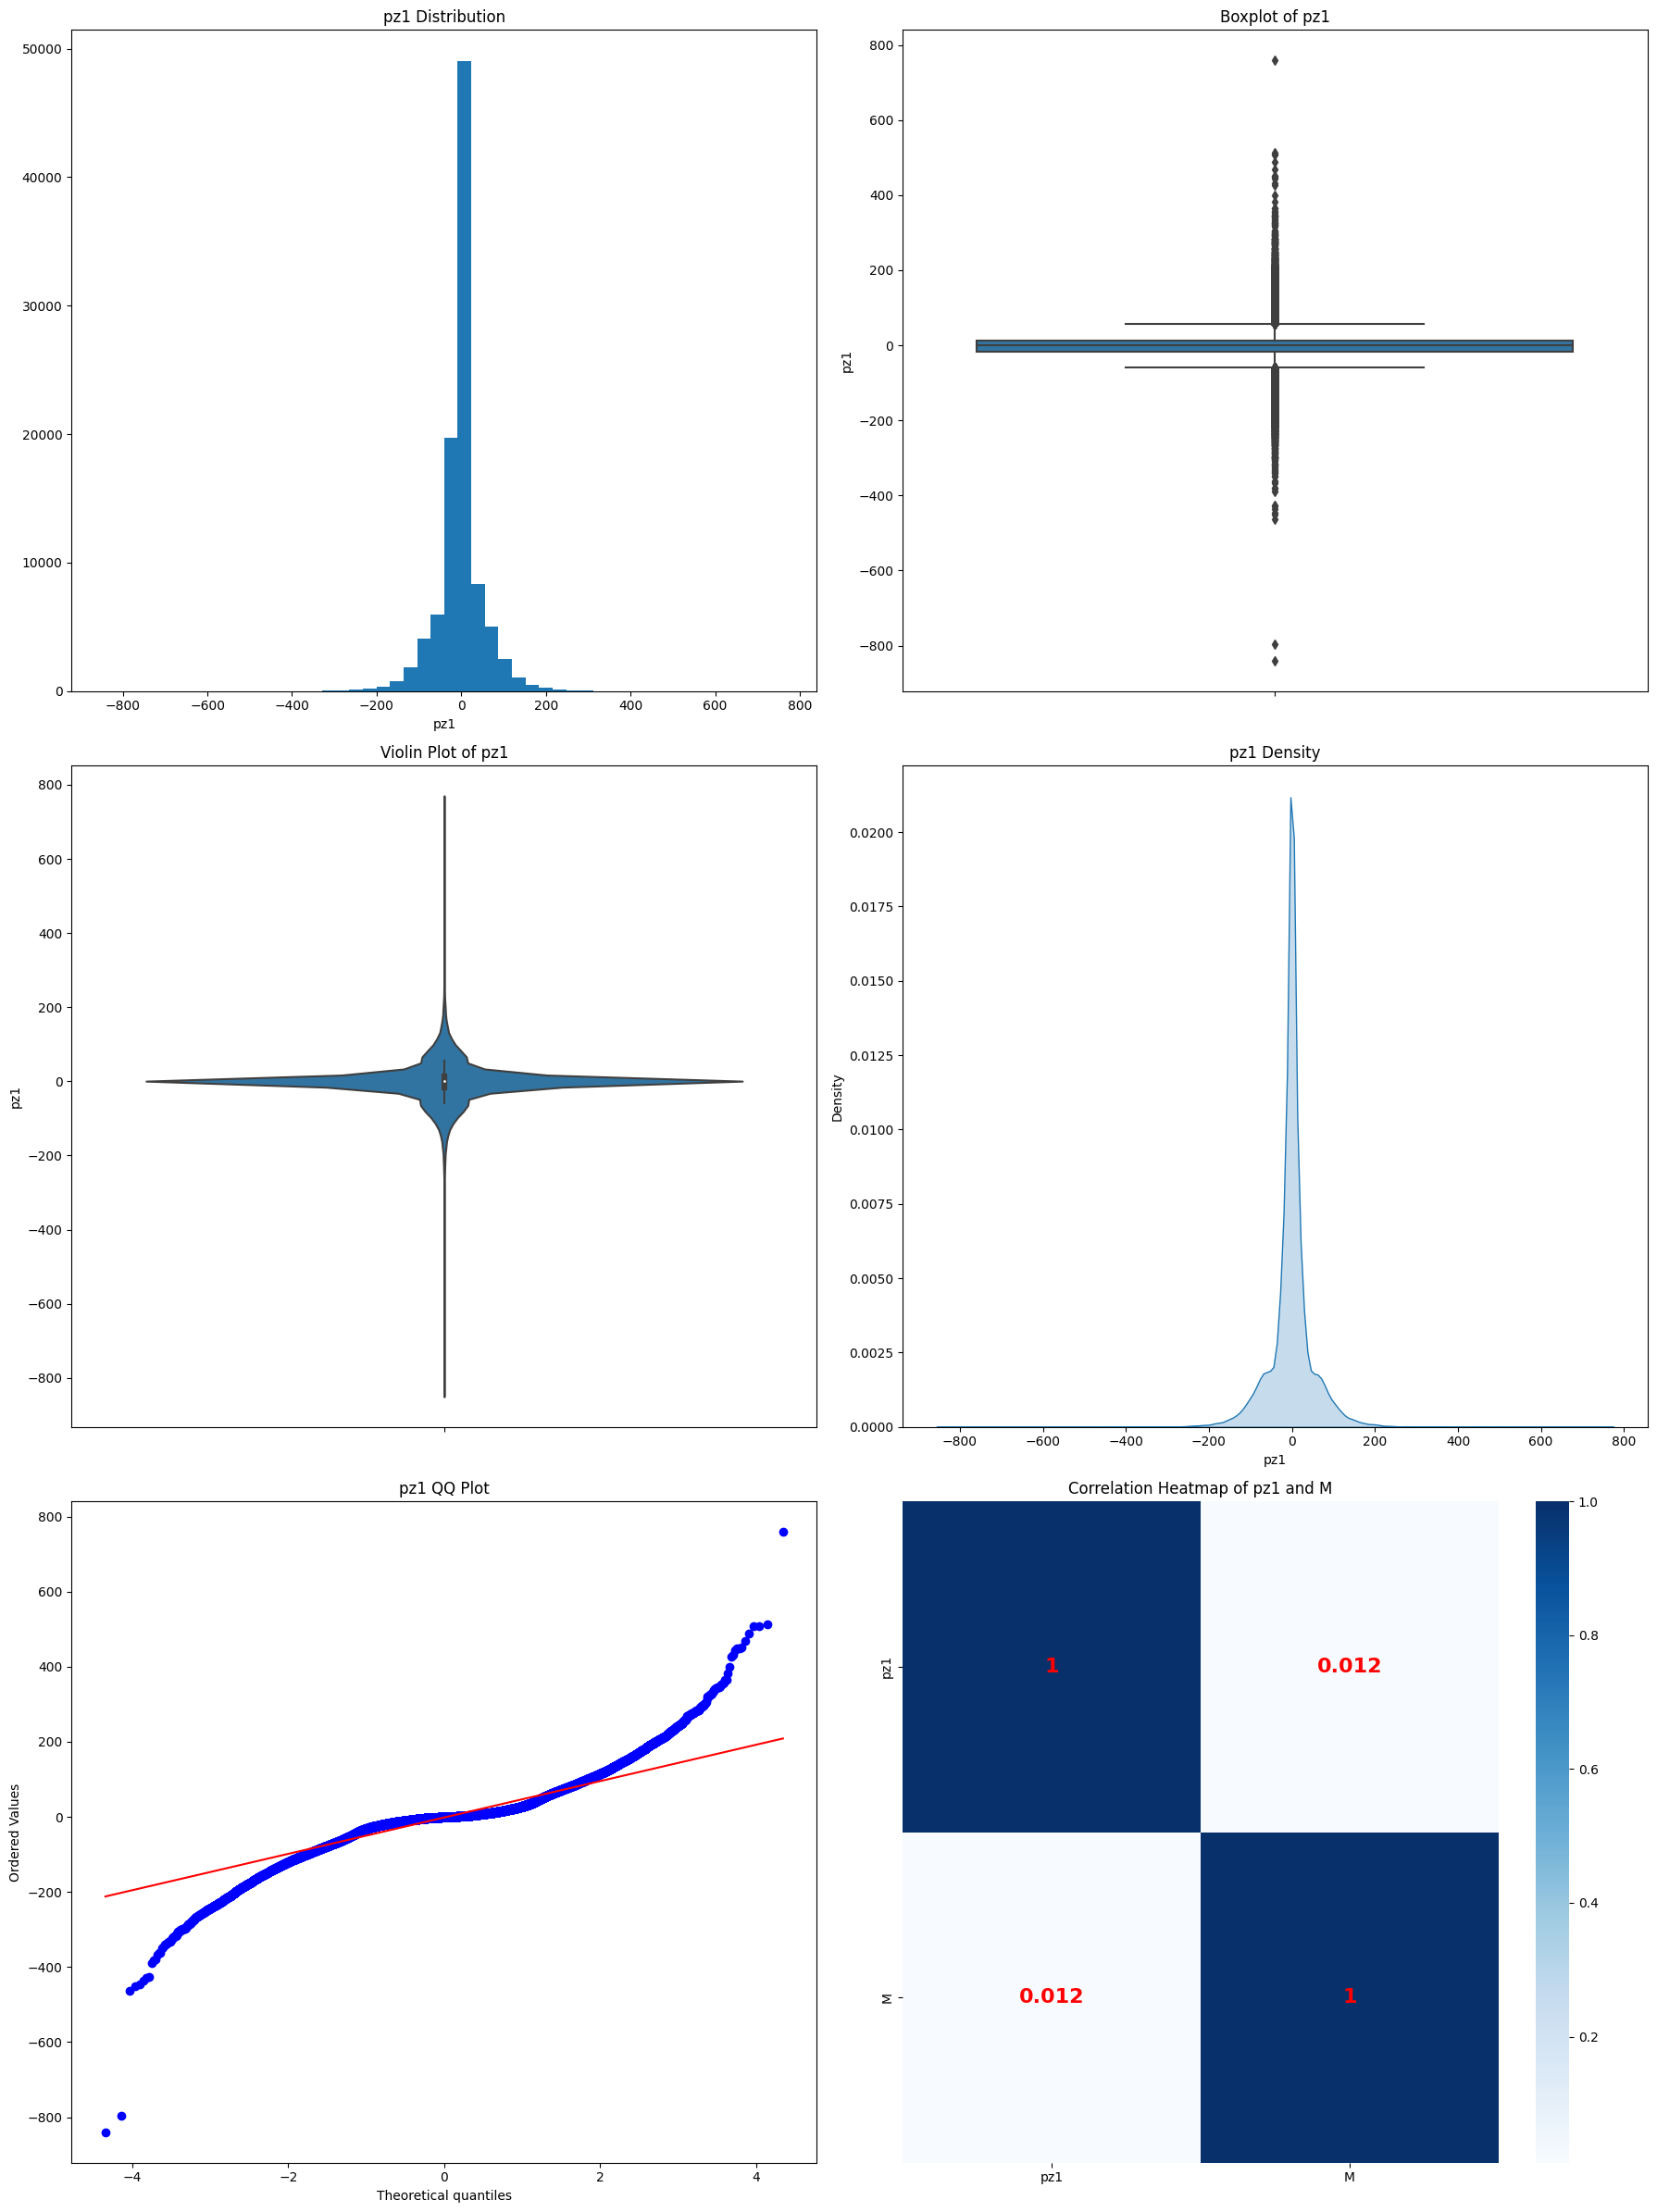

#####################################
count   100000.000
mean        14.412
std         12.389
min          0.220
5%           2.078
10%          2.410
20%          3.186
30%          4.550
40%          8.089
50%         12.968
60%         15.412
70%         18.497
80%         22.163
90%         30.329
95%         39.181
99%         52.548
max        265.578
Name: pt1, dtype: float64
Skewness: 1.74
Kurtosis: 7.29


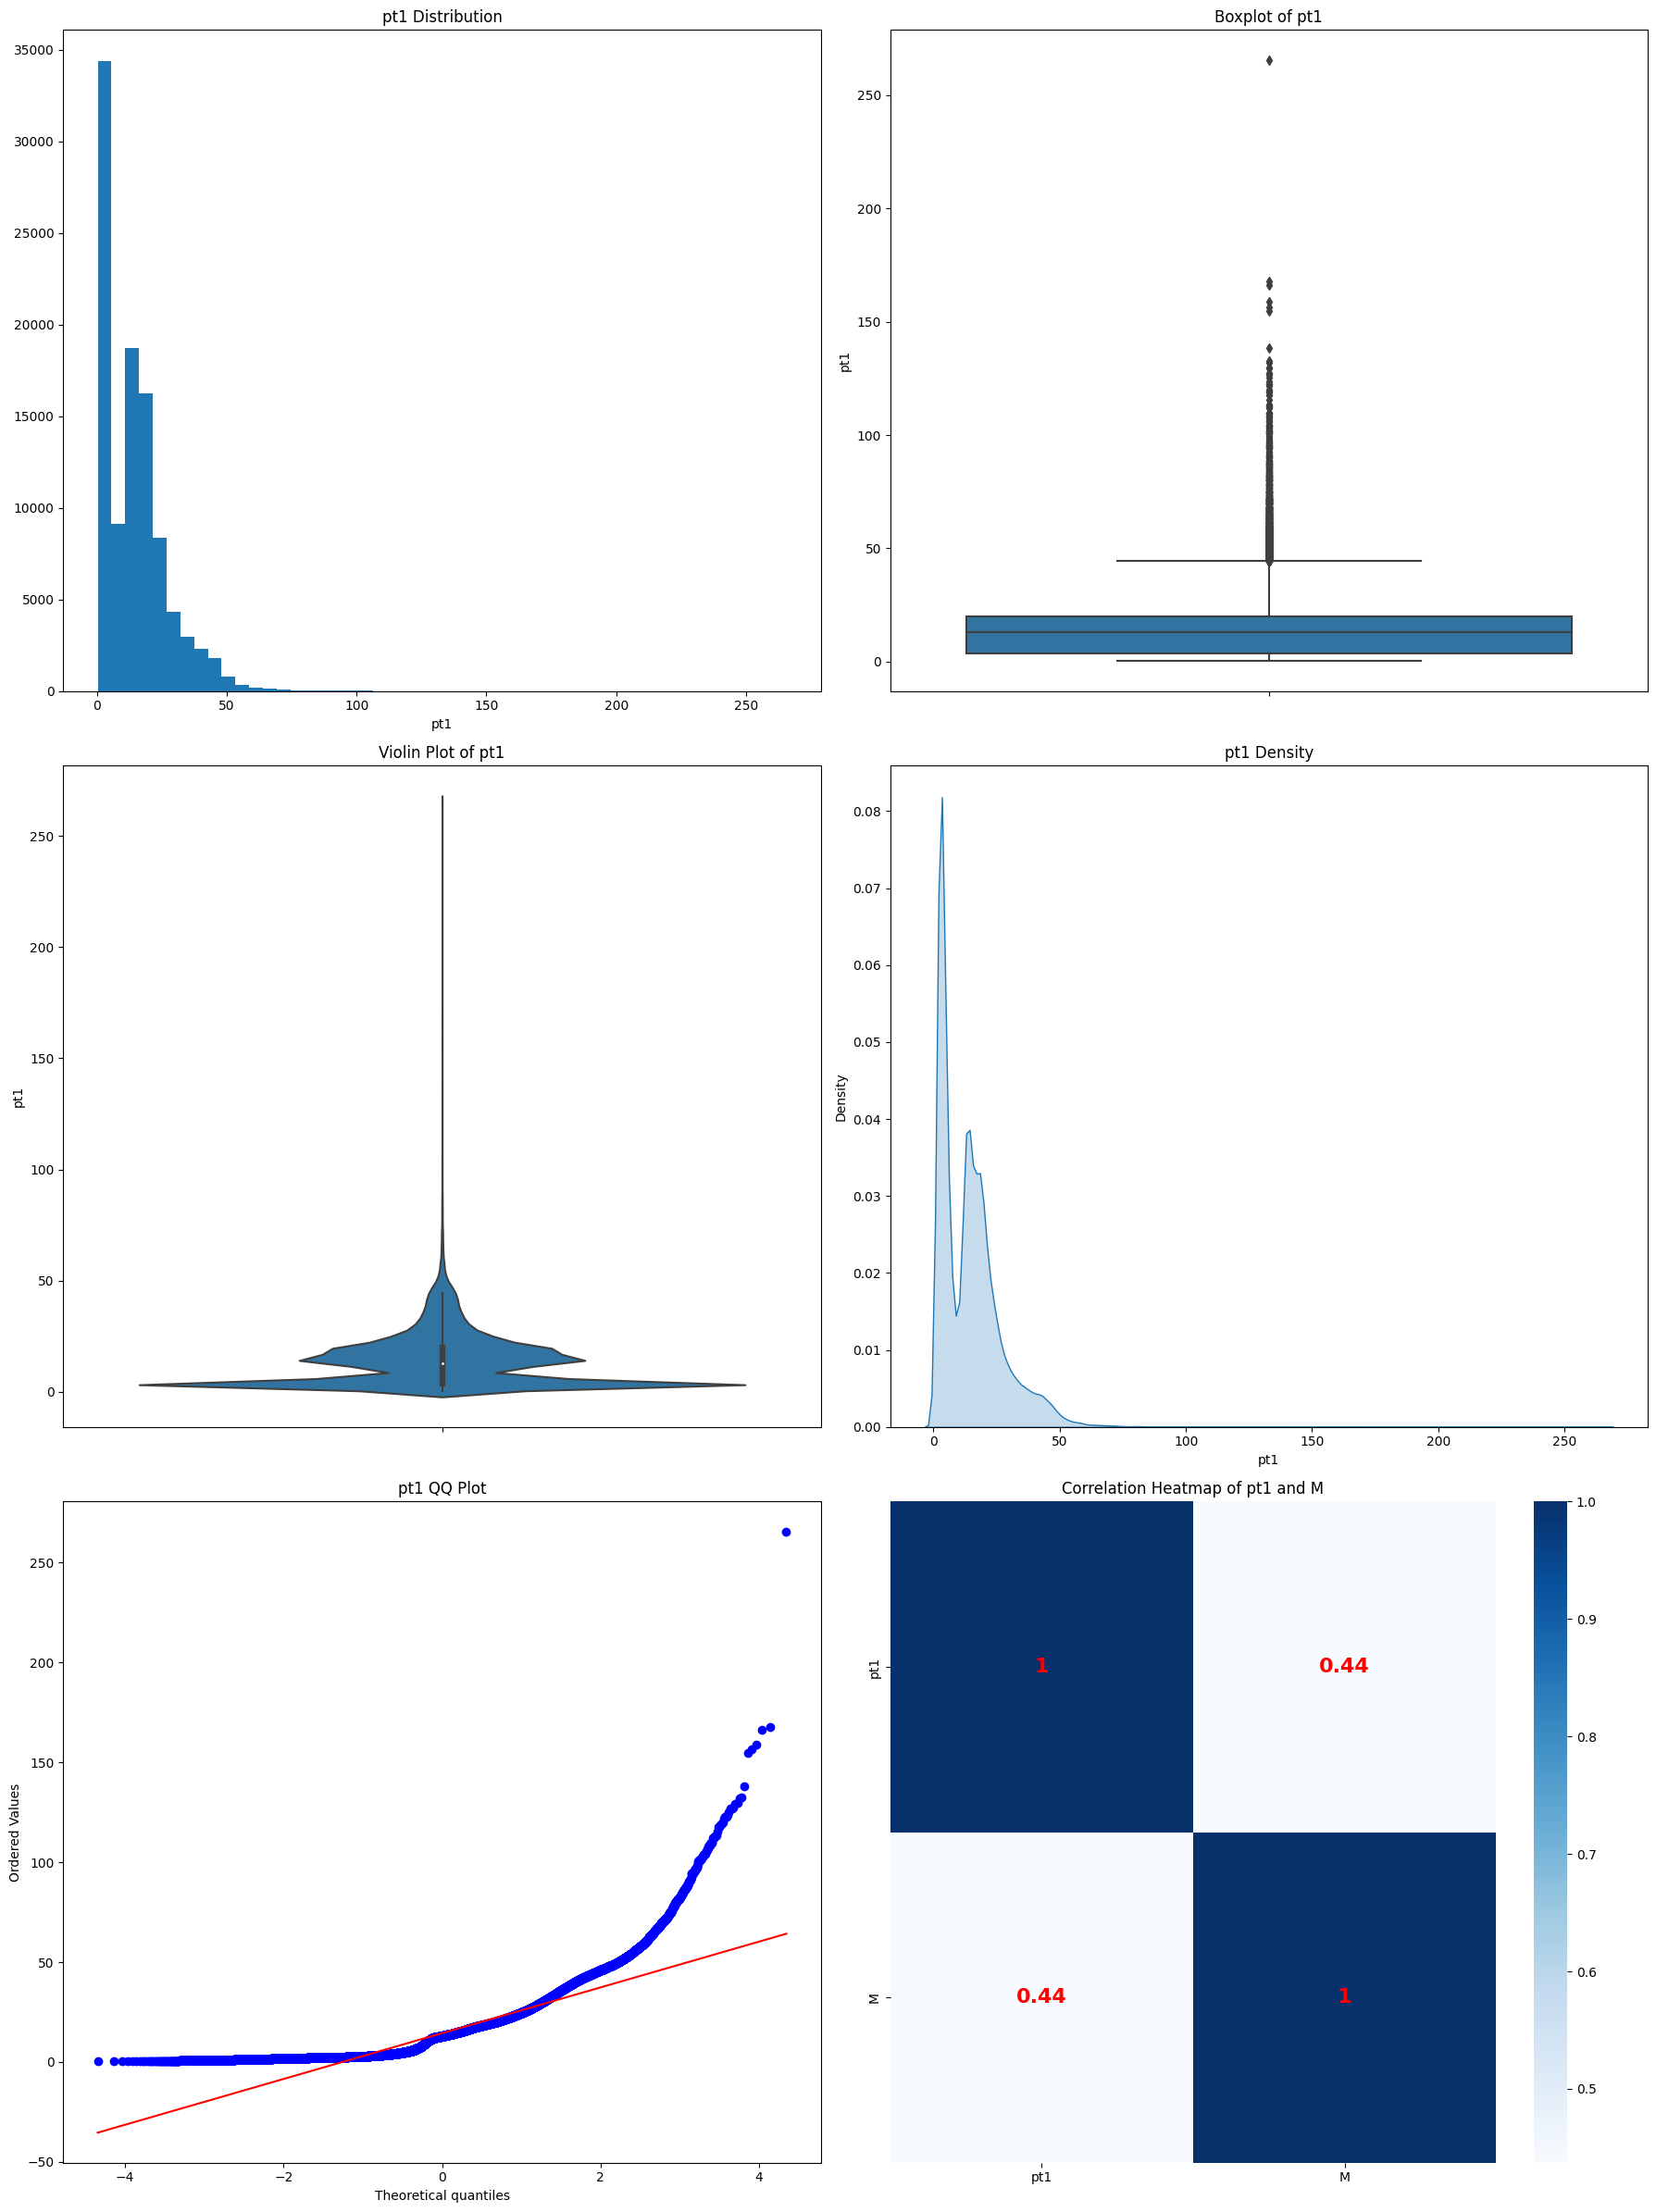

#####################################
count   100000.000
mean        -0.064
std          1.462
min         -4.165
5%          -2.312
10%         -2.108
20%         -1.600
30%         -1.059
40%         -0.564
50%         -0.061
60%          0.423
70%          0.914
80%          1.380
90%          2.016
95%          2.241
99%          2.460
max          2.623
Name: eta1, dtype: float64
Skewness: 0.02
Kurtosis: -1.17


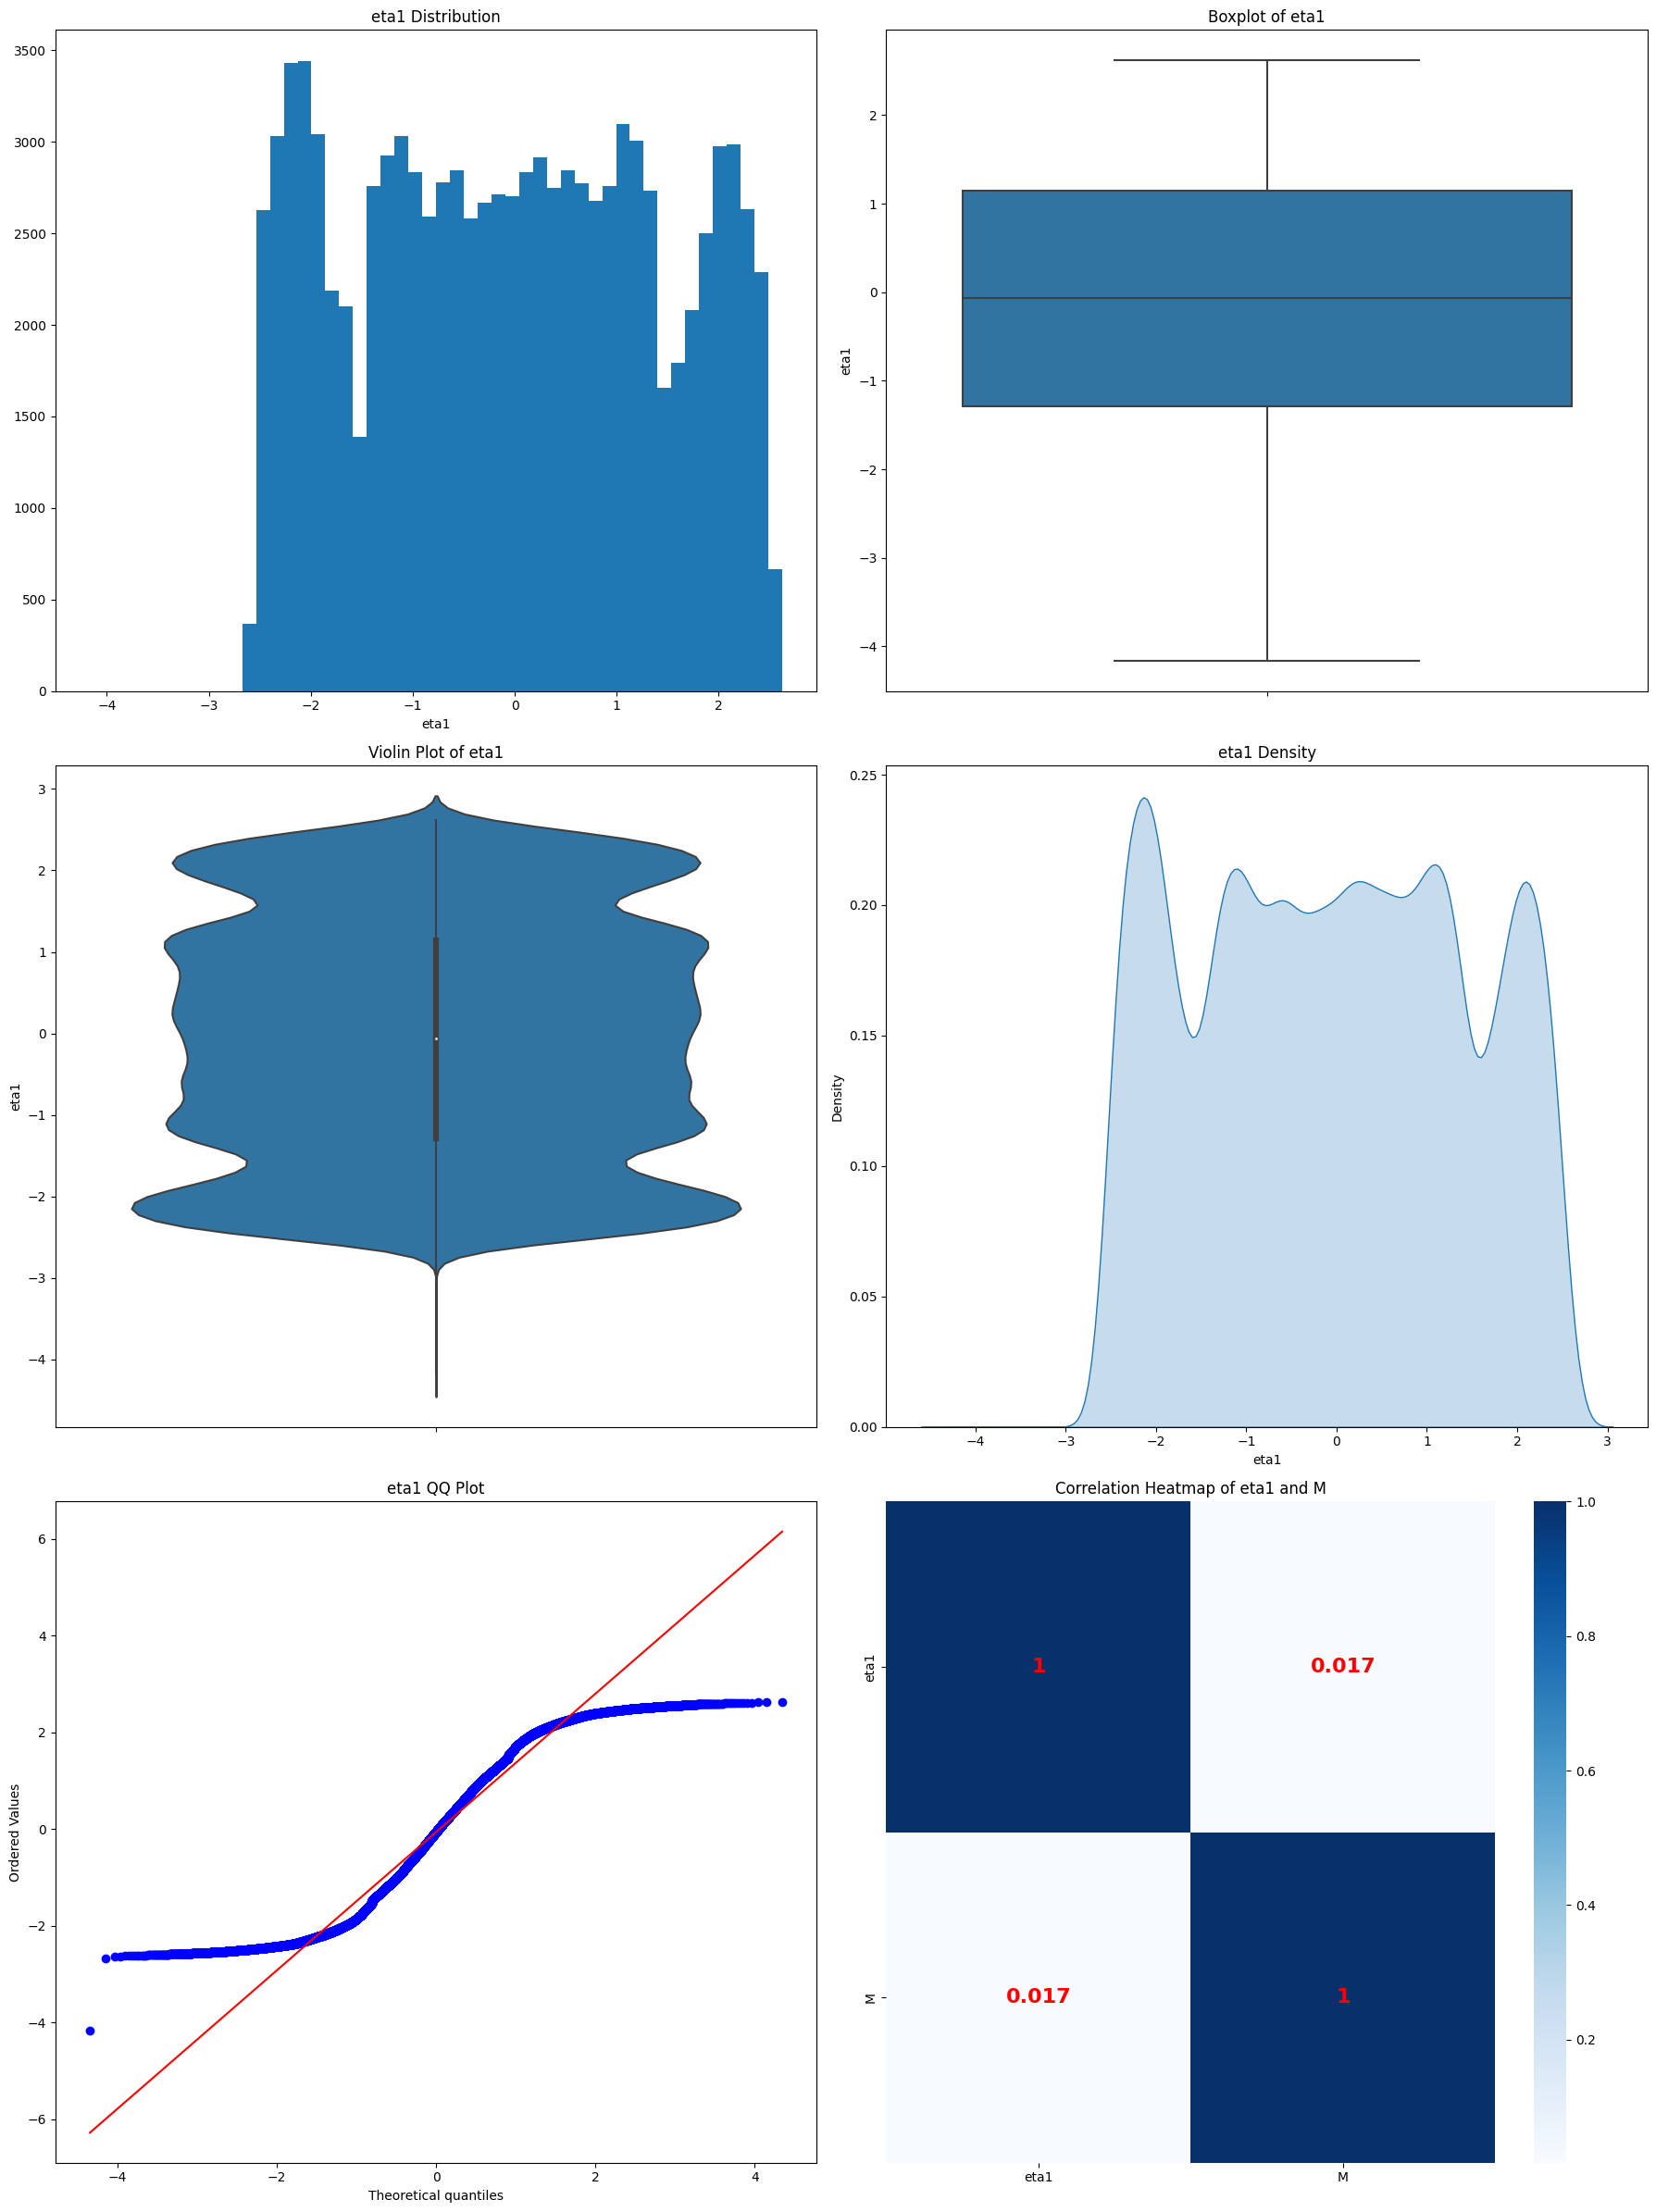

#####################################
count   100000.000
mean         0.022
std          1.800
min         -3.142
5%          -2.814
10%         -2.487
20%         -1.848
30%         -1.197
40%         -0.566
50%          0.034
60%          0.660
70%          1.270
80%          1.871
90%          2.498
95%          2.816
99%          3.076
max          3.141
Name: phi1, dtype: float64
Skewness: -0.02
Kurtosis: -1.18


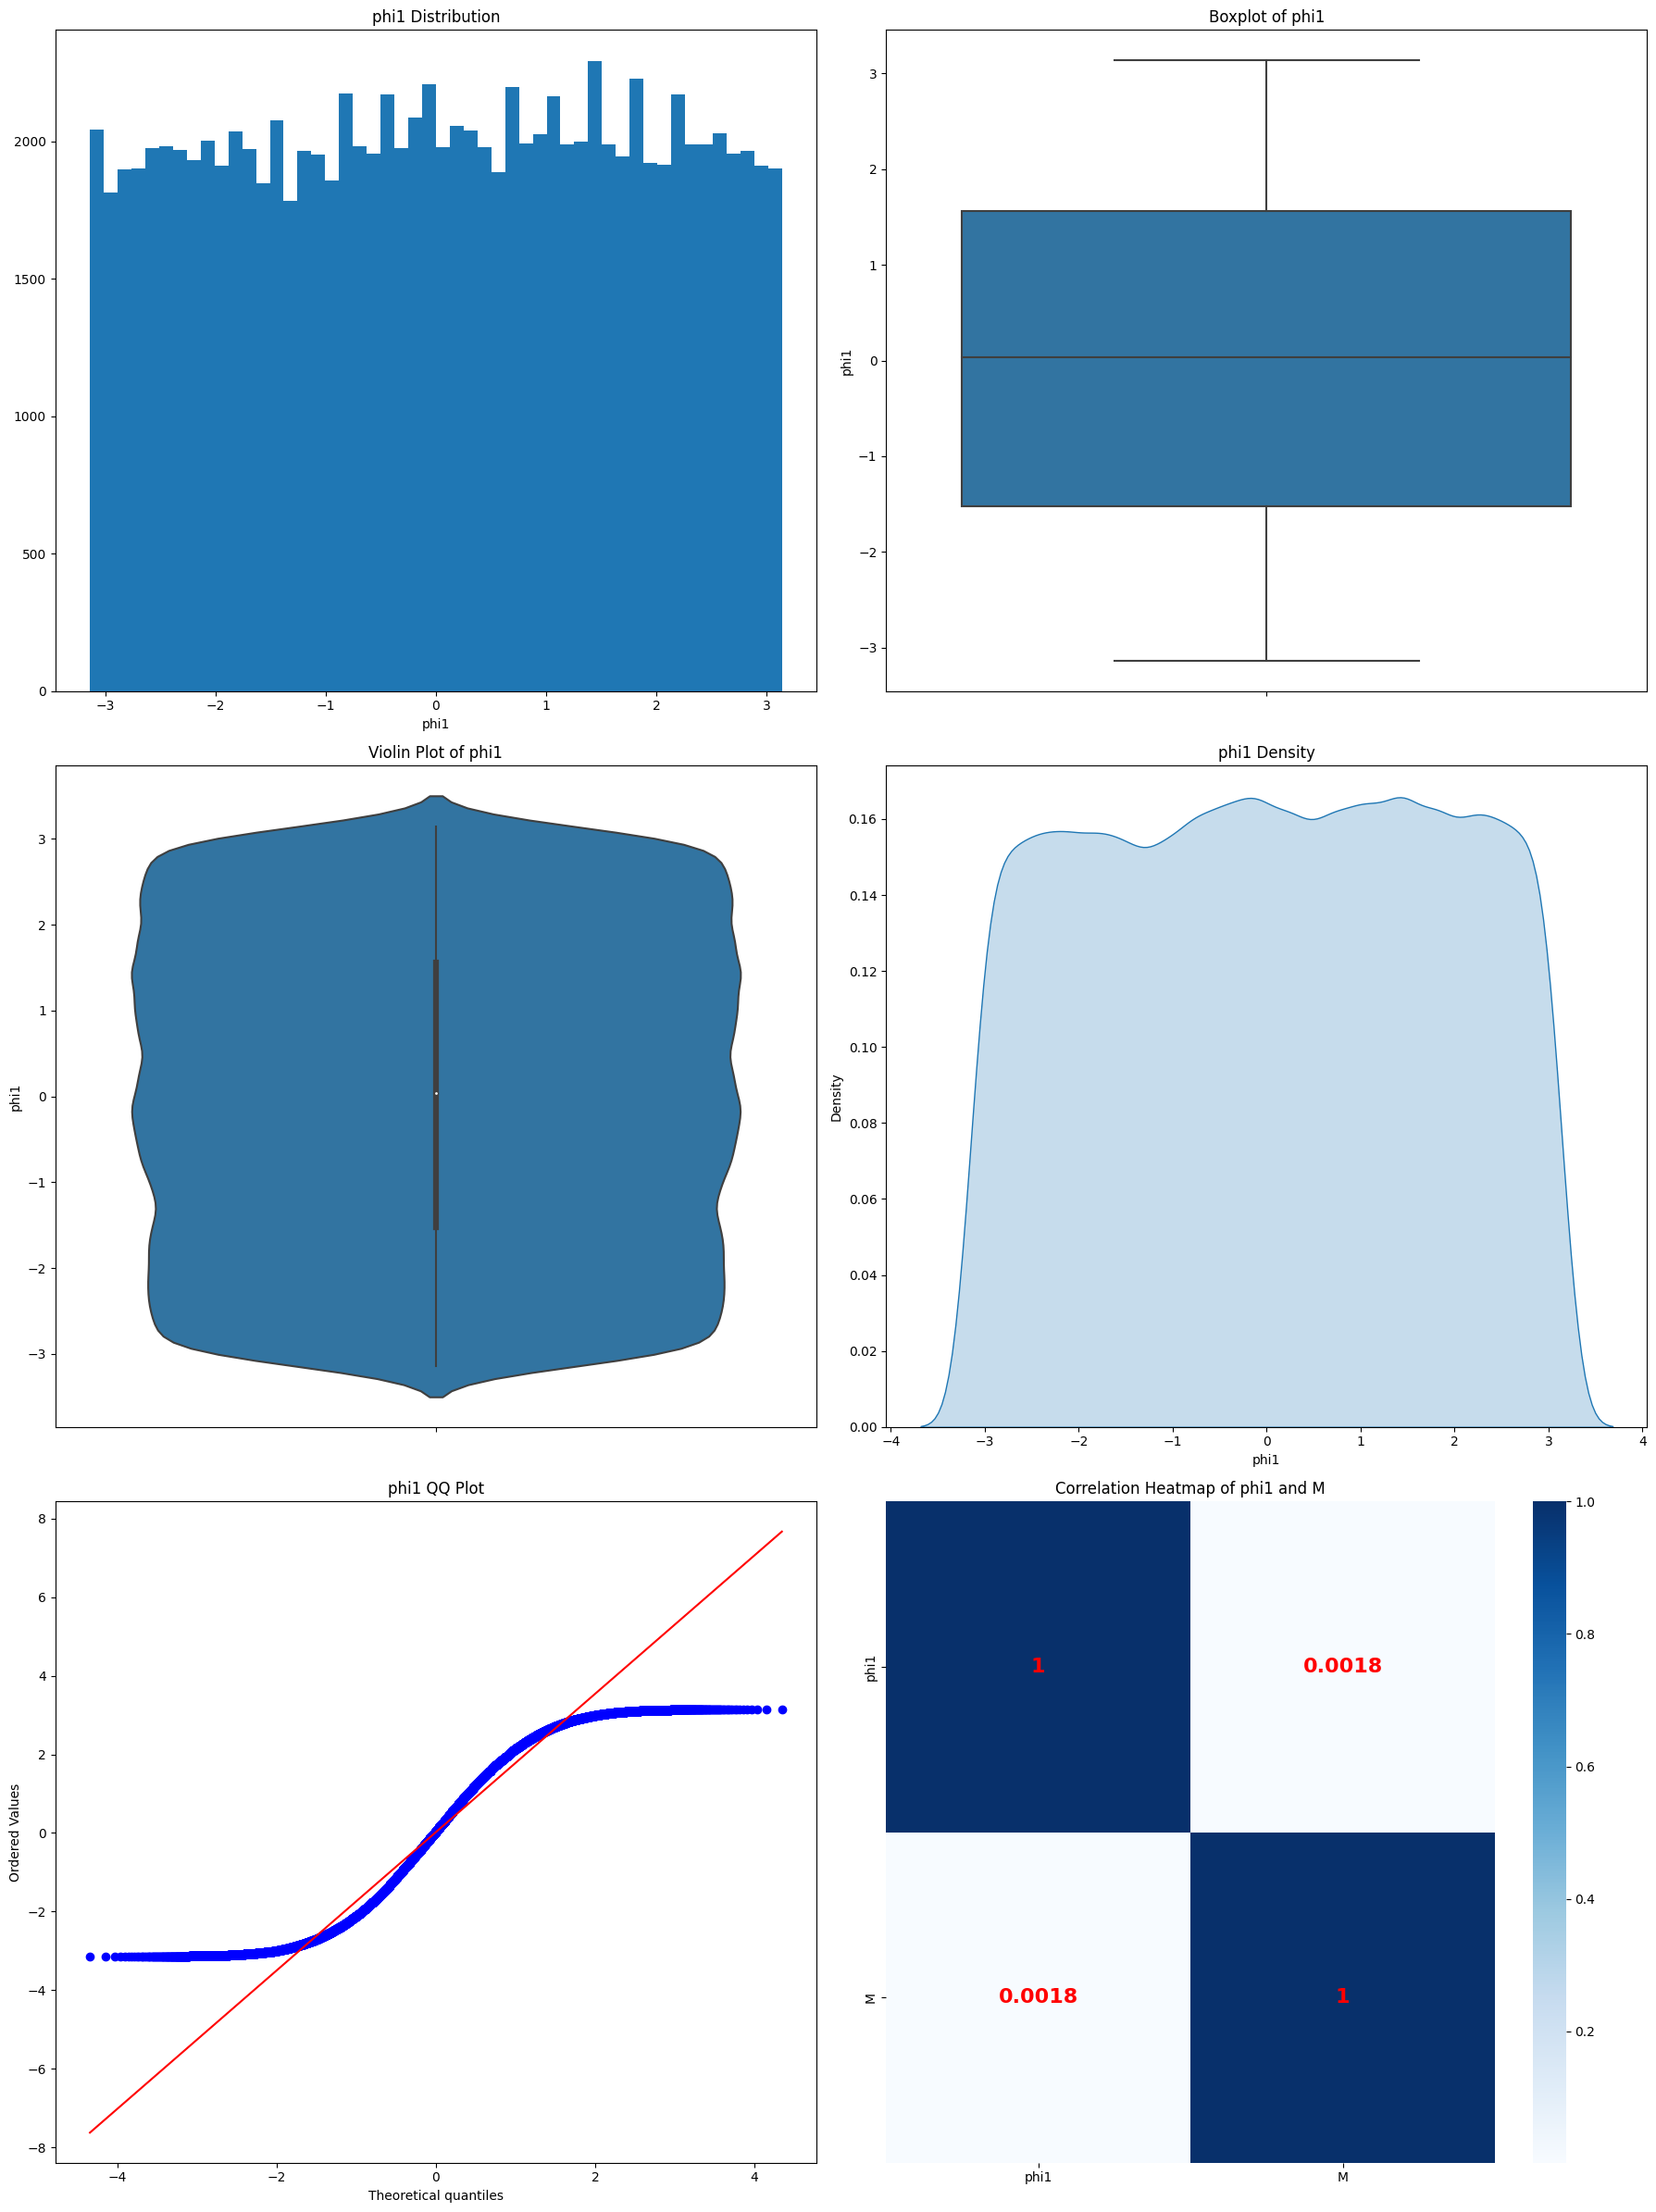

#####################################
count   100000.000
mean        44.003
std         46.751
min          0.472
5%           2.880
10%          4.346
20%          9.035
30%         13.213
40%         18.419
50%         25.265
60%         36.985
70%         56.828
80%         76.836
90%        104.942
95%        133.175
99%        207.266
max        948.375
Name: E2, dtype: float64
Skewness: 2.21
Kurtosis: 9.92


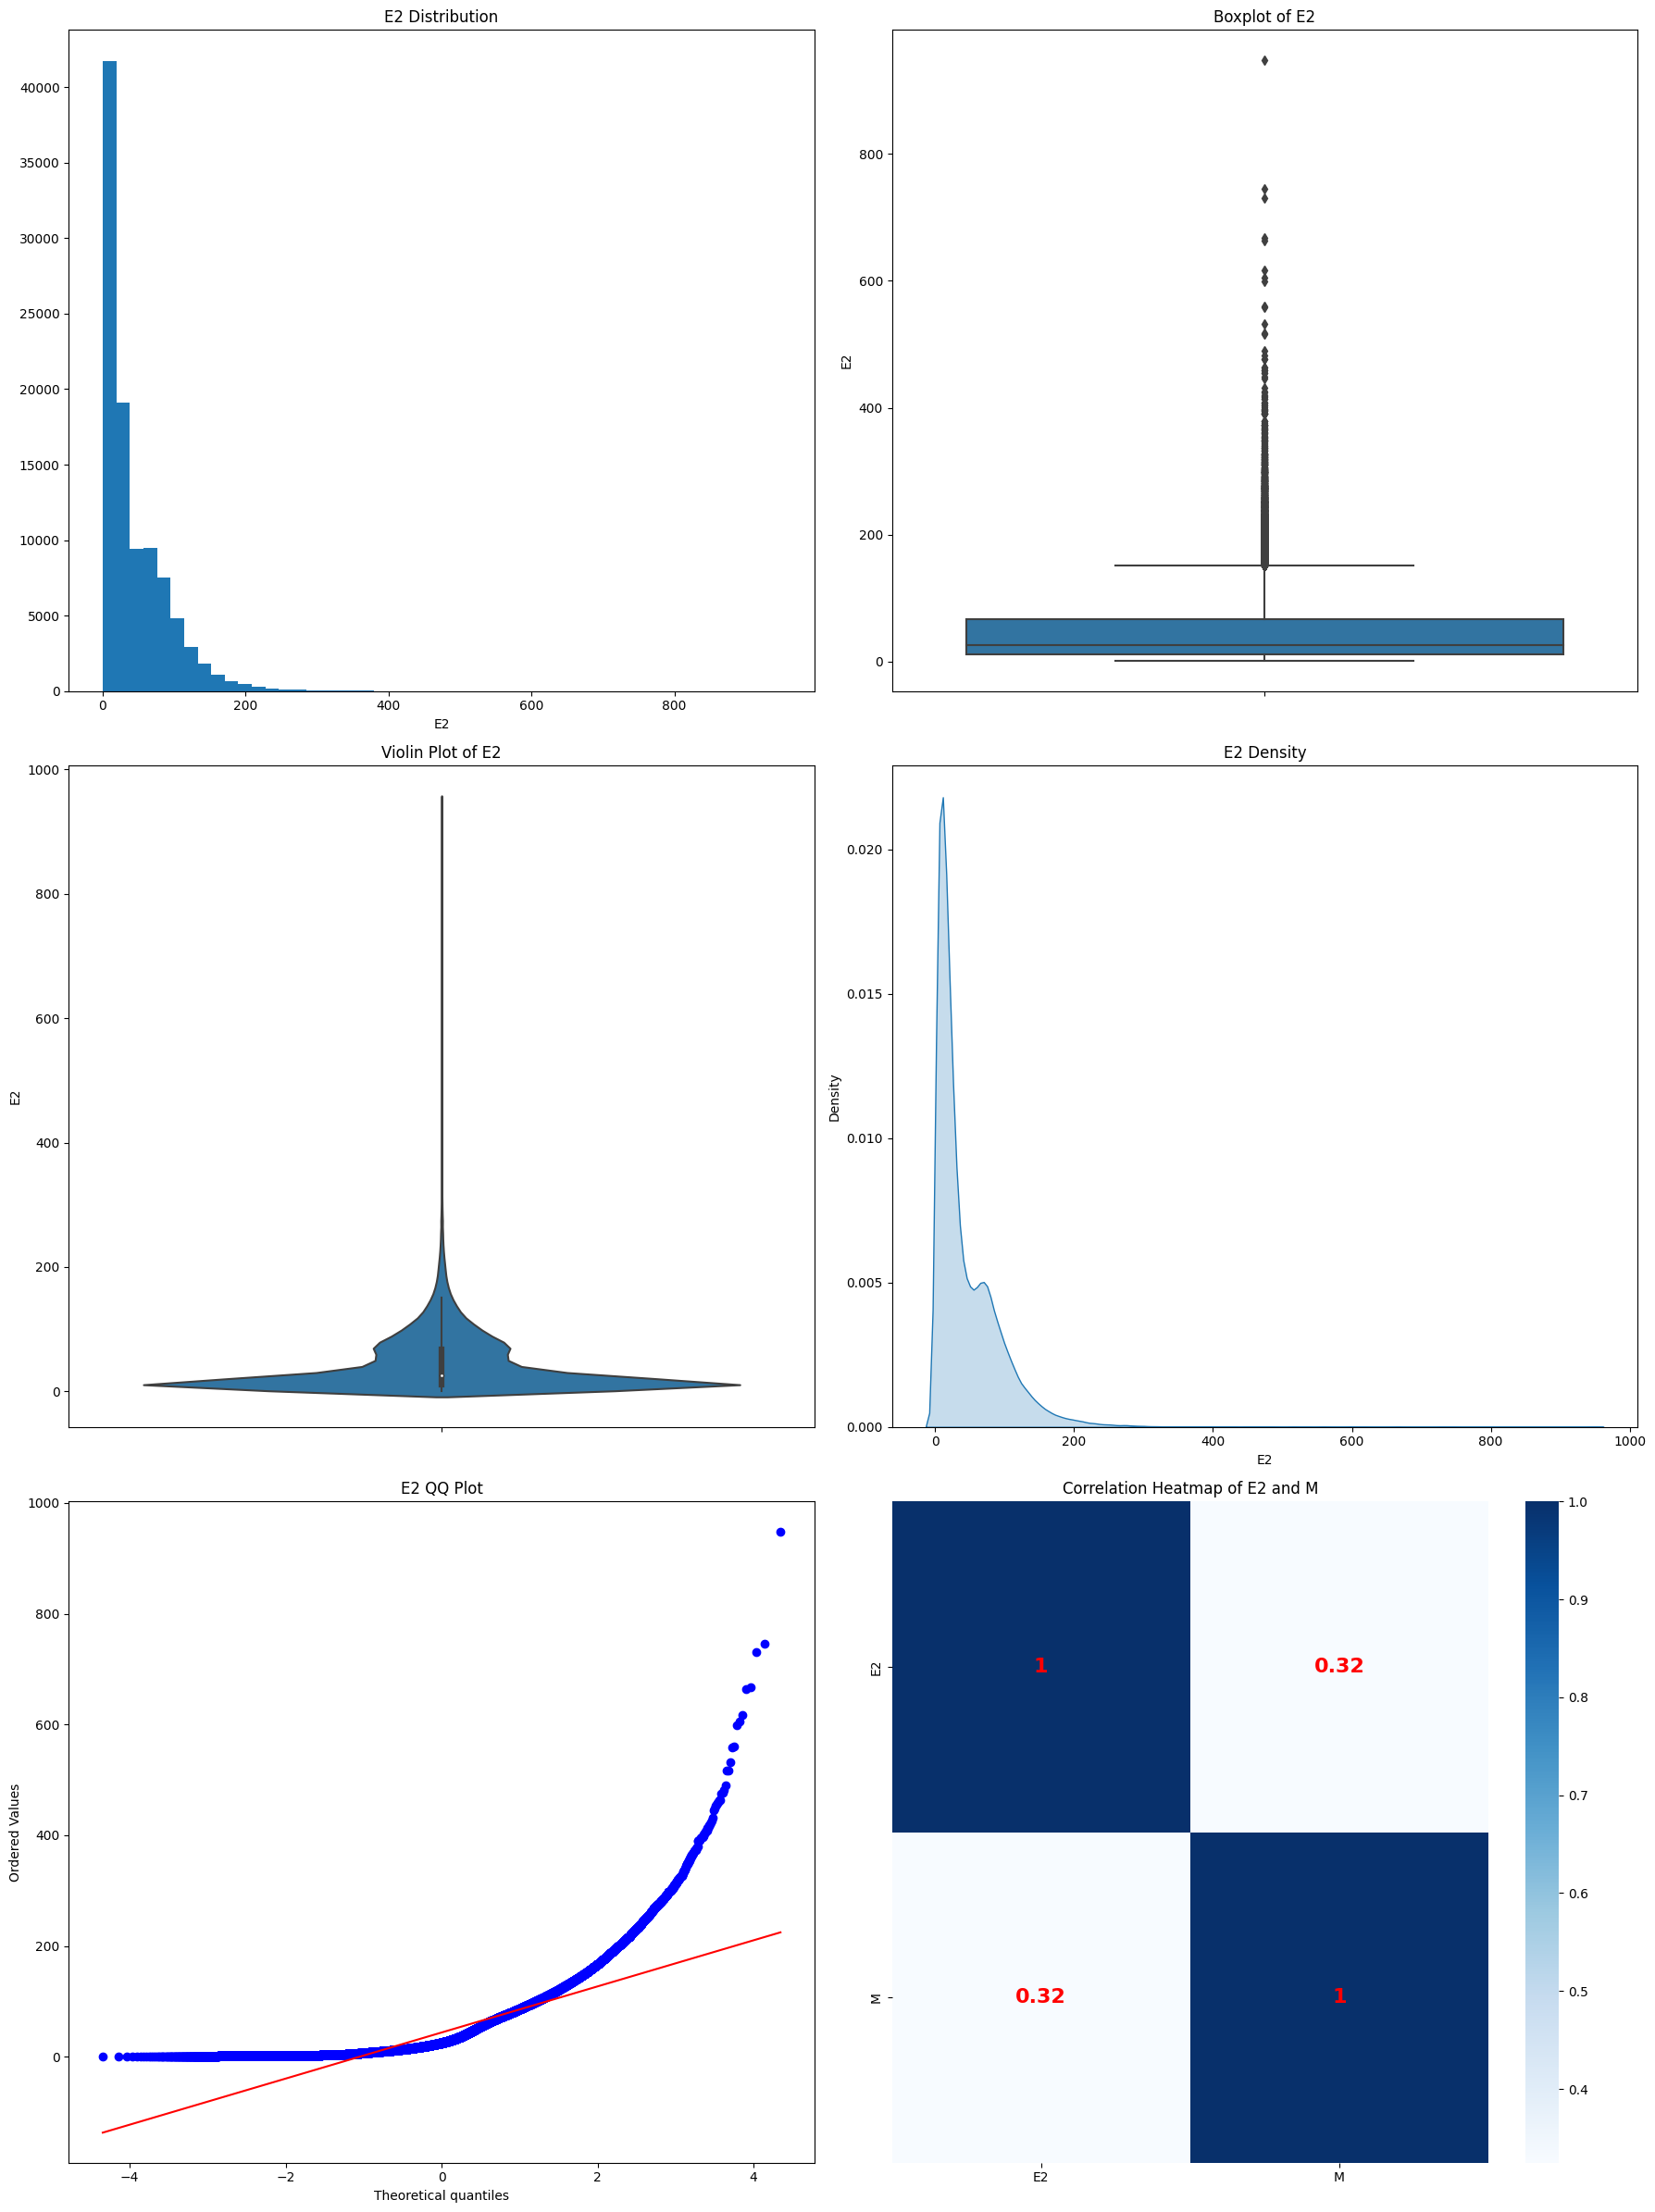

#####################################
count   100000.000
mean        -0.004
std         13.127
min       -233.730
5%         -20.853
10%        -14.992
20%         -7.425
30%         -3.317
40%         -1.735
50%         -0.036
60%          1.648
70%          3.334
80%          7.590
90%         14.962
95%         20.826
99%         37.509
max        227.330
Name: px2, dtype: float64
Skewness: -0.06
Kurtosis: 7.26


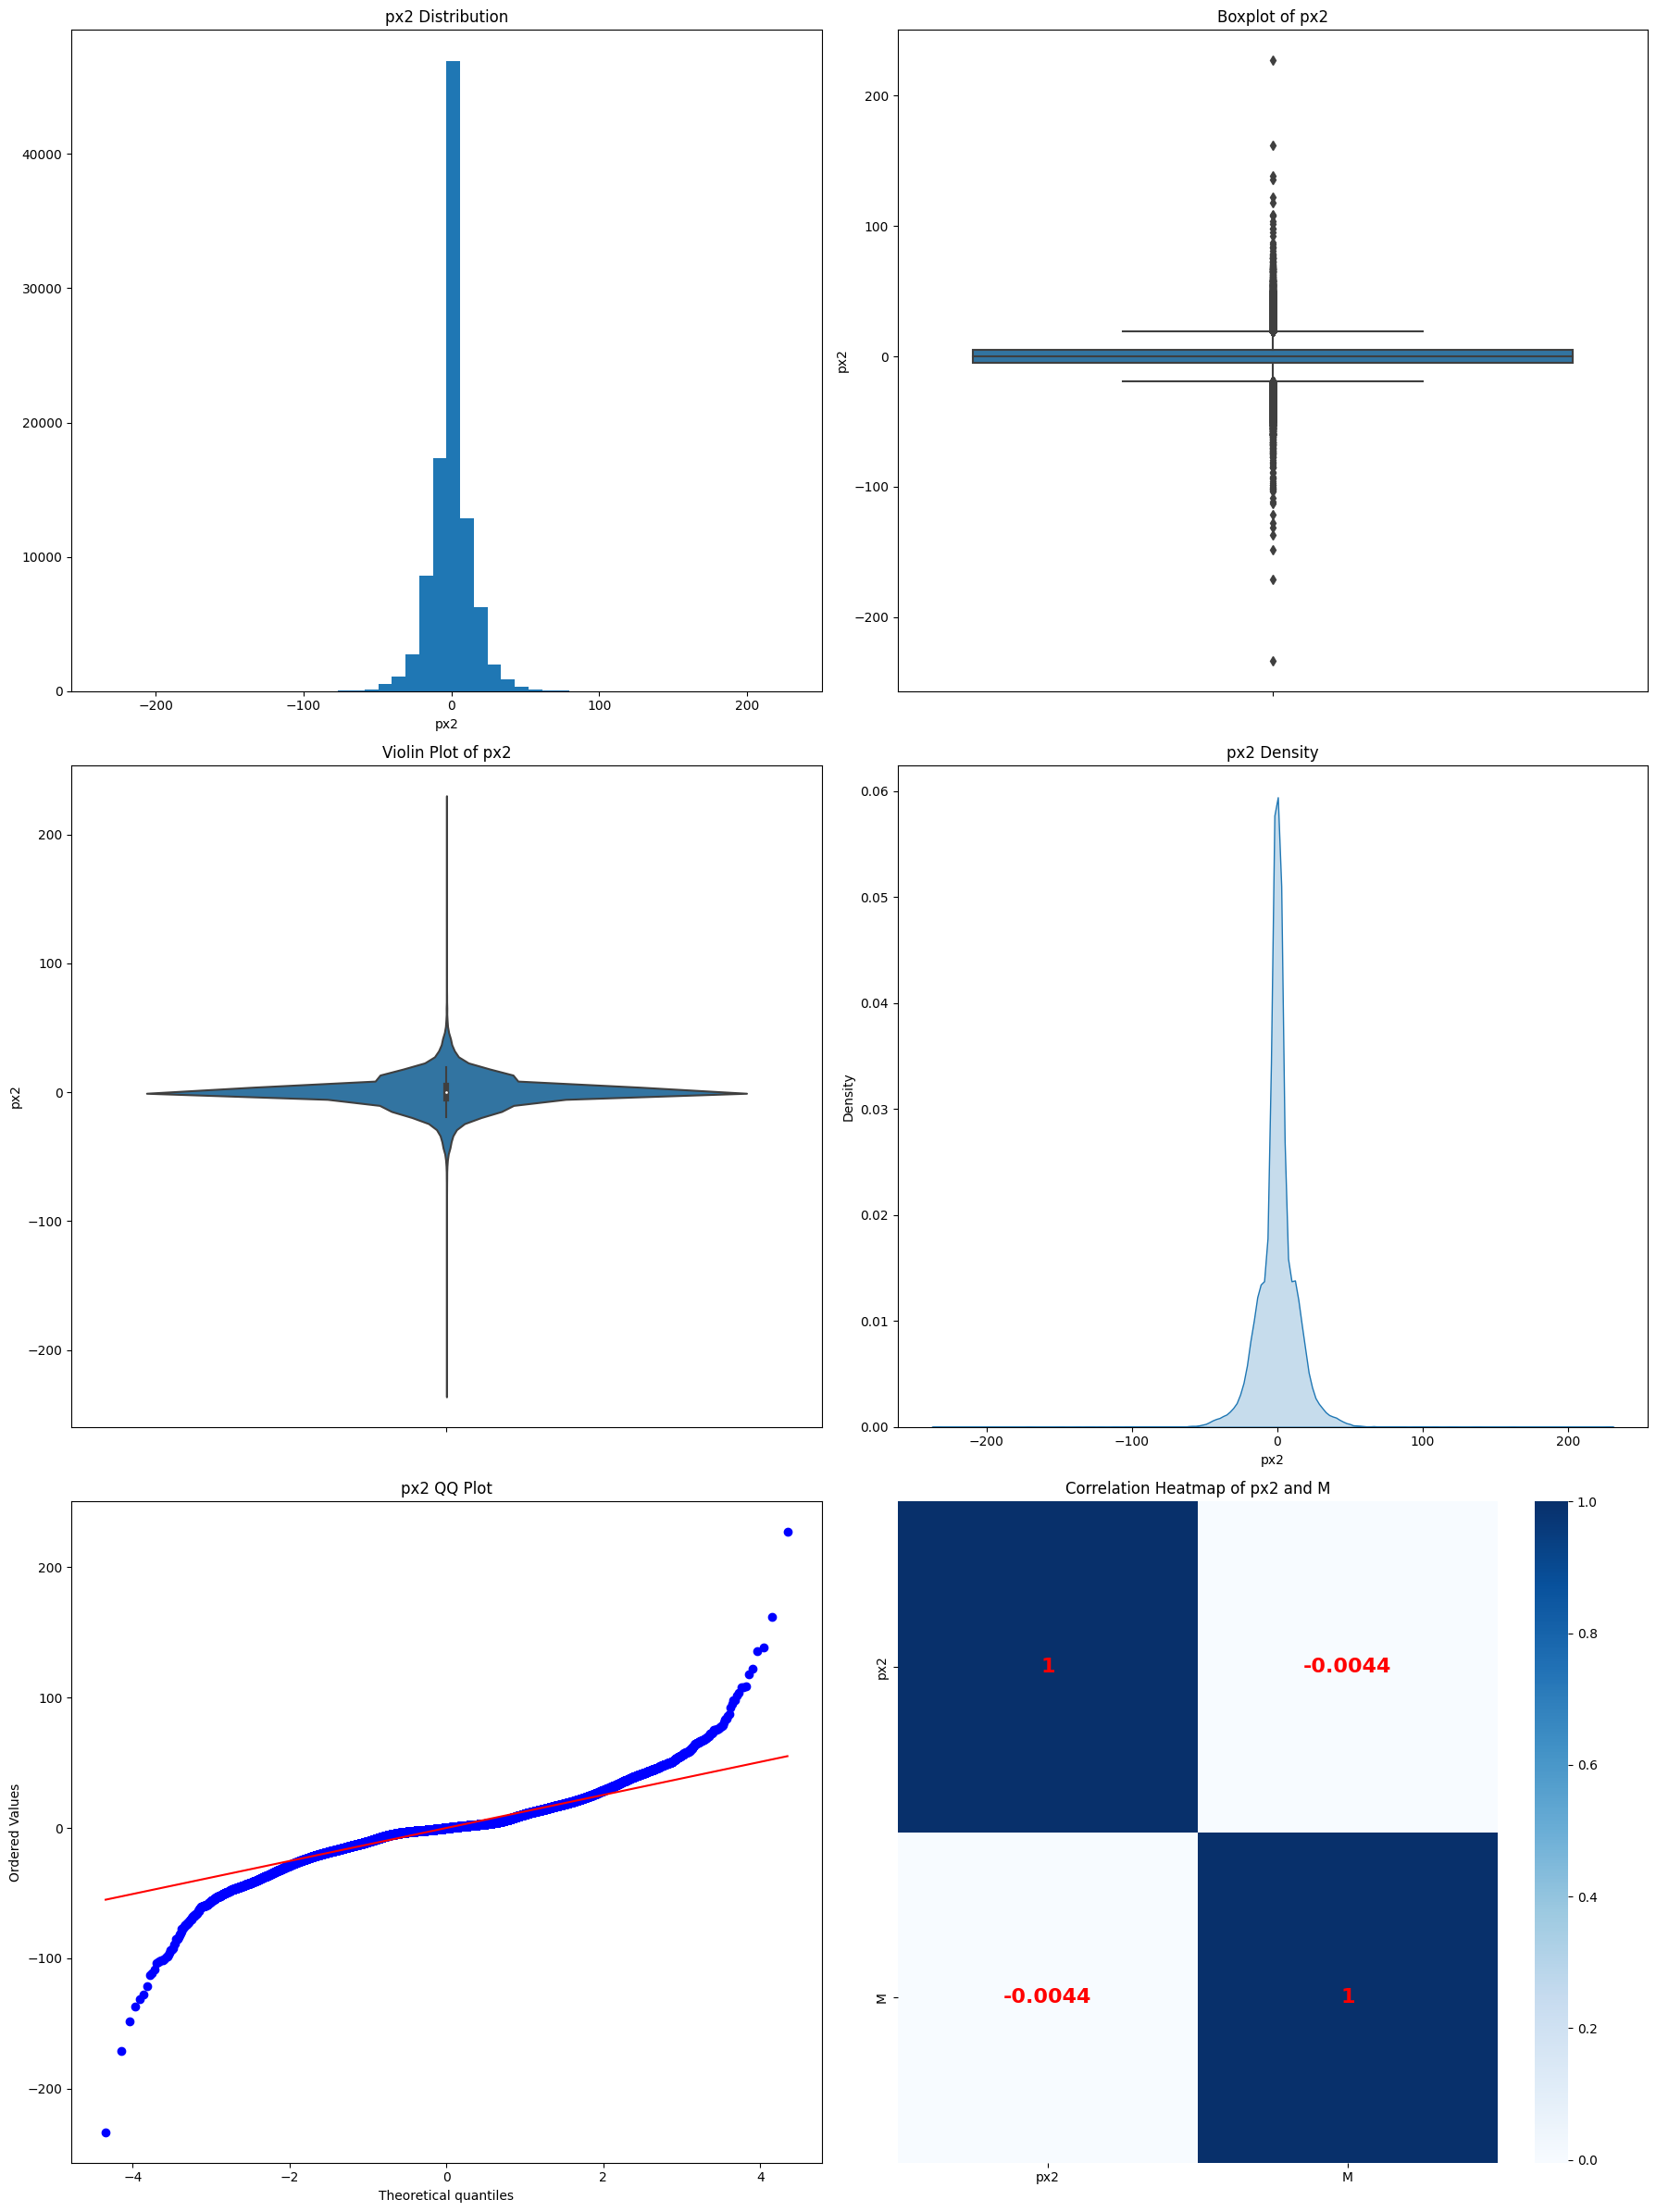

#####################################
count   100000.000
mean         0.125
std         13.169
min       -145.651
5%         -20.992
10%        -14.920
20%         -7.267
30%         -3.186
40%         -1.624
50%          0.084
60%          1.815
70%          3.524
80%          7.795
90%         15.298
95%         21.105
99%         37.261
max        166.283
Name: py2, dtype: float64
Skewness: -0.04
Kurtosis: 5.24


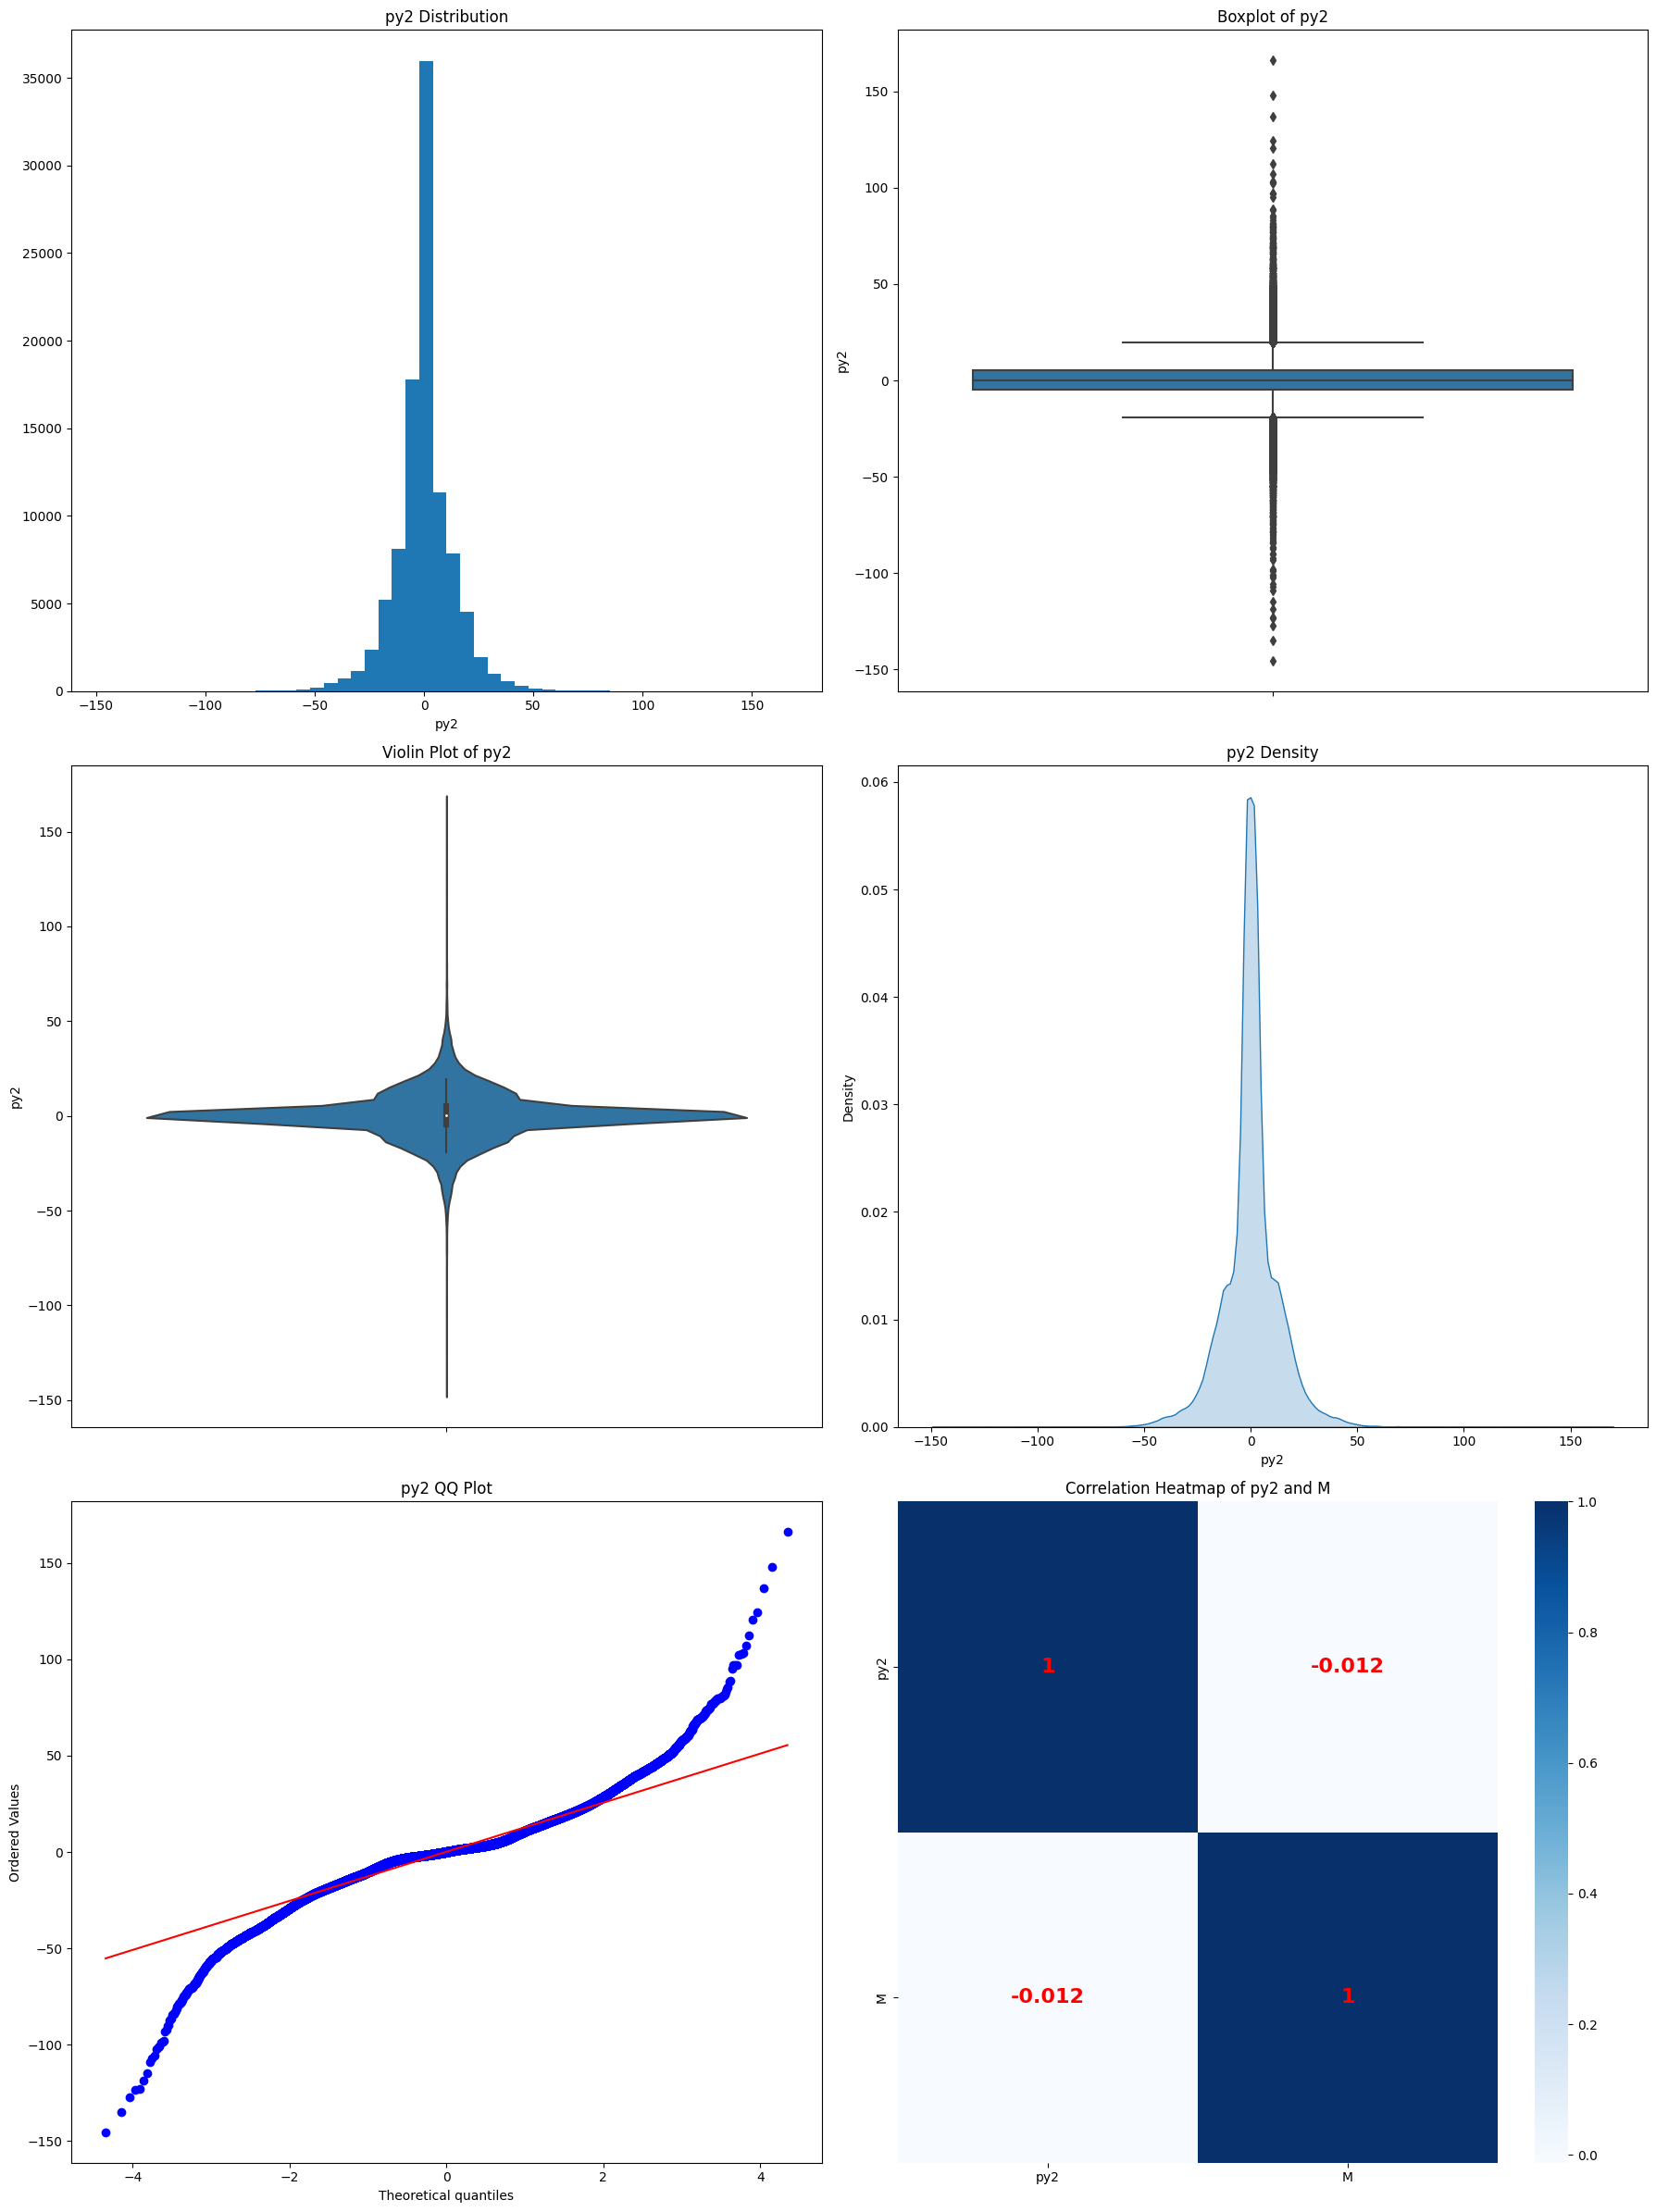

#####################################
count   100000.000
mean        -1.591
std         61.430
min       -655.396
5%        -103.693
10%        -75.573
20%        -33.154
30%        -15.460
40%         -7.476
50%         -0.690
60%          4.499
70%         13.007
80%         28.400
90%         71.882
95%         99.786
99%        167.939
max        935.558
Name: pz2, dtype: float64
Skewness: 0.07
Kurtosis: 5.29


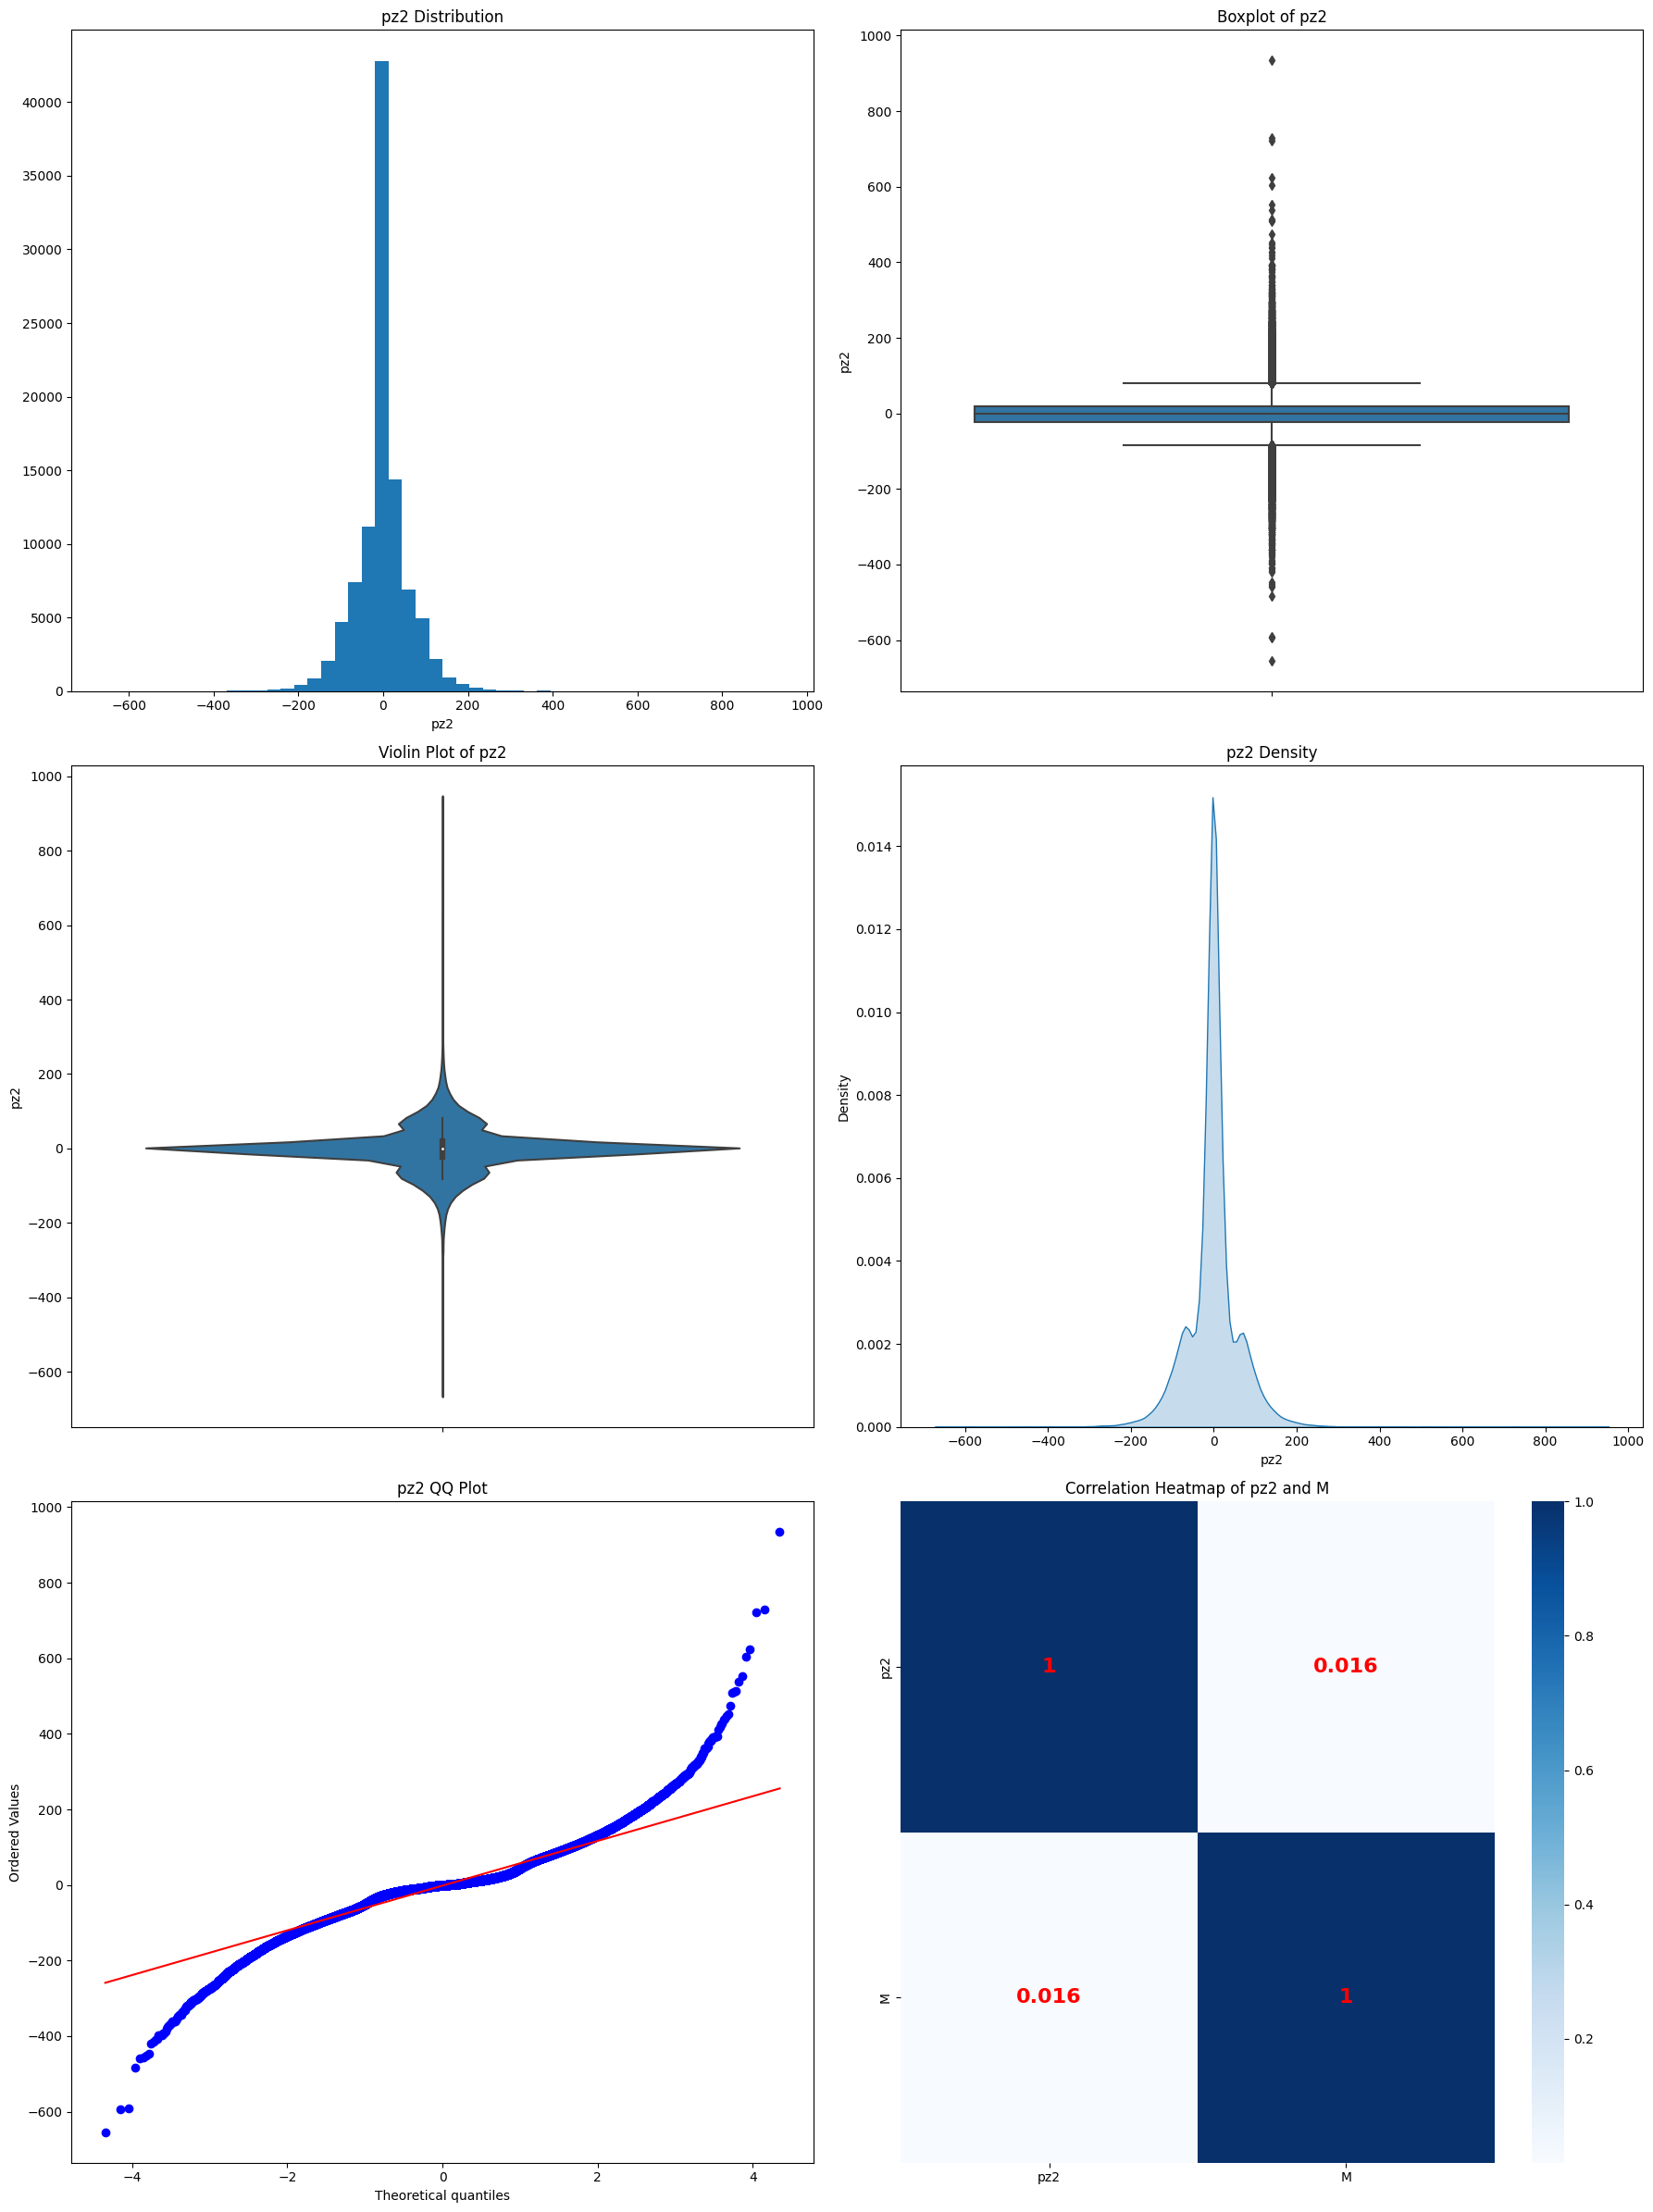

#####################################
count   100000.000
mean        13.802
std         12.461
min          0.027
5%           2.126
10%          2.488
20%          3.233
30%          4.346
40%          6.287
50%         11.691
60%         14.609
70%         18.005
80%         21.685
90%         29.352
95%         38.794
99%         53.013
max        281.654
Name: pt2, dtype: float64
Skewness: 1.99
Kurtosis: 9.96


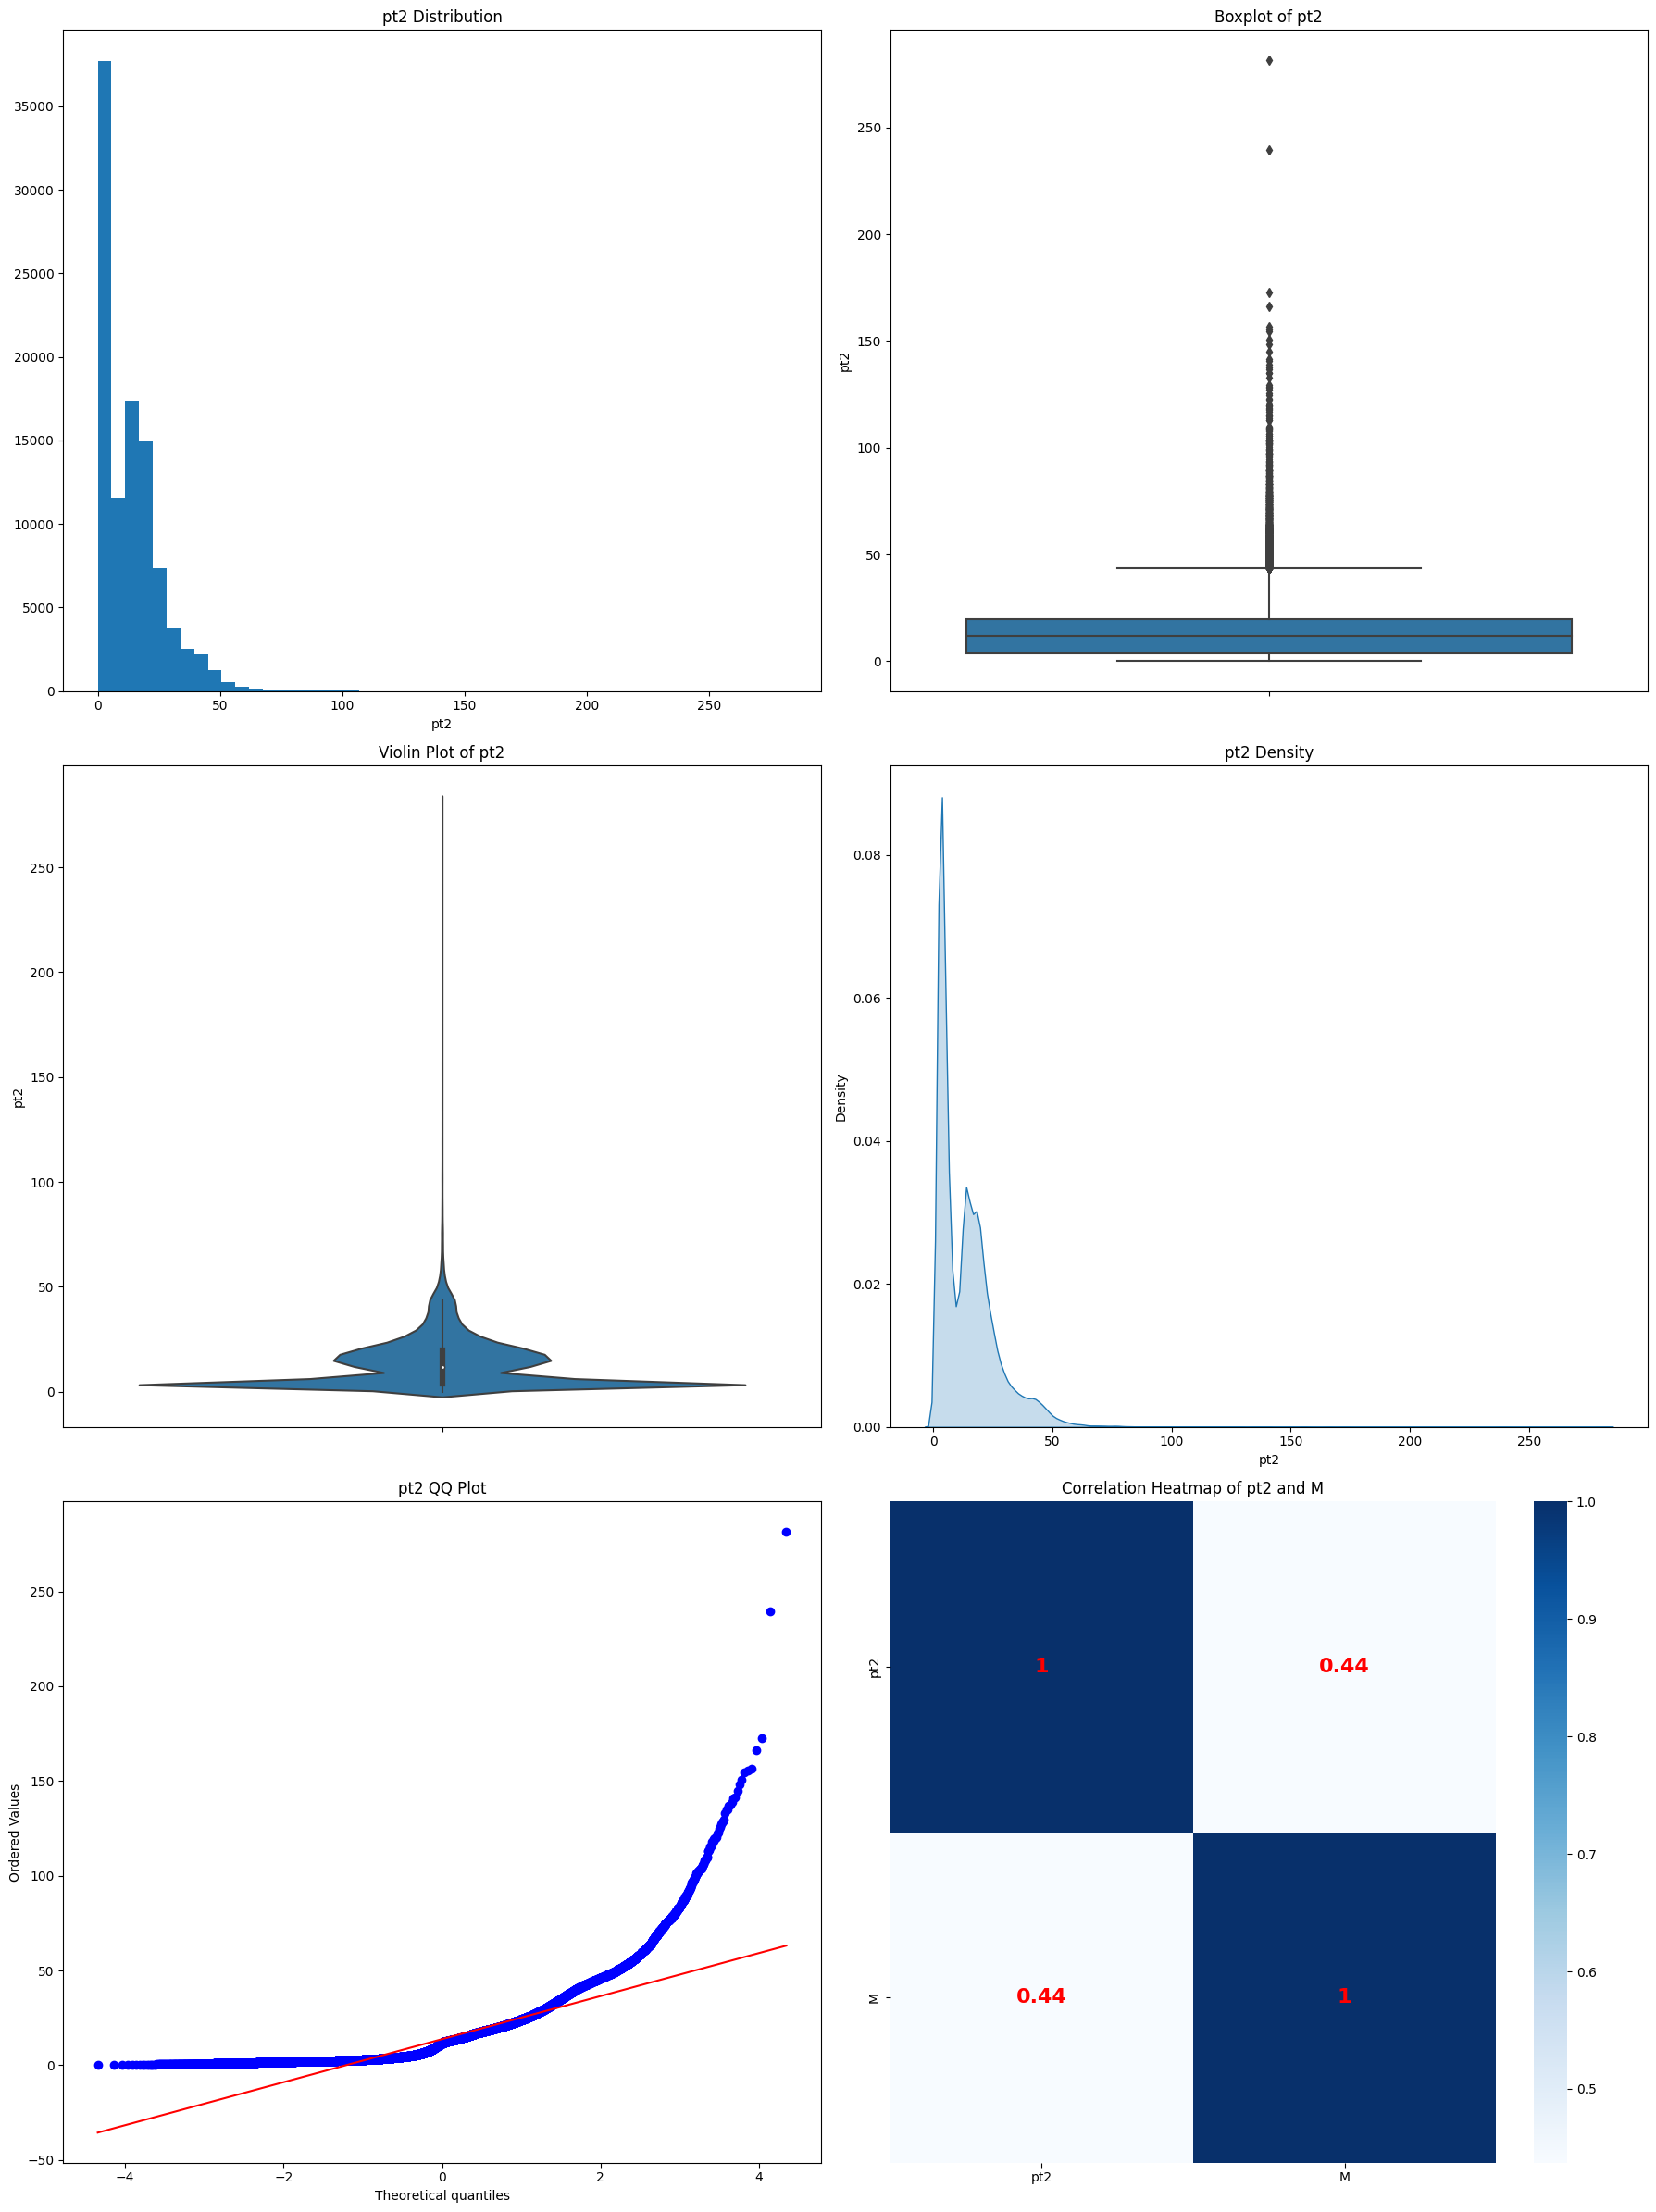

#####################################
count   100000.000
mean        -0.073
std          1.738
min         -7.065
5%          -2.379
10%         -2.264
20%         -2.037
30%         -1.677
40%         -0.925
50%         -0.136
60%          0.680
70%          1.412
80%          1.963
90%          2.224
95%          2.352
99%          2.467
max          3.061
Name: eta2, dtype: float64
Skewness: 0.05
Kurtosis: -1.55


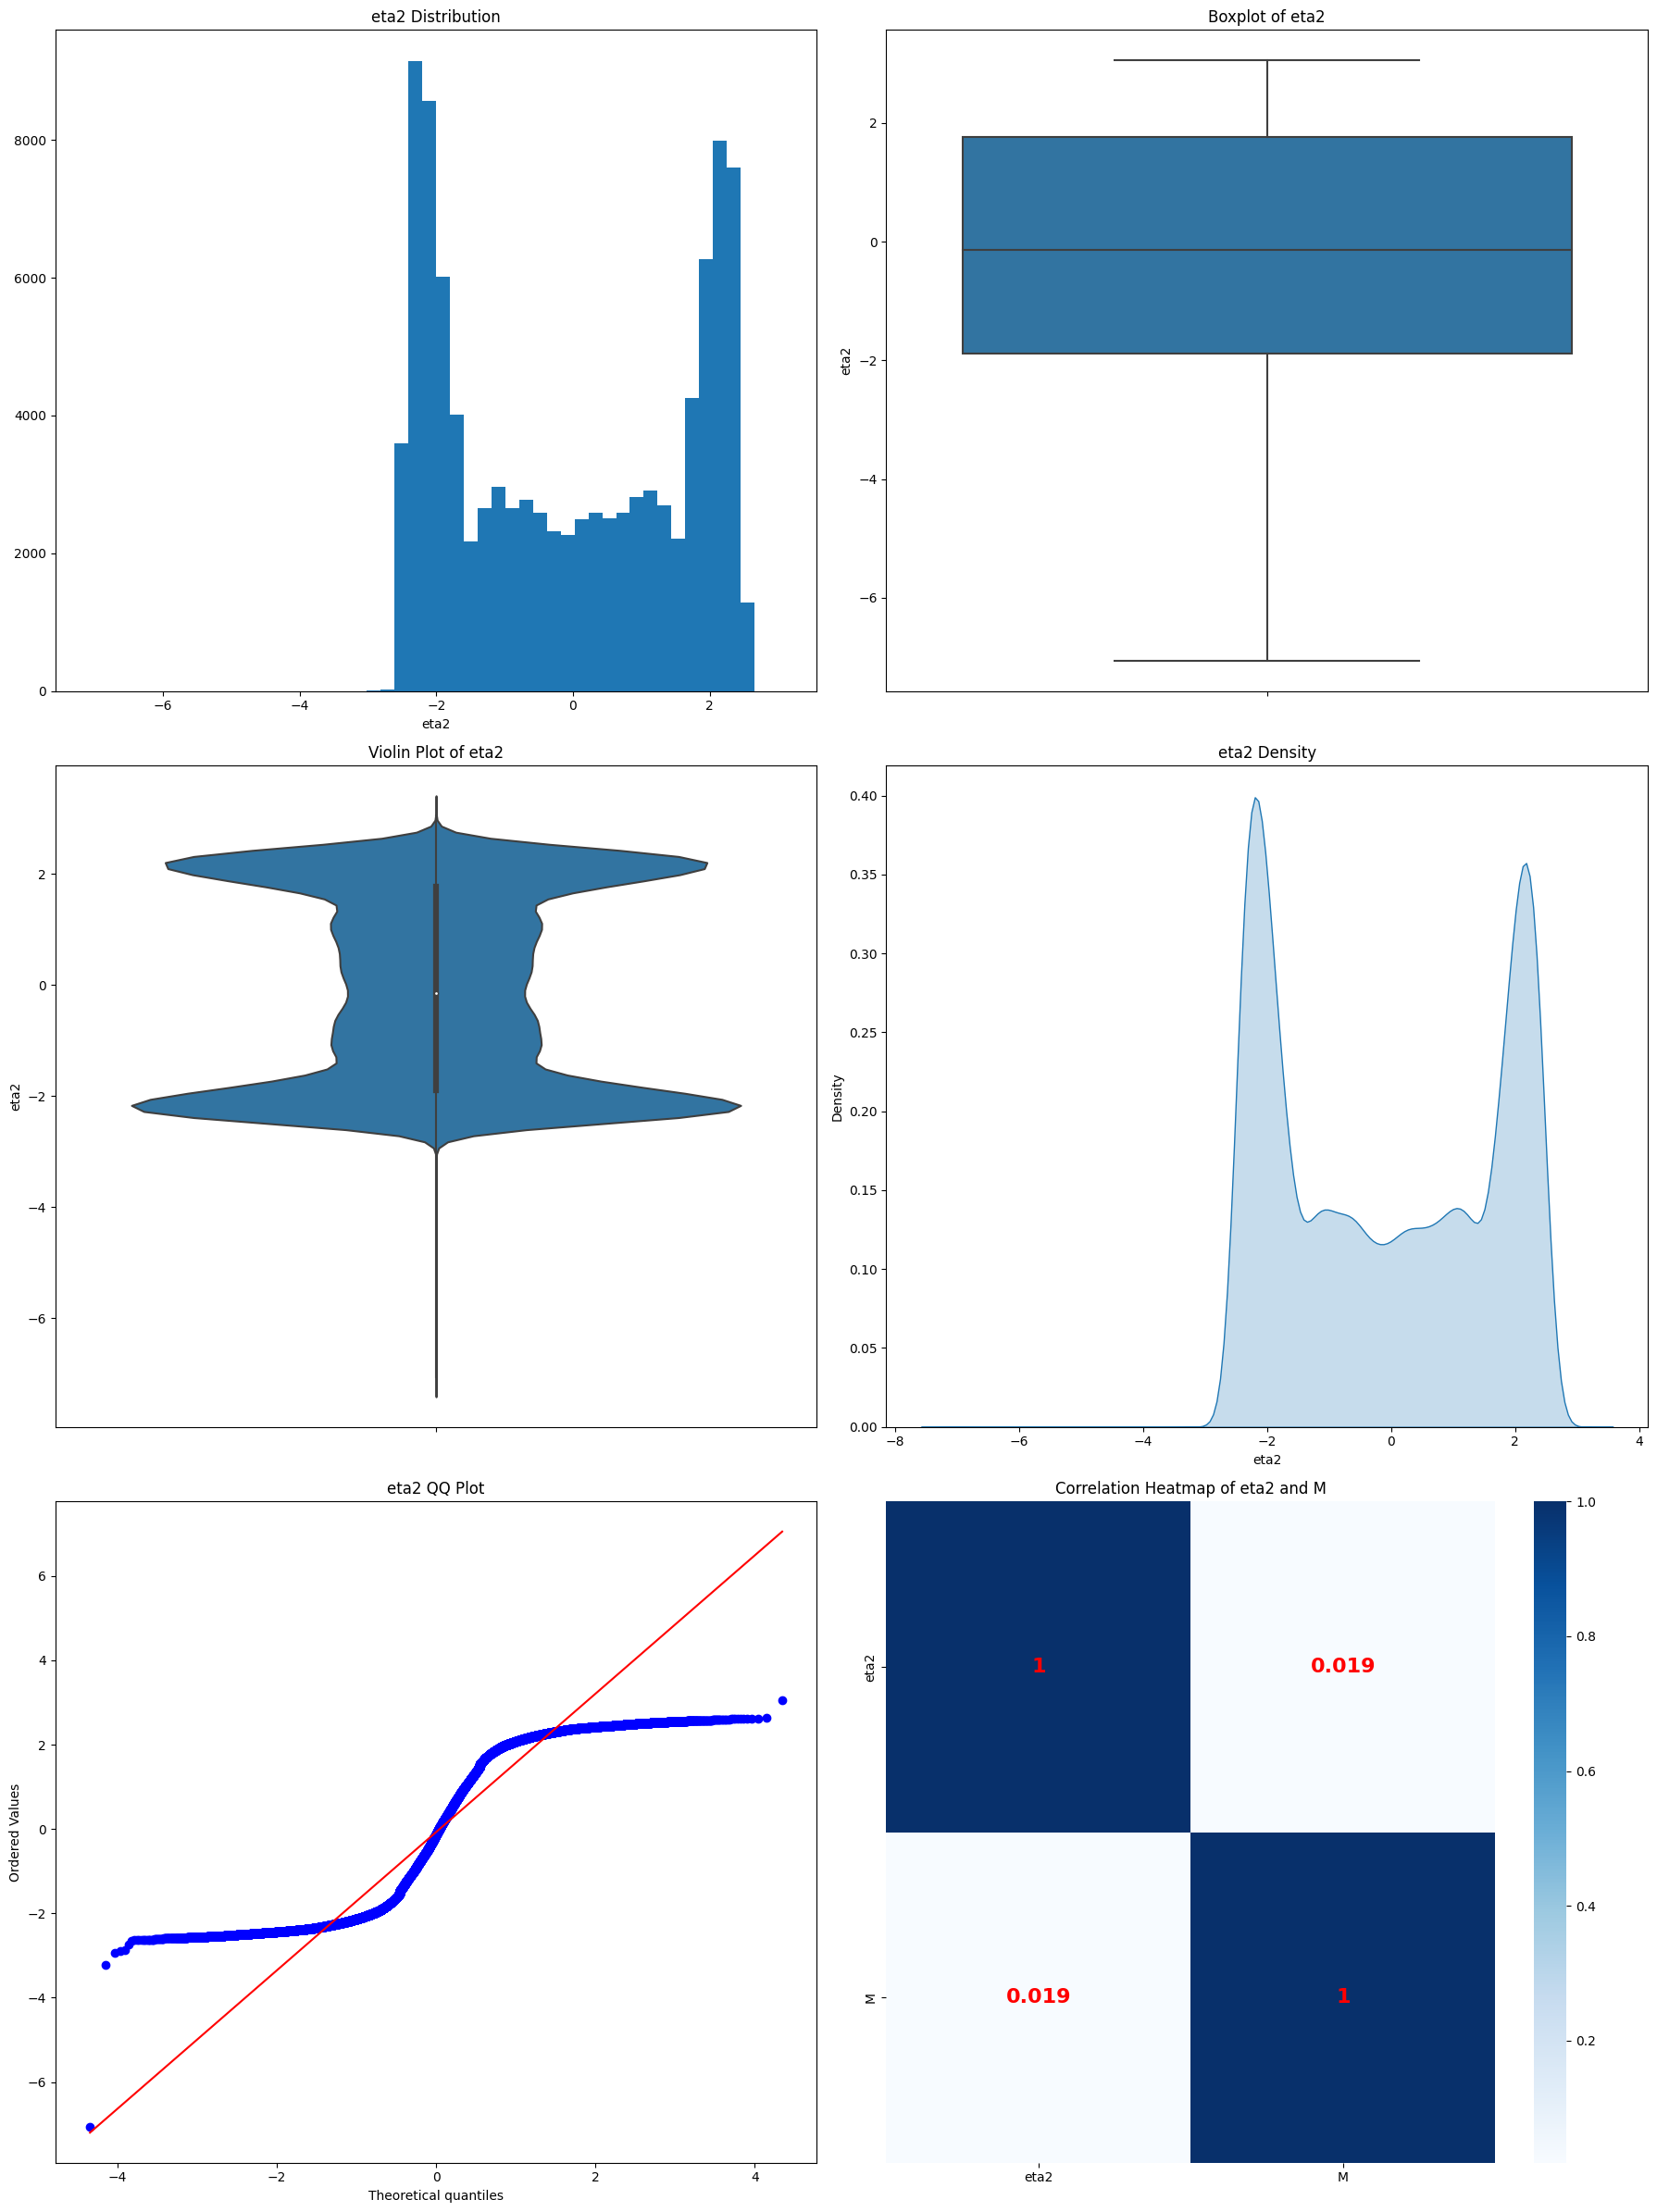

#####################################
count   100000.000
mean         0.021
std          1.817
min         -3.142
5%          -2.819
10%         -2.499
20%         -1.875
30%         -1.241
40%         -0.598
50%          0.027
60%          0.680
70%          1.306
80%          1.902
90%          2.521
95%          2.827
99%          3.076
max          3.141
Name: phi2, dtype: float64
Skewness: -0.02
Kurtosis: -1.21


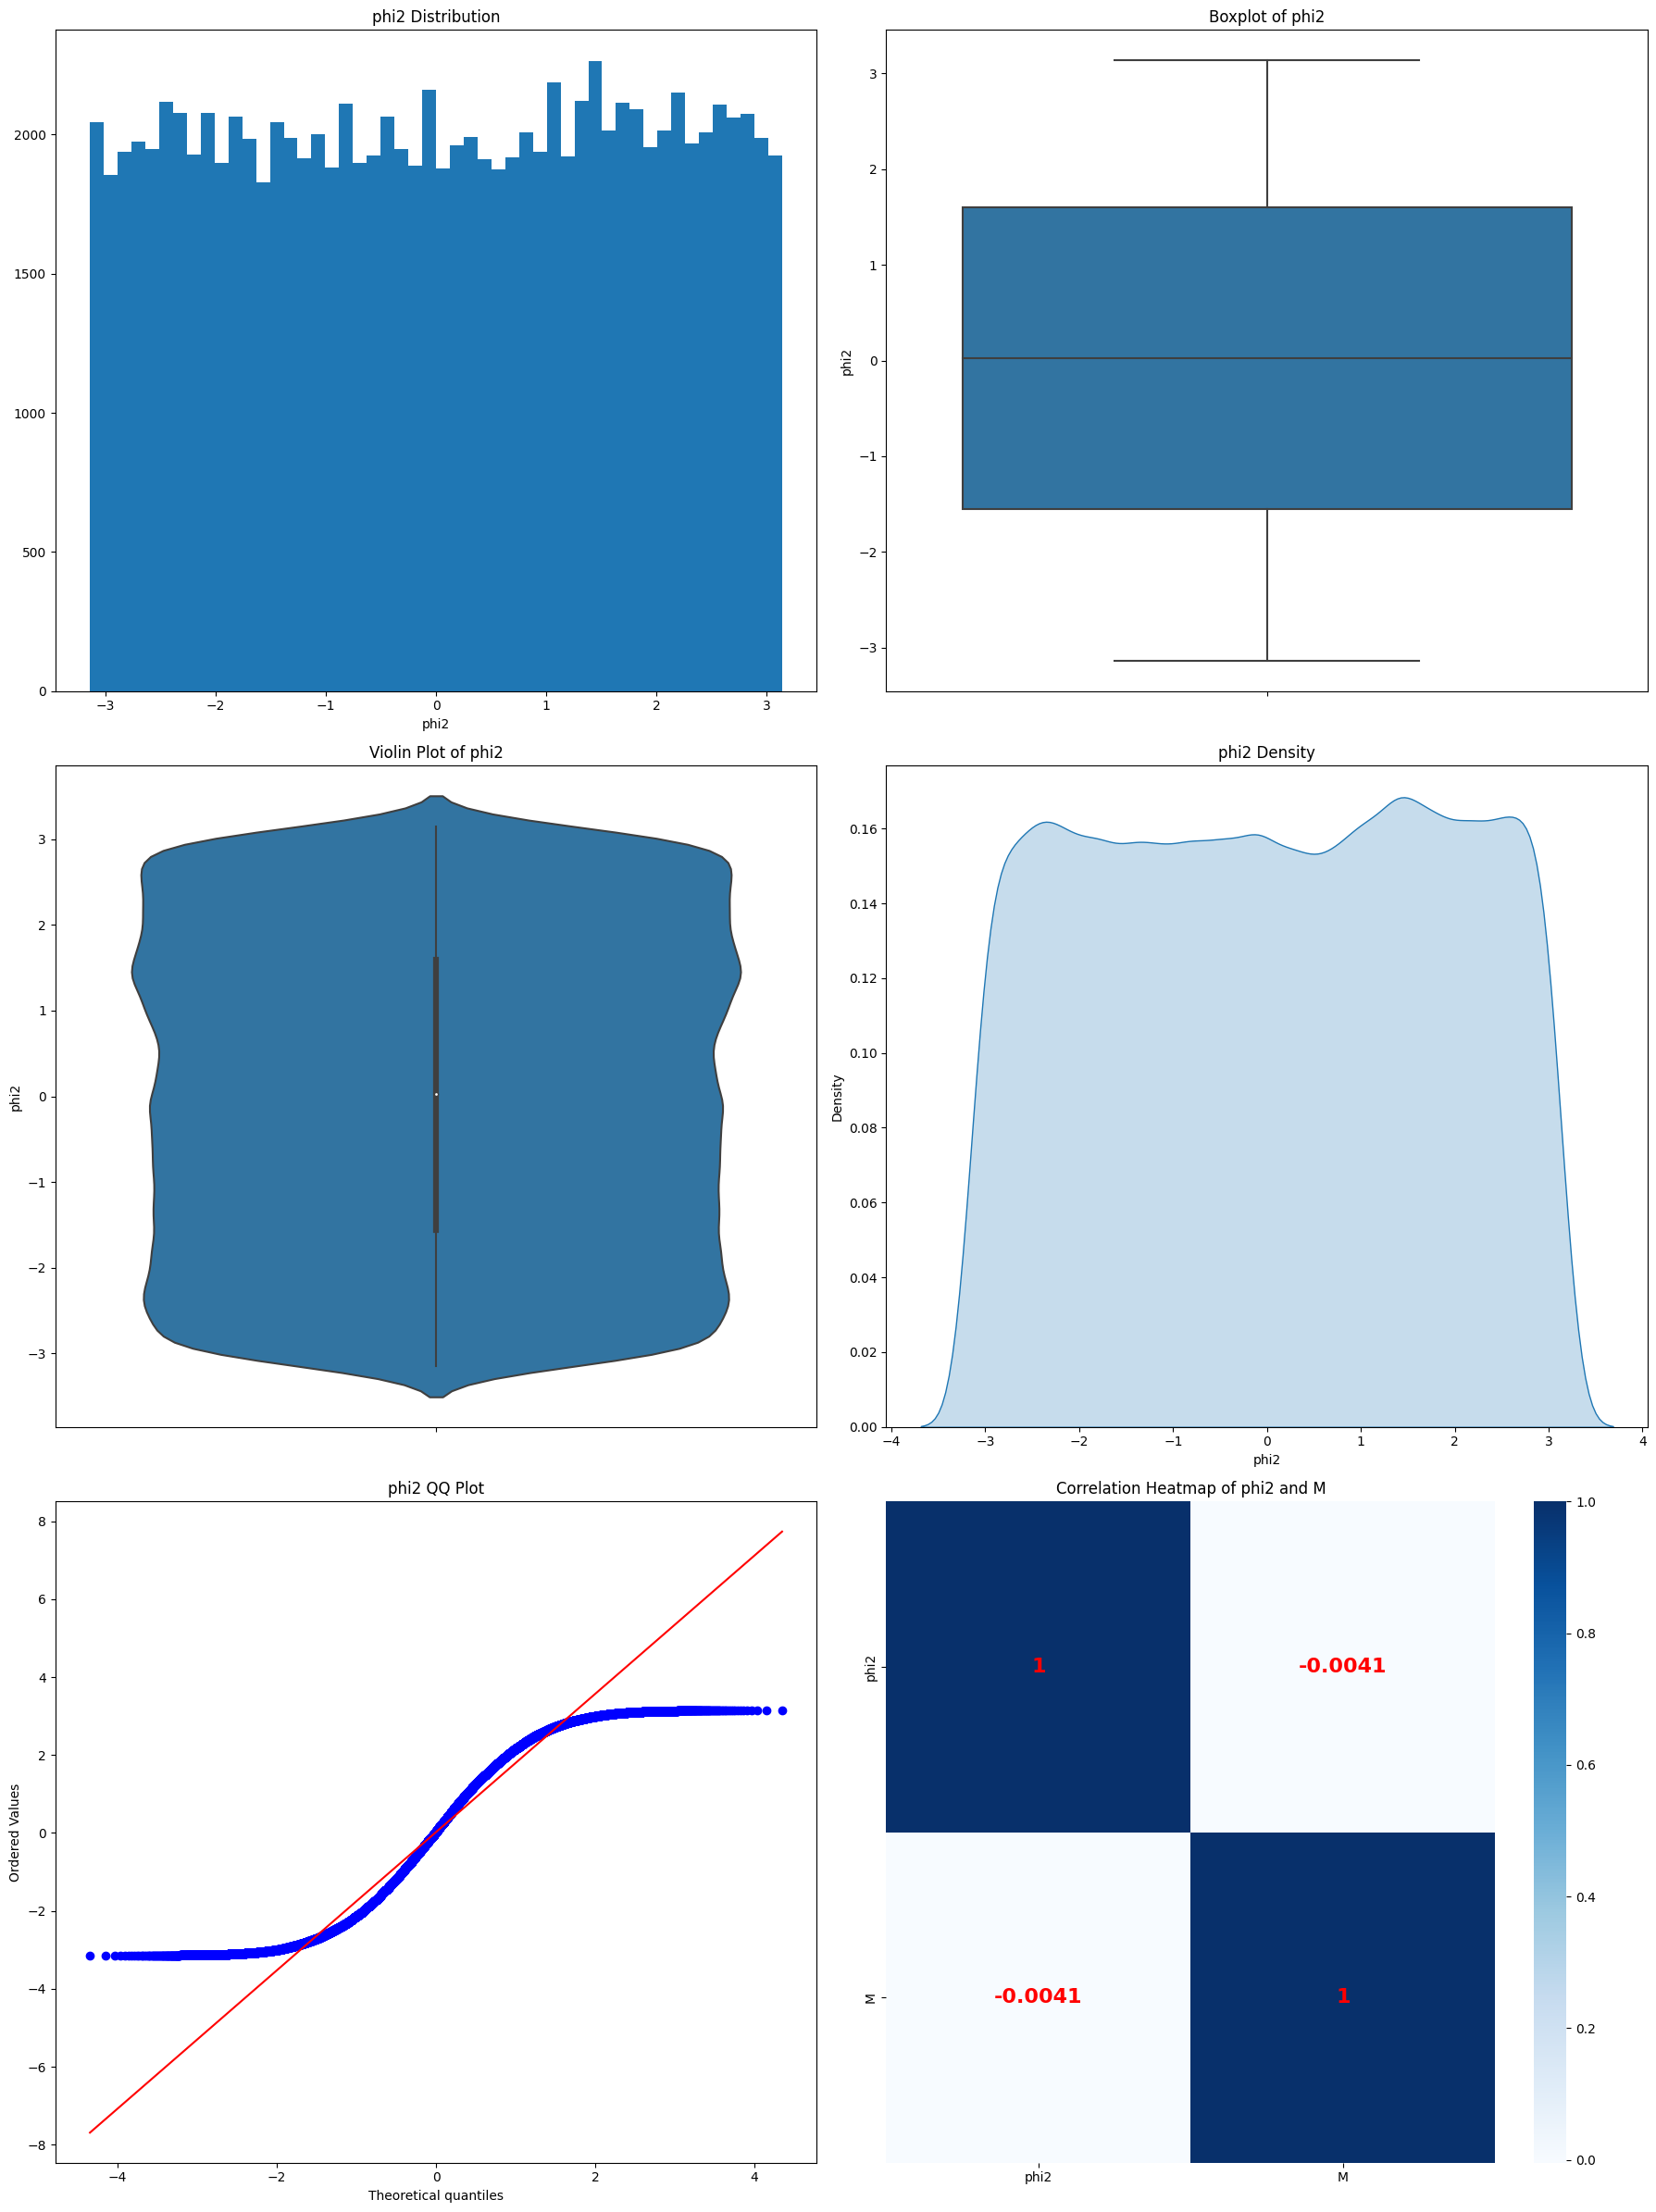

#####################################


In [11]:
def num_summary(dataframe, numerical_col, plot=False, target_col=None):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    desc = dataframe[numerical_col].describe(quantiles)
    skewness = dataframe[numerical_col].skew()
    kurtosis = dataframe[numerical_col].kurtosis()
    
    print(desc)
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")
    
    if plot:
        fig, axs = plt.subplots(3, 2, figsize=(18, 24))
        
        # Histogram
        axs[0, 0].hist(dataframe[numerical_col], bins=50)
        axs[0, 0].set_xlabel(numerical_col)
        axs[0, 0].set_title(numerical_col + ' Distribution')
        
        # Boxplot
        sns.boxplot(y=numerical_col, data=dataframe, ax=axs[0, 1])
        axs[0, 1].set_title("Boxplot of " + numerical_col)
        
        # Violin Plot
        sns.violinplot(y=numerical_col, data=dataframe, ax=axs[1, 0])
        axs[1, 0].set_title("Violin Plot of " + numerical_col)
        
        # Density Plot
        sns.kdeplot(dataframe[numerical_col], shade=True, ax=axs[1, 1])
        axs[1, 1].set_xlabel(numerical_col)
        axs[1, 1].set_title(numerical_col + ' Density')
        
        # QQ Plot
        stats.probplot(dataframe[numerical_col], dist="norm", plot=axs[2, 0])
        axs[2, 0].set_title(numerical_col + ' QQ Plot')
        
        # Correlation Heatmap
        corr = dataframe[[numerical_col, target_col]].corr()
        sns.heatmap(corr, annot=True, cmap='Blues', ax=axs[2, 1], annot_kws={"size": 16, "weight": "bold", "color":"red"})
        axs[2, 1].set_title(f'Correlation Heatmap of {numerical_col} and {target_col}')
        
        plt.tight_layout()
        plt.show()

    print("#####################################")


    
for col in num_cols[:-1]: 
        num_summary(df, col, plot=True, target_col="M")

In [12]:
df.head()

Run      Event     E1    px1      py1     pz1    pt1   eta1   phi1  Q1  \
0  147115  366639895 58.714  -7.311  10.531 -57.297 12.820 -2.203  2.178   1   
1  147115  366704169  6.612  -4.152  -0.580  -5.113  4.192 -1.028 -3.003  -1   
2  147115  367112316 25.542 -11.481   2.042  22.725 11.661  1.420  2.966   1   
3  147115  366952149 65.396   7.512  11.887  63.866 14.062  2.218  1.007   1   
4  147115  366523212 61.450   2.953 -14.623 -59.612 14.918 -2.094 -1.372  -1   

      E2     px2    py2     pz2    pt2   eta2   phi2  Q2      M  
0 11.284  -1.032 -1.881 -11.078  2.145 -2.344 -2.073  -1  8.948  
1 17.149 -11.713  5.045  11.465 12.754  0.808  2.735   1 15.893  
2 15.820  -1.473  2.259 -15.589  2.697 -2.455  2.149   1 38.388  
3 25.127   4.088  2.596  24.656  4.843  2.330  0.566  -1  3.729  
4 13.887  -0.278 -2.426 -13.671  2.441 -2.424 -1.685  -1  2.747

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#199"> FEATURE EXRACTION & CORRELATION </div>

In [13]:
df['p1'] = np.sqrt(df['px1 ']**2 + df['py1']**2 + df['pz1']**2)
df['p2'] = np.sqrt(df['px2']**2 + df['py2']**2 + df['pz2']**2)

df['y1'] = 0.5 * np.log((df['E1'] + df['pz1']) / (df['E1'] - df['pz1']))
df['y2'] = 0.5 * np.log((df['E2'] + df['pz2']) / (df['E2'] - df['pz2']))

df['ET1'] = df['E1'] * np.sinh(df['eta1'])
df['ET2'] = df['E2'] * np.sinh(df['eta2'])

df['delta_phi'] = df['phi2'] - df['phi1']
df['delta_eta'] = df['eta2'] - df['eta1']

df['PT'] = np.sqrt(df['pt1']**2 + df['pt2']**2)

# Electron mass in GeV
m_e = 0.511

df['p_inv1'] = np.sqrt(df['E1']**2 - m_e**2)
df['p_inv2'] = np.sqrt(df['E2']**2 - m_e**2)

In [14]:
df.head()

Run      Event     E1    px1      py1     pz1    pt1   eta1   phi1  Q1  \
0  147115  366639895 58.714  -7.311  10.531 -57.297 12.820 -2.203  2.178   1   
1  147115  366704169  6.612  -4.152  -0.580  -5.113  4.192 -1.028 -3.003  -1   
2  147115  367112316 25.542 -11.481   2.042  22.725 11.661  1.420  2.966   1   
3  147115  366952149 65.396   7.512  11.887  63.866 14.062  2.218  1.007   1   
4  147115  366523212 61.450   2.953 -14.623 -59.612 14.918 -2.094 -1.372  -1   

      E2     px2    py2     pz2    pt2   eta2   phi2  Q2      M     p1     p2  \
0 11.284  -1.032 -1.881 -11.078  2.145 -2.344 -2.073  -1  8.948 58.714 11.284   
1 17.149 -11.713  5.045  11.465 12.754  0.808  2.735   1 15.893  6.612 17.149   
2 15.820  -1.473  2.259 -15.589  2.697 -2.455  2.149   1 38.388 25.542 15.820   
3 25.127   4.088  2.596  24.656  4.843  2.330  0.566  -1  3.729 65.396 25.127   
4 13.887  -0.278 -2.426 -13.671  2.441 -2.424 -1.685  -1  2.747 61.450 13.887   

      y1     y2      ET1     ET2  delta_phi  delta_eta     PT  p_inv1  p_inv2  
0 -2.203 -2.344 -262.412 -58.264     -4.250     -0.141 12.998  58.712  11.272  
1 -1.028  0.808   -8.063  15.416      5.738      1.836 13.425   6.592  17.142  
2  1.420 -2.455   49.775 -91.453     -0.817     -3.876 11.969  25.537  15.812  
3  2.218  2.330  297.016 127.933     -0.441      0.112 14.872  65.394  25.122  
4 -2.094 -2.424 -245.558 -77.760     -0.313     -0.330 15.116  61.448  13.878

In [15]:
cat_cols

['Run', 'Q1', 'Q2']

In [16]:
df["Q1"] = df["Q1"].map({-1 : 0 , 1: 1})
df["Q2"] = df["Q2"].map({-1 : 0 , 1: 1})
df = pd.get_dummies(df, columns=['Run'], drop_first = True)


In [17]:
for col in df.select_dtypes(include=bool).columns:
    df[col] = df[col].astype(int)
df.head()

Event     E1    px1      py1     pz1    pt1   eta1   phi1  Q1     E2  \
0  366639895 58.714  -7.311  10.531 -57.297 12.820 -2.203  2.178   1 11.284   
1  366704169  6.612  -4.152  -0.580  -5.113  4.192 -1.028 -3.003   0 17.149   
2  367112316 25.542 -11.481   2.042  22.725 11.661  1.420  2.966   1 15.820   
3  366952149 65.396   7.512  11.887  63.866 14.062  2.218  1.007   1 25.127   
4  366523212 61.450   2.953 -14.623 -59.612 14.918 -2.094 -1.372   0 13.887   

      px2    py2     pz2    pt2   eta2   phi2  Q2      M     p1     p2     y1  \
0  -1.032 -1.881 -11.078  2.145 -2.344 -2.073   0  8.948 58.714 11.284 -2.203   
1 -11.713  5.045  11.465 12.754  0.808  2.735   1 15.893  6.612 17.149 -1.028   
2  -1.473  2.259 -15.589  2.697 -2.455  2.149   1 38.388 25.542 15.820  1.420   
3   4.088  2.596  24.656  4.843  2.330  0.566   0  3.729 65.396 25.127  2.218   
4  -0.278 -2.426 -13.671  2.441 -2.424 -1.685   0  2.747 61.450 13.887 -2.094   

      y2      ET1     ET2  delta_phi  delta_eta     PT  p_inv1  p_inv2  \
0 -2.344 -262.412 -58.264     -4.250     -0.141 12.998  58.712  11.272   
1  0.808   -8.063  15.416      5.738      1.836 13.425   6.592  17.142   
2 -2.455   49.775 -91.453     -0.817     -3.876 11.969  25.537  15.812   
3  2.330  297.016 127.933     -0.441      0.112 14.872  65.394  25.122   
4 -2.424 -245.558 -77.760     -0.313     -0.330 15.116  61.448  13.878   

   Run_146644  Run_146944  Run_147114  Run_147115  Run_147754  Run_147926  \
0           0           0           0           1           0           0   
1           0           0           0           1           0           0   
2           0           0           0           1           0           0   
3           0           0           0           1           0           0   
4           0           0           0           1           0           0   

   Run_147929  Run_148029  Run_148031  Run_149011  Run_149181  Run_149182  
0           0           0           0           0           0           0  
1           0           0           0           0           0           0  
2           0           0           0           0           0           0  
3           0           0           0           0           0           0  
4           0           0           0           0           0           0

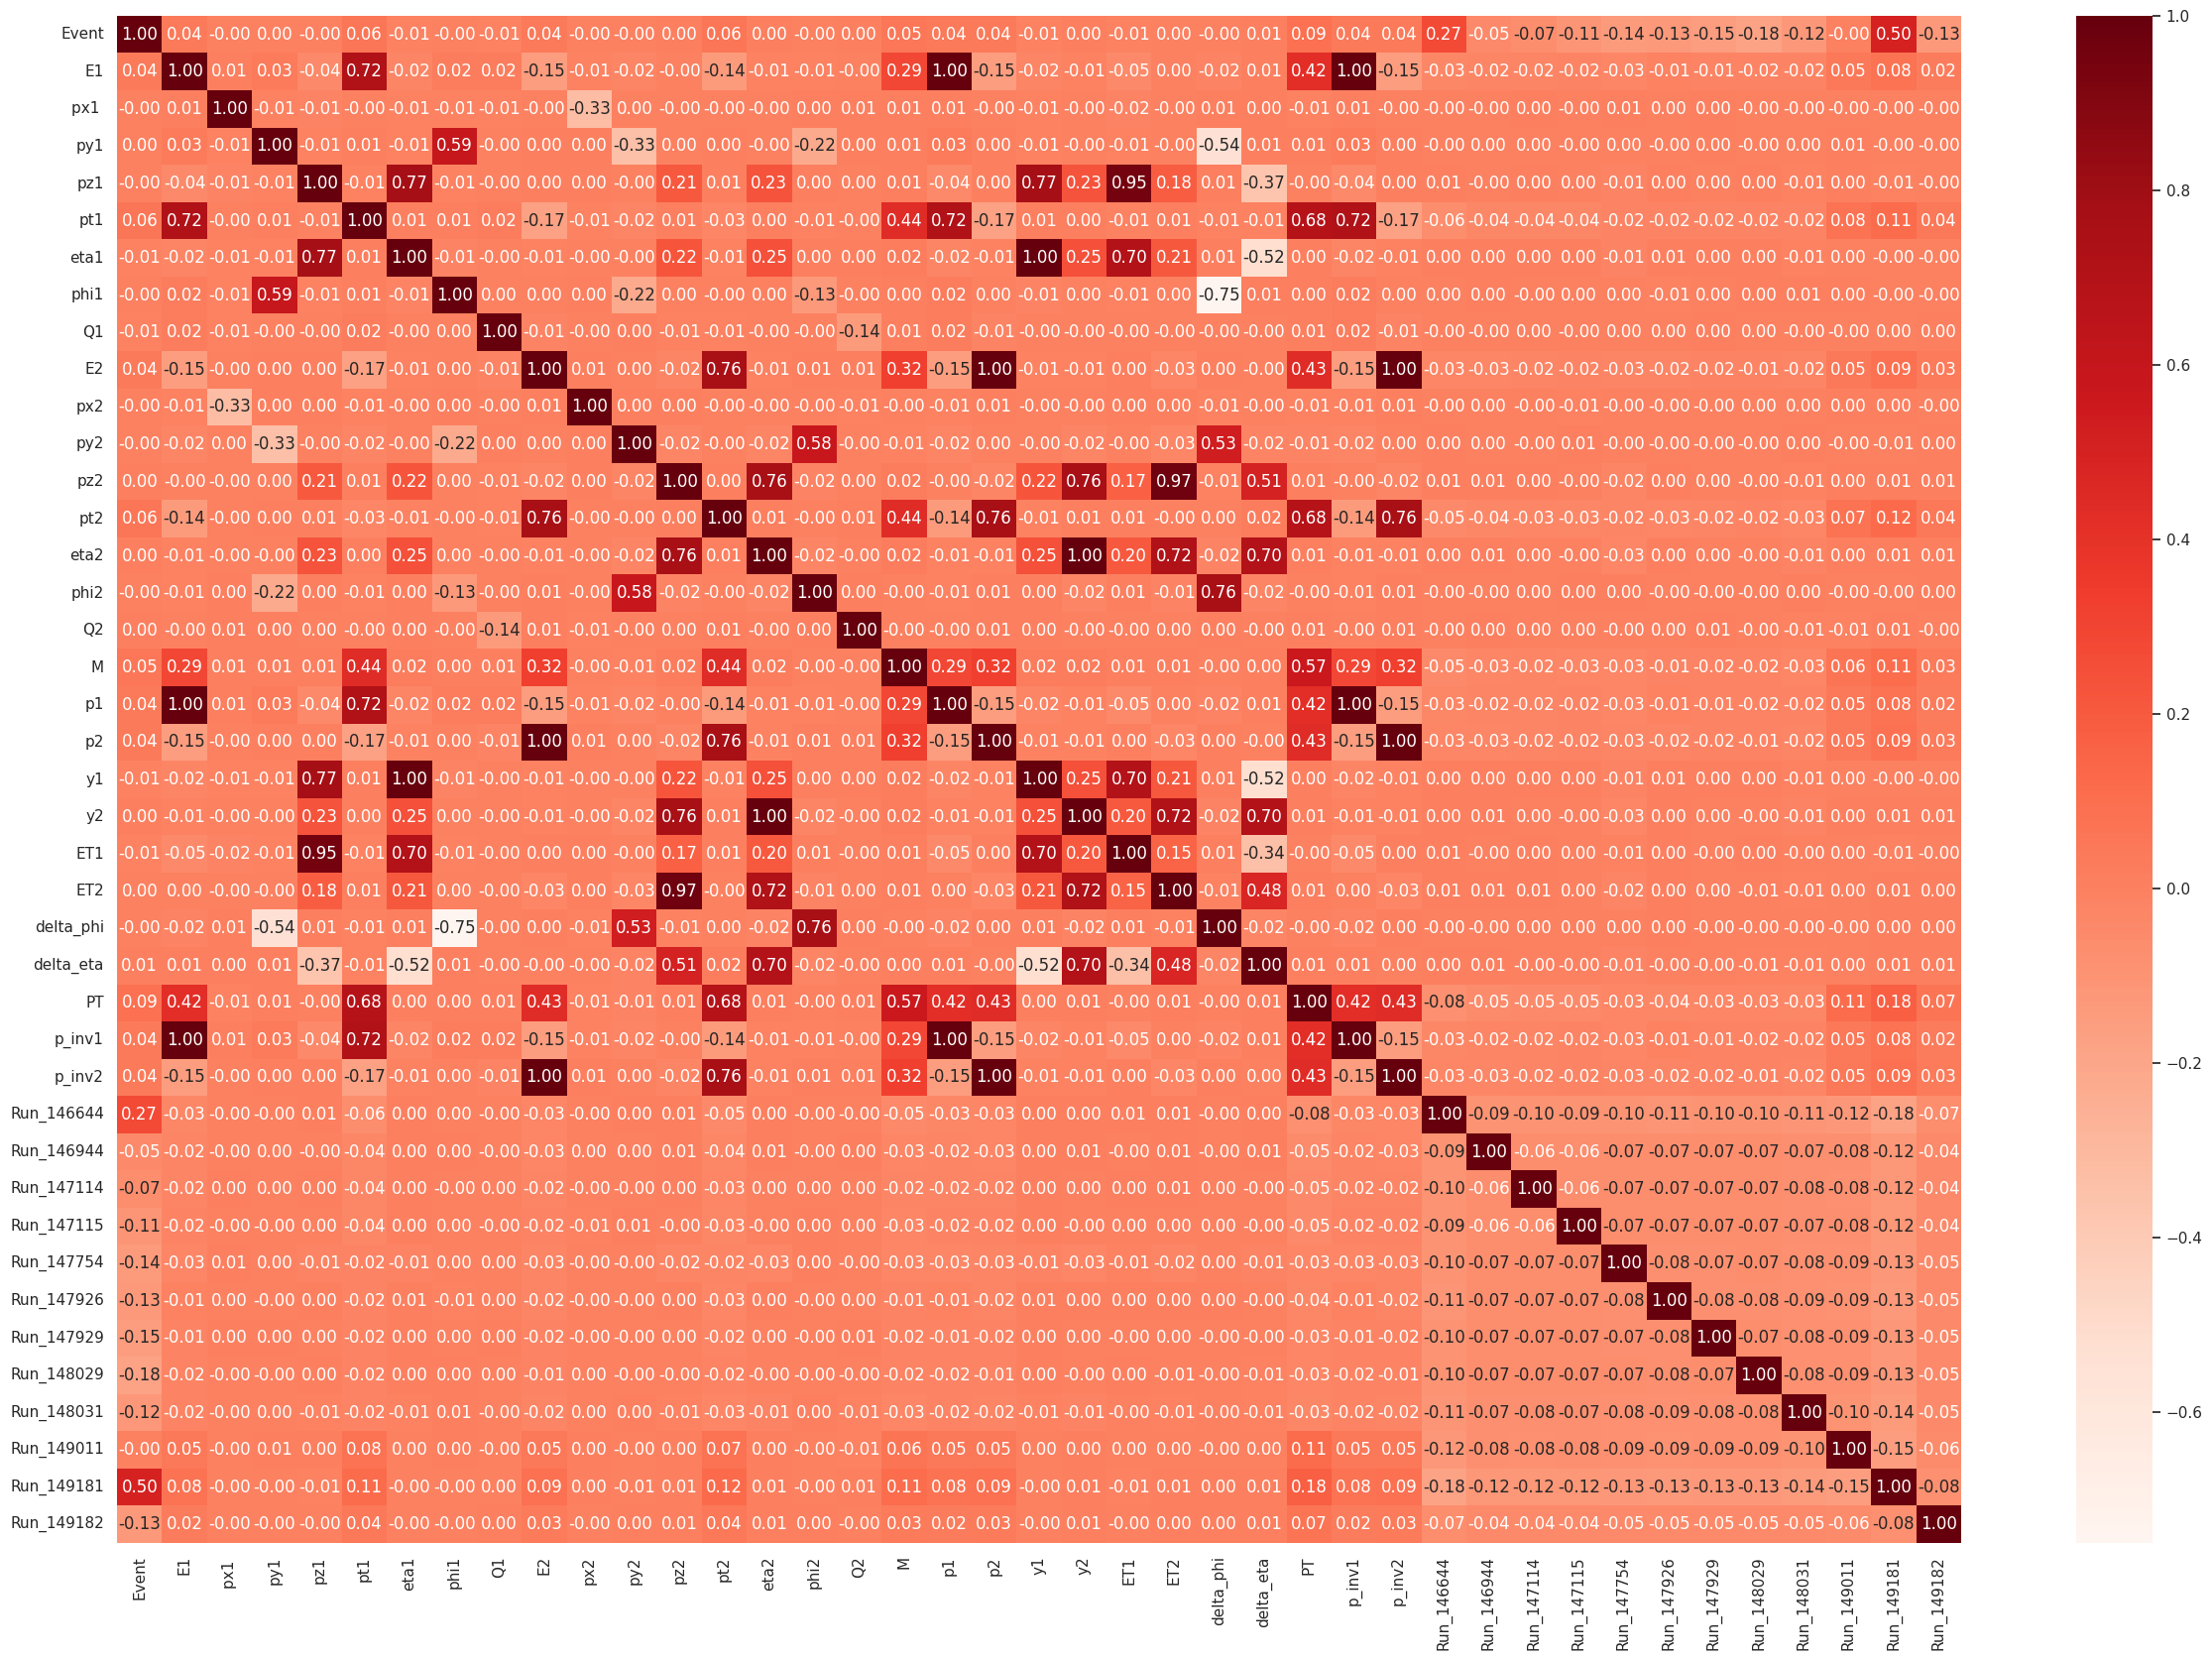

In [18]:
corr = df.corr()
sns.set(rc={'figure.figsize': (30, 20)})
sns.heatmap(corr, cmap="Reds", annot=True, fmt=".2f")
plt.show()

In [19]:
df.dropna(inplace=True)

In [20]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 99912
Variables: 41
cat_cols: 14
num_cols: 27
cat_but_car: 0
num_but_cat: 14


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#199"> HANDLINGS WITH OUTLIERS </div>

In [21]:
def outlier_thresholds(dataframe, col_name, q1=0.02, q3=0.98):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [22]:
for col in df.columns:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

Event False
E1 True
px1  True
py1 True
pz1 True
pt1 True
eta1 False
phi1 False
Q1 False
E2 True
px2 True
py2 True
pz2 True
pt2 True
eta2 False
phi2 False
Q2 False
M False
p1 True
p2 True
y1 False
y2 False
ET1 True
ET2 True
delta_phi False
delta_eta False
PT True
p_inv1 True
p_inv2 True
Run_146644 False
Run_146944 False
Run_147114 False
Run_147115 False
Run_147754 False
Run_147926 False
Run_147929 False
Run_148029 False
Run_148031 False
Run_149011 False
Run_149181 False
Run_149182 False


In [23]:
for col in df.columns:
    print(col, check_outlier(df, col))

Event False
E1 False
px1  False
py1 False
pz1 False
pt1 False
eta1 False
phi1 False
Q1 False
E2 False
px2 False
py2 False
pz2 False
pt2 False
eta2 False
phi2 False
Q2 False
M False
p1 False
p2 False
y1 False
y2 False
ET1 False
ET2 False
delta_phi False
delta_eta False
PT False
p_inv1 False
p_inv2 False
Run_146644 False
Run_146944 False
Run_147114 False
Run_147115 False
Run_147754 False
Run_147926 False
Run_147929 False
Run_148029 False
Run_148031 False
Run_149011 False
Run_149181 False
Run_149182 False


In [24]:
df.columns = [col.upper() for col in df.columns]

df.head()

EVENT     E1    PX1      PY1     PZ1    PT1   ETA1   PHI1  Q1     E2  \
0  366639895 58.714  -7.311  10.531 -57.297 12.820 -2.203  2.178   1 11.284   
1  366704169  6.612  -4.152  -0.580  -5.113  4.192 -1.028 -3.003   0 17.149   
2  367112316 25.542 -11.481   2.042  22.725 11.661  1.420  2.966   1 15.820   
3  366952149 65.396   7.512  11.887  63.866 14.062  2.218  1.007   1 25.127   
4  366523212 61.450   2.953 -14.623 -59.612 14.918 -2.094 -1.372   0 13.887   

      PX2    PY2     PZ2    PT2   ETA2   PHI2  Q2      M     P1     P2     Y1  \
0  -1.032 -1.881 -11.078  2.145 -2.344 -2.073   0  8.948 58.714 11.284 -2.203   
1 -11.713  5.045  11.465 12.754  0.808  2.735   1 15.893  6.612 17.149 -1.028   
2  -1.473  2.259 -15.589  2.697 -2.455  2.149   1 38.388 25.542 15.820  1.420   
3   4.088  2.596  24.656  4.843  2.330  0.566   0  3.729 65.396 25.127  2.218   
4  -0.278 -2.426 -13.671  2.441 -2.424 -1.685   0  2.747 61.450 13.887 -2.094   

      Y2      ET1     ET2  DELTA_PHI  DELTA_ETA     PT  P_INV1  P_INV2  \
0 -2.344 -262.412 -58.264     -4.250     -0.141 12.998  58.712  11.272   
1  0.808   -8.063  15.416      5.738      1.836 13.425   6.592  17.142   
2 -2.455   49.775 -91.453     -0.817     -3.876 11.969  25.537  15.812   
3  2.330  297.016 127.933     -0.441      0.112 14.872  65.394  25.122   
4 -2.424 -245.558 -77.760     -0.313     -0.330 15.116  61.448  13.878   

   RUN_146644  RUN_146944  RUN_147114  RUN_147115  RUN_147754  RUN_147926  \
0           0           0           0           1           0           0   
1           0           0           0           1           0           0   
2           0           0           0           1           0           0   
3           0           0           0           1           0           0   
4           0           0           0           1           0           0   

   RUN_147929  RUN_148029  RUN_148031  RUN_149011  RUN_149181  RUN_149182  
0           0           0           0           0           0           0  
1           0           0           0           0           0           0  
2           0           0           0           0           0           0  
3           0           0           0           0           0           0  
4           0           0           0           0           0           0

In [25]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 99912
Variables: 41
cat_cols: 14
num_cols: 27
cat_but_car: 0
num_but_cat: 14


In [26]:
df.EVENT = df.EVENT.astype("float64")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99912 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EVENT       99912 non-null  float64
 1   E1          99912 non-null  float64
 2   PX1         99912 non-null  float64
 3   PY1         99912 non-null  float64
 4   PZ1         99912 non-null  float64
 5   PT1         99912 non-null  float64
 6   ETA1        99912 non-null  float64
 7   PHI1        99912 non-null  float64
 8   Q1          99912 non-null  int64  
 9   E2          99912 non-null  float64
 10  PX2         99912 non-null  float64
 11  PY2         99912 non-null  float64
 12  PZ2         99912 non-null  float64
 13  PT2         99912 non-null  float64
 14  ETA2        99912 non-null  float64
 15  PHI2        99912 non-null  float64
 16  Q2          99912 non-null  int64  
 17  M           99912 non-null  float64
 18  P1          99912 non-null  float64
 19  P2          99912 non-null  fl

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#199"> SCALING </div>

In [28]:
y = df["M"]
X = df.drop("M", axis=1)

In [29]:
scaler = RobustScaler()
numerical_cols = X.select_dtypes(include=['float64']).columns
for col in numerical_cols:
    X[col] = scaler.fit_transform(X[[col]])

In [30]:
X.head()

EVENT     E1   PX1     PY1    PZ1    PT1   ETA1   PHI1  Q1     E2    PX2  \
0 -0.055  0.889 -0.680  0.954 -1.956 -0.009 -0.881  0.694   1 -0.251 -0.104   
1 -0.055 -0.364 -0.392 -0.062 -0.165 -0.540 -0.398 -0.983   0 -0.146 -1.215   
2 -0.054  0.091 -1.061  0.178  0.791 -0.081  0.610  0.949   1 -0.169 -0.149   
3 -0.054  1.050  0.673  1.078  2.203  0.067  0.938  0.315   1 -0.003  0.429   
4 -0.055  0.955  0.257 -1.347 -2.035  0.120 -0.836 -0.455   0 -0.204 -0.025   

     PY2    PZ2    PT2   ETA2   PHI2  Q2     P1     P2     Y1     Y2    ET1  \
0 -0.203 -0.253 -0.602 -0.603 -0.666   0  0.889 -0.251 -0.881 -0.603 -4.267   
1  0.513  0.296  0.067  0.258  0.859   1 -0.364 -0.146 -0.398  0.258 -0.126   
2  0.225 -0.362 -0.567 -0.633  0.673   1  0.091 -0.169  0.610 -0.633  0.815   
3  0.260  0.617 -0.432  0.674  0.171   0  1.050 -0.003  0.938  0.674  4.841   
4 -0.260 -0.316 -0.583 -0.624 -0.543   0  0.955 -0.204 -0.836 -0.624 -3.993   

     ET2  DELTA_PHI  DELTA_ETA     PT  P_INV1  P_INV2  RUN_146644  RUN_146944  \
0 -0.459     -0.802     -0.056 -0.625   0.889  -0.251           0           0   
1  0.129      1.086      0.775 -0.584  -0.364  -0.146           0           0   
2 -0.724     -0.153     -1.626 -0.722   0.091  -0.169           0           0   
3  1.027     -0.082      0.050 -0.447   1.049  -0.003           0           0   
4 -0.615     -0.057     -0.135 -0.424   0.955  -0.204           0           0   

   RUN_147114  RUN_147115  RUN_147754  RUN_147926  RUN_147929  RUN_148029  \
0           0           1           0           0           0           0   
1           0           1           0           0           0           0   
2           0           1           0           0           0           0   
3           0           1           0           0           0           0   
4           0           1           0           0           0           0   

   RUN_148031  RUN_149011  RUN_149181  RUN_149182  
0           0           0           0           0  
1           0           0           0           0  
2           0           0           0           0  
3           0           0           0           0  
4           0           0           0           0

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#199"> ML MODELLING </div>

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE test: %f" % (rmse))

RMSE test: 2.323764


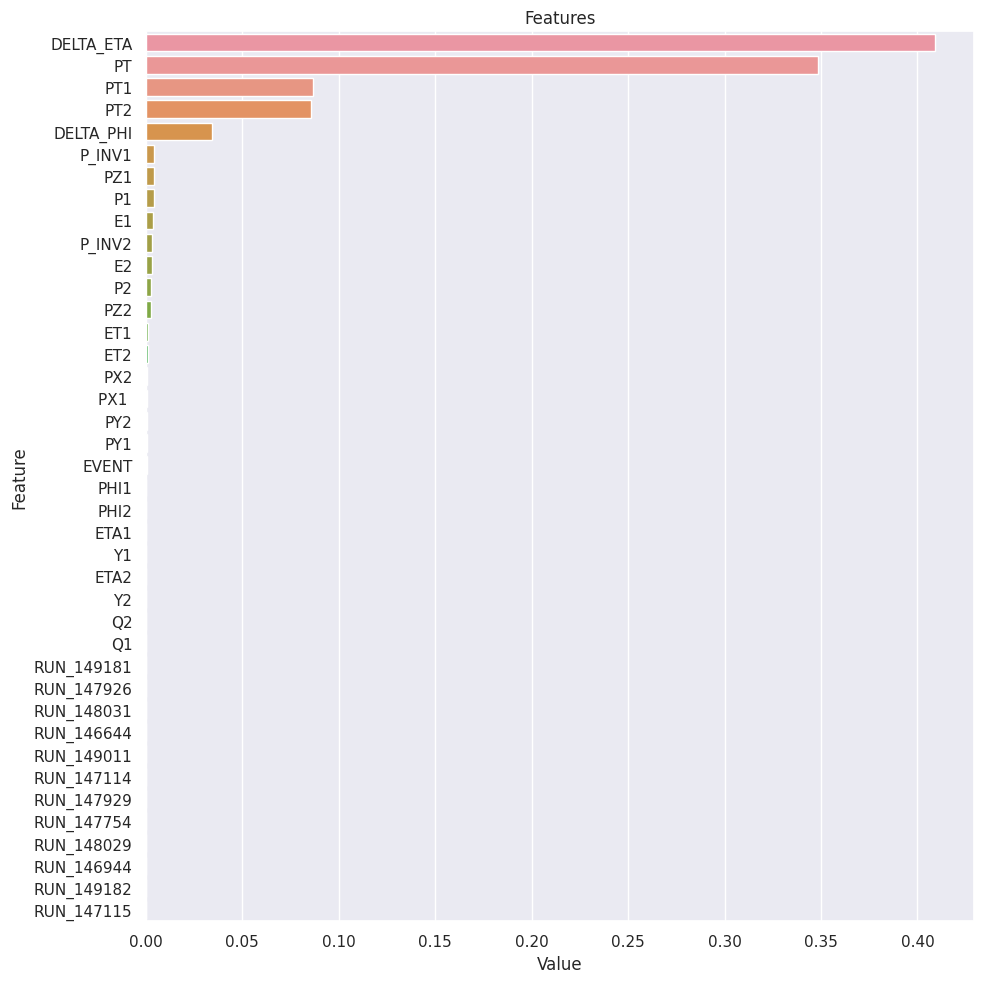

In [34]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)

In [35]:
models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor()),
          ("LightGBM", LGBMRegressor(verbose=-1)),
          ("CatBoost", CatBoostRegressor(verbose=False))]

In [36]:
"""import sklearn
sklearn.metrics.get_scorer_names()"""

'import sklearn\nsklearn.metrics.get_scorer_names()'

In [37]:
errlist=[]
for name, model in models:
    err = -np.mean(cross_val_score(model, X_train, y_train, cv=3, scoring="neg_root_mean_squared_error"))
    errlist.append([name,err])
    print(f"ERROR: {round(err, 4)} ({name}) ")

ERROR: 19.1966 (LR) 
ERROR: 8.7328 (KNN) 
ERROR: 4.0388 (CART) 
ERROR: 4.8499 (GBM) 
ERROR: 2.1613 (XGBoost) 
ERROR: 2.2856 (LightGBM) 
ERROR: 1.2601 (CatBoost) 


In [38]:
"""cat_model = CatBoostRegressor(verbose=False, random_state=42,task_type="GPU", devices='0')
cat_params = {"learning_rate": [0.01, 0.02, 0.03,0.04, 0.06, 0.08, 0.1],
               "n_estimators": [300, 400, 600, 1200, 1500]}
cat_gs_best = GridSearchCV(cat_model,
                            cat_params,
                            cv=3,
                            verbose=False).fit(X_train, y_train)
cat_gs_best.best_params_
final_cat = cat_model.set_params(**cat_gs_best.best_params_).fit(X_train, y_train)
final_cat.score(X_test,y_test)
y_pred_cat = final_cat.predict(X_test)
mse = mean_squared_error(y_test, y_pred_cat)
print("Mean Squared Error:", mse)
"""

'cat_model = CatBoostRegressor(verbose=False, random_state=42,task_type="GPU", devices=\'0\')\ncat_params = {"learning_rate": [0.01, 0.02, 0.03,0.04, 0.06, 0.08, 0.1],\n               "n_estimators": [300, 400, 600, 1200, 1500]}\ncat_gs_best = GridSearchCV(cat_model,\n                            cat_params,\n                            cv=3,\n                            verbose=False).fit(X_train, y_train)\ncat_gs_best.best_params_\nfinal_cat = cat_model.set_params(**cat_gs_best.best_params_).fit(X_train, y_train)\nfinal_cat.score(X_test,y_test)\ny_pred_cat = final_cat.predict(X_test)\nmse = mean_squared_error(y_test, y_pred_cat)\nprint("Mean Squared Error:", mse)\n'

In [39]:
best = {"learning_rate" : 0.08, "n_estimators" : 1500 }

In [40]:
cat = CatBoostRegressor(**best, verbose = False)
cat.fit(X_train, y_train)
cat.score(X_test,y_test)

0.997966118619698

In [41]:
y_pred_cat = cat.predict(X_test)
mse = mean_squared_error(y_test, y_pred_cat)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.3041573997263352


In [42]:
y_pred_cat

array([91.59256245, 38.66556691, 51.68360048, ...,  1.87661099,
       11.55727153, 92.53241111])

In [43]:
y_test_df = pd.DataFrame({'Actual_Value': y_test.values})
y_pred_df = pd.DataFrame({'Predicted_Value': y_pred_cat})
result_df = pd.concat([y_test_df, y_pred_df], axis=1)
result_df

Actual_Value  Predicted_Value
0            91.732           91.593
1            39.222           38.666
2            51.189           51.684
3             6.607            6.554
4            82.960           84.006
...             ...              ...
19978        39.218           39.032
19979        19.949           19.983
19980         2.881            1.877
19981        11.131           11.557
19982        92.044           92.532

[19983 rows x 2 columns]

In [44]:
import plotly.express as px

fig = px.scatter(result_df, x='Actual_Value', y='Predicted_Value', title='Actual vs Predicted Values',
                 labels={'Actual_Value': 'Actual Value', 'Predicted_Value': 'Predicted Value'},
                 trendline='ols')
fig.add_shape(type='line', x0=result_df['Actual_Value'].min(), y0=result_df['Actual_Value'].min(),
              x1=result_df['Actual_Value'].max(), y1=result_df['Actual_Value'].max(),
              line=dict(color='red', dash='dash'))
fig.show()

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #Q07220; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center; color:#199"> ANN </div>

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [46]:
X_train.shape

(79929, 40)

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(X_train.shape[1],), activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation="linear")
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='./model.keras',
    save_weights_only=False,
    monitor='val_mse',
    mode='auto',
    save_best_only=True)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 290,913 (1.11 MB)

 Trainable params: 290,913 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
  74/1999 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 891.6628 - root_mean_squared_error: 29.5709 

I0000 00:00:1713640262.227700     112 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713640262.246286     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1999/1999 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 242.7892 - root_mean_squared_error: 15.0648

W0000 00:00:1713640274.331170     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1999/1999 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 242.7395 - root_mean_squared_error: 15.0632 - val_loss: 40.5399 - val_root_mean_squared_error: 6.3584
Epoch 2/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 91.8147 - root_mean_squared_error: 9.5751 - val_loss: 17.2090 - val_root_mean_squared_error: 4.1327
Epoch 3/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 80.9624 - root_mean_squared_error: 8.9877 - val_loss: 16.5013 - val_root_mean_squared_error: 4.0438
Epoch 4/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 72.6514 - root_mean_squared_error: 8.5123 - val_loss: 21.0819 - val_root_mean_squared_error: 4.5731
Epoch 5/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 62.8558 - root_mean_squared_error: 7.9165 - val_loss: 14.9997 - val_root_mean_squared_error: 3.8486
Epoch 6/100
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 57.4731 - root_mean_squared_error: 7.5677 - val_loss: 12.4045 - val_root_mean_squared_error: 3.4926
Epoch 7/100
1999/1999 ━━━━━━━━━

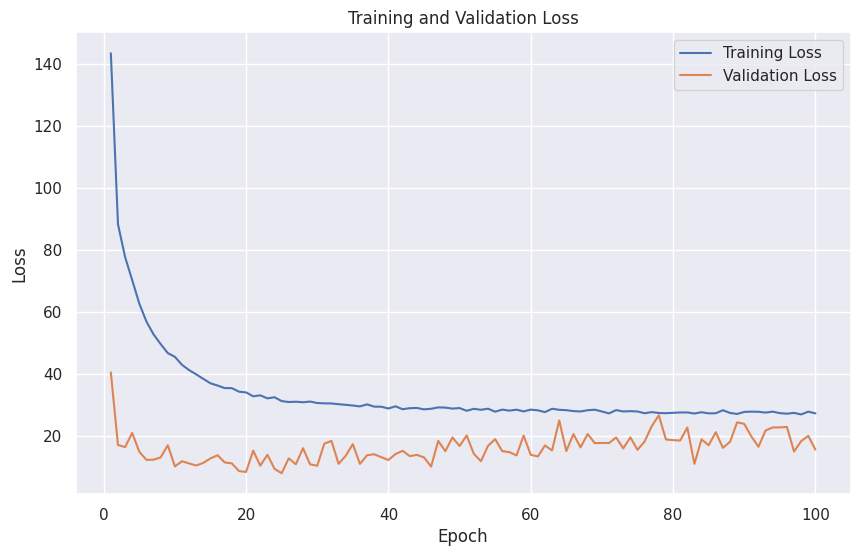

In [49]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1) 

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [50]:
y_pred = model.predict(X_test)
y_pred[:10]

123/625 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

W0000 00:00:1713640774.131453     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[89.53891 ],
       [44.658035],
       [56.740303],
       [11.95196 ],
       [89.5664  ],
       [ 9.666639],
       [16.226788],
       [17.480259],
       [24.836681],
       [54.6702  ]], dtype=float32)

In [51]:
y_test_df = pd.DataFrame({'Actual_Value': y_test.values})
y_pred_df = pd.DataFrame({'Predicted_Value': y_pred.flatten()})
result_df = pd.concat([y_test_df, y_pred_df], axis=1)
result_df

Actual_Value  Predicted_Value
0            91.732           89.539
1            39.222           44.658
2            51.189           56.740
3             6.607           11.952
4            82.960           89.566
...             ...              ...
19978        39.218           42.057
19979        19.949           23.123
19980         2.881            8.856
19981        11.131           13.579
19982        92.044           90.180

[19983 rows x 2 columns]